In [1]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="0.8.5"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [2]:
#methods(add_genotypes)

In [3]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [4]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_survival_all_WI_FI_RR2.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [5]:
phenotypes= dropmissing(phenotypes, :FinPenBatch)
phenotypes

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,false,1B_D02,1B_D02


In [6]:
ADWD_model_equations = "ADWD = intercept + Batch  + EntryAge + FinPenBatch + SowID"
ADWD_R=5
ADWD_model=build_model(ADWD_model_equations,ADWD_R);

In [7]:
set_covariate(ADWD_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [8]:
ADWD_G1=0.304603E-01
set_random(ADWD_model,"FinPenBatch",ADWD_G1)

In [9]:
ADWD_G2=0.218792
set_random(ADWD_model,"SowID",ADWD_G2)

In [10]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 18.654336 seconds (19.27 k allocations: 10.392 GiB, 0.13% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [11]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [12]:
ADWD_G3=3
@time add_genotypes(ADWD_model,M,ADWD_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The marker IDs are set to 1,2,...,#markers
#markers: 435172; #individuals: 3205
 15.256801 seconds (7.96 M allocations: 15.982 GiB, 1.40% gc time)


4.0f0

In [13]:
@time ADWD_outB=runMCMC(ADWD_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.999, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0005 in the row 4 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0010 in the row 7 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0011 in the row 8 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0012 in the row 9 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0013 in the row 10 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0014 in the row 11 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0015 in the row 12 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 001

running MCMC ...100%|███████████████████████████████████| Time: 4:14:03




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


15289.787572 seconds (90.24 G allocations: 2.017 TiB, 2.10% gc time)


Dict{Any,Any} with 8 entries:
  "ScaleEffectVargeno"           => 1×3 DataFrame…
  "EBV_ADWD"                     => 3205×3 DataFrame…
  "heritability"                 => 1×3 DataFrame…
  "location parameters"          => 908×5 DataFrame…
  "residual variance"            => 1×3 DataFrame…
  "marker effects geno"          => 435172×5 DataFrame…
  "genetic_variance"             => 1×3 DataFrame…
  "marker effects variance geno" => 1×3 DataFrame…

In [14]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,ADWD
,Int64,Float64
1,1,0.342346
2,2,0.341593
3,3,0.346882
4,4,0.295151
5,5,0.335163
6,6,0.3077
7,7,0.355681
8,8,0.314376
9,9,0.405488


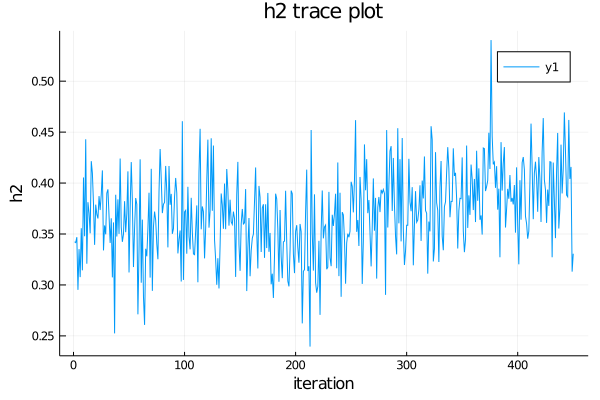

In [15]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [16]:
@time ADWD_outB,ADWD_winVarProps = GWAS("MCMC_samples_marker_effects_geno_ADWD.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    ADWD_model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:22:09


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 0.166839       │ 0.0918474   │ 4.84     │ 0.98       │ 0.98      │
│ 2    │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 0.0651696      │ 0.070398    │ 1.92     │ 0.648889   │ 0.814444  │
│ 3    │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 0.0520058      │ 0.0634121   │ 1.5      │ 0.593333   │ 0.740741  │
│ 4    │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 0.0314534      │ 0.0424945   │ 0.91     │ 0.582222   │ 0.701111  │
│ 5    │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 0.040362       │ 0.0624092   │ 1.15     │ 0.528889   │ 0.666667  │
│ 6    │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 0.0259459      │ 0.041431    │ 0.76     │ 0.497778   │ 0.638519  │
│ 7    │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 0.0232148      │ 0.0459503   │ 0.66     │ 0.408889   │ 0.605714  │
│ 8    │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 0.0232813      │ 0.0417651   │ 0.69     │ 0.404444   │ 0.580556  │
│ 9    │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 0.0163814      │ 0.0319229   │ 0.47     │ 0.382222   │ 0.558519  │
│ 10   │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 0.0121928      │ 0.0245368   │ 0.36     │ 0.36       │ 0.538667  │
│ 11   │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 0.0137304      │ 0.028932    │ 0.4      │ 0.342222   │ 0.520808  │
│ 12   │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 0.0123068      │ 0.0267221   │ 0.36     │ 0.34       │ 0.505741  │
│ 13   │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 0.0257733      │ 0.0545575   │ 0.75     │ 0.337778   │ 0.492821  │
│ 14   │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 0.0199492      │ 0.0445593   │ 0.59     │ 0.328889   │ 0.481111  │
│ 15   │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 0.0145554      │ 0.0315295   │ 0.41     │ 0.324444   │ 0.470667  │
│ 16   │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 0.0211686      │ 0.0485603   │ 0.6      │ 0.315556   │ 0.460972  │
│ 17   │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 0.0154932      │ 0.0342211   │ 0.44     │ 0.313333   │ 0.452288  │
│ 18   │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 0.0126108      │ 0.0289243   │ 0.36     │ 0.304444   │ 0.444074  │
│ 19   │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 0.00821604     │ 0.0190335   │ 0.23     │ 0.3        │ 0.436491  │
│ 20   │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 0.0108907      │ 0.0257114   │ 0.31     │ 0.297778   │ 0.429556  │
│ 21   │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 0.0123194      │ 0.0327399   │ 0.34     │ 0.277778   │ 0.422328  │
│ 22   │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 0.0102354      │ 0.0264602   │ 0.3      │ 0.266667   │ 0.415253  │
│ 23   │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 0.00954498     │ 0.0223016   │ 0.27     │ 0.266667   │ 0.408792  │
│ 24   │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 0.00925726     │ 0.0261237   │ 0.26     │ 0.264444   │ 0.402778  │
│ 25   │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 0.0147505      │ 0.0348732   │ 0.42     │ 0.26       │ 0.397067  │
│ 26   │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 0.00956334     │ 0.0251297   │ 0.28     │ 0.257778   │ 0.391709  │
│ 27   │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 0.00746563     │ 0.0179086   │ 0.22     │ 0.257778   │ 0.386749  │
│ 28   │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 0.00821786     │ 0.0214468   │ 0.23     │ 0.255556   │ 0.382063  │
│ 29   │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 0.00735554     │ 0.0187207   │ 0.21     │ 0.246667   │ 0.377395  │
│ 30   │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 0.00669561     │ 0.0177001   │ 0.19     │ 0.242222   │ 0.372889  │
│ 31   │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 0.00659512     │ 0.0177737   │ 0.19     │ 0.24       │ 0.368602  │
│ 32   │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 0.0106441      │ 0.028653    │ 0.32     │ 0.24       │ 0.364583  │
│ 33   │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 0.00650338     │ 0.016357    │ 0.19     │ 0.24       │ 0.360808  │
│ 34   │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 0.0118153      │ 0.0297988   │ 0.34     │ 0.235556   │ 0.357124  │
│ 35   │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 0.00917415     │ 0.0243009   │ 0.27     │ 0.235556   │ 0.353651  │
│ 36   │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 0.0063204      │ 0.0162424   │ 0.18     │ 0.231111   │ 0.350247  │
│ 37   │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 0.00650574     │ 0.0178893   │ 0.19     │ 0.228889   │ 0.346967  │
│ 38   │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 0.00638251     │ 0.0183309   │ 0.19     │ 0.224444   │ 0.343743  │
│ 39   │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 0.00581183     │ 0.0158229   │ 0.17     │ 0.224444   │ 0.340684  │
│ 40   │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 0.00753351     │ 0.0218914   │ 0.22     │ 0.22       │ 0.337667  │
│ 41   │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 0.00563726     │ 0.0149598   │ 0.16     │ 0.217778   │ 0.334743  │
│ 42   │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 0.00651549     │ 0.0186863   │ 0.19     │ 0.217778   │ 0.331958  │
│ 43   │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 0.00472894     │ 0.011997    │ 0.14     │ 0.215556   │ 0.329251  │
│ 44   │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 0.00776006     │ 0.0235685   │ 0.23     │ 0.215556   │ 0.326667  │
│ 45   │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 0.00498223     │ 0.0136859   │ 0.15     │ 0.206667   │ 0.324     │
│ 46   │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 0.00661395     │ 0.0194725   │ 0.19     │ 0.206667   │ 0.321449  │
│ 47   │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 0.00682509     │ 0.0198945   │ 0.19     │ 0.206667   │ 0.319007  │
│ 48   │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 0.00824614     │ 0.0242115   │ 0.23     │ 0.206667   │ 0.316667  │
│ 49   │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 0.0052036      │ 0.0138489   │ 0.15     │ 0.206667   │ 0.314422  │
│ 50   │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 0.00442134     │ 0.0121977   │ 0.13     │ 0.204444   │ 0.312222  │
│ 51   │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 0.00701011     │ 0.0213789   │ 0.2      │ 0.204444   │ 0.310109  │
│ 52   │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 0.00815554     │ 0.0230916   │ 0.24     │ 0.204444   │ 0.308077  │
│ 53   │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 0.00552094     │ 0.0160446   │ 0.17     │ 0.2        │ 0.306038  │
│ 54   │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 0.00619455     │ 0.0208552   │ 0.18     │ 0.2        │ 0.304074  │
│ 55   │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 0.00466795     │ 0.0130955   │ 0.14     │ 0.2        │ 0.302182  │
│ 56   │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 0.00521135     │ 0.0174025   │ 0.15     │ 0.195556   │ 0.300278  │
│ 57   │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 0.00456852     │ 0.0137977   │ 0.13     │ 0.193333   │ 0.298402  │
│ 58   │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 0.00730196     │ 0.0222287   │ 0.21     │ 0.191111   │ 0.296552  │
│ 59   │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 0.00432431     │ 0.0120601   │ 0.13     │ 0.191111   │ 0.294765  │
│ 60   │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 0.00447292     │ 0.012427    │ 0.13     │ 0.191111   │ 0.293037  │
│ 61   │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 0.00620568     │ 0.0203932   │ 0.18     │ 0.191111   │ 0.291366  │
│ 62   │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 0.00498649     │ 0.0130873   │ 0.15     │ 0.188889   │ 0.289713  │
│ 63   │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 0.00371264     │ 0.0106642   │ 0.11     │ 0.186667   │ 0.288078  │
│ 64   │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 0.0042736      │ 0.0119827   │ 0.12     │ 0.184444   │ 0.286458  │
│ 65   │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 0.0109405      │ 0.0317959   │ 0.32     │ 0.184444   │ 0.284889  │
│ 66   │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 0.00713739     │ 0.0209524   │ 0.2      │ 0.184444   │ 0.283367  │
│ 67   │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 0.0034147      │ 0.00997323  │ 0.1      │ 0.184444   │ 0.281891  │
│ 68   │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 0.00655843     │ 0.0229653   │ 0.19     │ 0.184444   │ 0.280458  │
│ 69   │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 0.00526469     │ 0.0180293   │ 0.15     │ 0.182222   │ 0.279034  │
│ 70   │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 0.00332082     │ 0.0116759   │ 0.1      │ 0.18       │ 0.277619  │
│ 71   │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 0.00573526     │ 0.0185378   │ 0.16     │ 0.18       │ 0.276244  │
│ 72   │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 0.00488696     │ 0.0155863   │ 0.14     │ 0.18       │ 0.274907  │
│ 73   │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 0.00402403     │ 0.0117937   │ 0.12     │ 0.18       │ 0.273607  │
│ 74   │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 0.00385903     │ 0.0125543   │ 0.11     │ 0.175556   │ 0.272282  │
│ 75   │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 0.00397379     │ 0.0118419   │ 0.11     │ 0.175556   │ 0.270993  │
│ 76   │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 0.00710185     │ 0.025067    │ 0.2      │ 0.175556   │ 0.269737  │
│ 77   │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 0.00646287     │ 0.0196203   │ 0.18     │ 0.175556   │ 0.268514  │
│ 78   │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 0.00568123     │ 0.0177665   │ 0.17     │ 0.173333   │ 0.267293  │
│ 79   │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 0.00348951     │ 0.0121219   │ 0.1      │ 0.171111   │ 0.266076  │
│ 80   │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 0.00336045     │ 0.0105331   │ 0.1      │ 0.171111   │ 0.264889  │
│ 81   │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 0.00532993     │ 0.0193058   │ 0.15     │ 0.171111   │ 0.263731  │
│ 82   │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 0.00502571     │ 0.0163145   │ 0.15     │ 0.171111   │ 0.262602  │
│ 83   │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 0.00417263     │ 0.0127253   │ 0.12     │ 0.171111   │ 0.261499  │
│ 84   │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 0.00403296     │ 0.012247    │ 0.12     │ 0.168889   │ 0.260397  │
│ 85   │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 0.00409971     │ 0.0144794   │ 0.12     │ 0.168889   │ 0.25932   │
│ 86   │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 0.00407317     │ 0.0132588   │ 0.12     │ 0.168889   │ 0.258269  │
│ 87   │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 0.00398708     │ 0.012083    │ 0.11     │ 0.168889   │ 0.257241  │
│ 88   │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 0.00450393     │ 0.0136174   │ 0.13     │ 0.168889   │ 0.256237  │
│ 89   │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 0.00592038     │ 0.0200303   │ 0.17     │ 0.168889   │ 0.255256  │
│ 90   │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 0.00540174     │ 0.0197267   │ 0.16     │ 0.166667   │ 0.254272  │
│ 91   │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 0.00391392     │ 0.0130336   │ 0.12     │ 0.166667   │ 0.253309  │
│ 92   │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 0.00491725     │ 0.0171635   │ 0.15     │ 0.166667   │ 0.252367  │
│ 93   │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 0.00362426     │ 0.0108442   │ 0.1      │ 0.166667   │ 0.251446  │
│ 94   │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 0.00472277     │ 0.0166862   │ 0.14     │ 0.166667   │ 0.250544  │
│ 95   │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 0.00382701     │ 0.013782    │ 0.11     │ 0.164444   │ 0.249637  │
│ 96   │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 0.00268416     │ 0.00842449  │ 0.08     │ 0.164444   │ 0.24875   │
│ 97   │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 0.0036862      │ 0.0113731   │ 0.11     │ 0.162222   │ 0.247858  │
│ 98   │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 0.00431354     │ 0.0162545   │ 0.13     │ 0.162222   │ 0.246984  │
│ 99   │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 0.00267485     │ 0.00782631  │ 0.08     │ 0.16       │ 0.246105  │
│ 100  │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 0.00367482     │ 0.0128712   │ 0.11     │ 0.16       │ 0.245244  │
│ 101  │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 0.00376952     │ 0.0128247   │ 0.11     │ 0.157778   │ 0.244378  │
│ 102  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 0.00333466     │ 0.0113078   │ 0.1      │ 0.157778   │ 0.243529  │
│ 103  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 0.00273953     │ 0.00780048  │ 0.08     │ 0.157778   │ 0.242697  │
│ 104  │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 0.00483577     │ 0.0154462   │ 0.14     │ 0.155556   │ 0.241859  │
│ 105  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 0.00356176     │ 0.0115297   │ 0.11     │ 0.155556   │ 0.241037  │
│ 106  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 0.00497329     │ 0.0172474   │ 0.14     │ 0.155556   │ 0.240231  │
│ 107  │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 0.00306593     │ 0.0107385   │ 0.09     │ 0.155556   │ 0.239439  │
│ 108  │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 0.00522443     │ 0.020373    │ 0.15     │ 0.155556   │ 0.238663  │
│ 109  │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 0.00437032     │ 0.0159493   │ 0.13     │ 0.153333   │ 0.23788   │
│ 110  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 0.00376211     │ 0.0145405   │ 0.11     │ 0.153333   │ 0.237111  │
│ 111  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 0.00319859     │ 0.0119031   │ 0.09     │ 0.151111   │ 0.236336  │
│ 112  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 0.00404733     │ 0.0135281   │ 0.11     │ 0.151111   │ 0.235575  │
│ 113  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 0.00248196     │ 0.00758833  │ 0.07     │ 0.151111   │ 0.234828  │
│ 114  │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 0.00432211     │ 0.0144513   │ 0.13     │ 0.151111   │ 0.234094  │
│ 115  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 0.00289214     │ 0.00961602  │ 0.08     │ 0.151111   │ 0.233372  │
│ 116  │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 0.00258238     │ 0.00890263  │ 0.08     │ 0.148889   │ 0.232644  │
│ 117  │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 0.00269544     │ 0.00961993  │ 0.08     │ 0.148889   │ 0.231928  │
│ 118  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 0.00216478     │ 0.00691668  │ 0.06     │ 0.148889   │ 0.231224  │
│ 119  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 0.00334391     │ 0.013129    │ 0.1      │ 0.146667   │ 0.230514  │
│ 120  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 0.00250795     │ 0.00825611  │ 0.07     │ 0.146667   │ 0.229815  │
│ 121  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 0.00430109     │ 0.0162726   │ 0.13     │ 0.146667   │ 0.229128  │
│ 122  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 0.00518518     │ 0.0184214   │ 0.15     │ 0.146667   │ 0.228452  │
│ 123  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 0.00314802     │ 0.0108042   │ 0.09     │ 0.146667   │ 0.227787  │
│ 124  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 0.00437826     │ 0.0162477   │ 0.13     │ 0.144444   │ 0.227115  │
│ 125  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 0.00308583     │ 0.0130342   │ 0.09     │ 0.144444   │ 0.226453  │
│ 126  │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 0.00314133     │ 0.0114703   │ 0.09     │ 0.144444   │ 0.225802  │
│ 127  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 0.00264902     │ 0.00892194  │ 0.08     │ 0.144444   │ 0.225162  │
│ 128  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 0.00347181     │ 0.0121364   │ 0.1      │ 0.144444   │ 0.224531  │
│ 129  │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 0.00295276     │ 0.0101051   │ 0.09     │ 0.144444   │ 0.22391   │
│ 130  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 0.00288289     │ 0.00974542  │ 0.08     │ 0.144444   │ 0.223299  │
│ 131  │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 0.00315027     │ 0.0126223   │ 0.1      │ 0.144444   │ 0.222697  │
│ 132  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 0.00763113     │ 0.030803    │ 0.21     │ 0.142222   │ 0.222088  │
│ 133  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 0.00336229     │ 0.0131187   │ 0.1      │ 0.142222   │ 0.221487  │
│ 134  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 0.00348336     │ 0.0128531   │ 0.1      │ 0.142222   │ 0.220896  │
│ 135  │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 0.00431614     │ 0.0149625   │ 0.13     │ 0.142222   │ 0.220313  │
│ 136  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 0.00273853     │ 0.00909057  │ 0.08     │ 0.142222   │ 0.219739  │
│ 137  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 0.0032401      │ 0.012161    │ 0.09     │ 0.142222   │ 0.219173  │
│ 138  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 0.00287479     │ 0.0100727   │ 0.08     │ 0.14       │ 0.218599  │
│ 139  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 0.00235121     │ 0.00780634  │ 0.07     │ 0.14       │ 0.218034  │
│ 140  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 0.0023549      │ 0.00704255  │ 0.07     │ 0.14       │ 0.217476  │
│ 141  │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 0.00335339     │ 0.0122876   │ 0.1      │ 0.14       │ 0.216927  │
│ 142  │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 0.00503811     │ 0.019198    │ 0.15     │ 0.14       │ 0.216385  │
│ 143  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 0.00320706     │ 0.0110886   │ 0.09     │ 0.14       │ 0.215851  │
│ 144  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 0.00324868     │ 0.0116721   │ 0.09     │ 0.14       │ 0.215324  │
│ 145  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 0.00328052     │ 0.0109726   │ 0.09     │ 0.14       │ 0.214805  │
│ 146  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 0.00363962     │ 0.0137919   │ 0.11     │ 0.14       │ 0.214292  │
│ 147  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 0.0033618      │ 0.0115702   │ 0.1      │ 0.137778   │ 0.213772  │
│ 148  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 0.00310637     │ 0.0100456   │ 0.09     │ 0.137778   │ 0.213258  │
│ 149  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 0.00373789     │ 0.0180393   │ 0.1      │ 0.137778   │ 0.212752  │
│ 150  │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 0.00368513     │ 0.0128411   │ 0.1      │ 0.137778   │ 0.212252  │
│ 151  │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 0.00454037     │ 0.0180623   │ 0.14     │ 0.137778   │ 0.211759  │
│ 152  │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 0.00324072     │ 0.0128123   │ 0.1      │ 0.137778   │ 0.211272  │
│ 153  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 0.00316482     │ 0.0119658   │ 0.09     │ 0.137778   │ 0.210792  │
│ 154  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 0.00393278     │ 0.0143522   │ 0.11     │ 0.135556   │ 0.210303  │
│ 155  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 0.00326189     │ 0.0120845   │ 0.09     │ 0.135556   │ 0.209821  │
│ 156  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 0.00289089     │ 0.00944113  │ 0.08     │ 0.135556   │ 0.209345  │
│ 157  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 0.00229305     │ 0.007682    │ 0.07     │ 0.135556   │ 0.208875  │
│ 158  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 0.00269814     │ 0.00996283  │ 0.08     │ 0.135556   │ 0.208411  │
│ 159  │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 0.0040303      │ 0.0161313   │ 0.12     │ 0.133333   │ 0.207939  │
│ 160  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 0.00306234     │ 0.0132939   │ 0.09     │ 0.133333   │ 0.207472  │
│ 161  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 0.00195634     │ 0.00643038  │ 0.06     │ 0.133333   │ 0.207012  │
│ 162  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 0.00262985     │ 0.00889579  │ 0.08     │ 0.133333   │ 0.206557  │
│ 163  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 0.00233679     │ 0.00894208  │ 0.07     │ 0.133333   │ 0.206108  │
│ 164  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 0.00240268     │ 0.0105739   │ 0.07     │ 0.133333   │ 0.205664  │
│ 165  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 0.00238683     │ 0.00863256  │ 0.07     │ 0.133333   │ 0.205226  │
│ 166  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 0.00193684     │ 0.00679968  │ 0.06     │ 0.131111   │ 0.204779  │
│ 167  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 0.00213255     │ 0.00786847  │ 0.06     │ 0.131111   │ 0.204338  │
│ 168  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 0.00218576     │ 0.00703182  │ 0.07     │ 0.131111   │ 0.203902  │
│ 169  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 0.00323255     │ 0.0124738   │ 0.1      │ 0.131111   │ 0.203471  │
│ 170  │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 0.0026823      │ 0.00934272  │ 0.08     │ 0.131111   │ 0.203046  │
│ 171  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 0.00281324     │ 0.010127    │ 0.08     │ 0.131111   │ 0.202625  │
│ 172  │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 0.0024114      │ 0.00784814  │ 0.07     │ 0.131111   │ 0.202209  │
│ 173  │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 0.00306978     │ 0.0118842   │ 0.09     │ 0.131111   │ 0.201798  │
│ 174  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 0.00706501     │ 0.026698    │ 0.2      │ 0.131111   │ 0.201392  │
│ 175  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 0.00293209     │ 0.0115245   │ 0.08     │ 0.131111   │ 0.20099   │
│ 176  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 0.0019368      │ 0.00700608  │ 0.05     │ 0.128889   │ 0.200581  │
│ 177  │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 0.00377426     │ 0.0148001   │ 0.11     │ 0.128889   │ 0.200176  │
│ 178  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 0.00235342     │ 0.00804421  │ 0.07     │ 0.128889   │ 0.199775  │
│ 179  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 0.00294482     │ 0.0119948   │ 0.08     │ 0.128889   │ 0.199379  │
│ 180  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 0.00235599     │ 0.00959496  │ 0.07     │ 0.128889   │ 0.198988  │
│ 181  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 0.00184934     │ 0.00605809  │ 0.05     │ 0.128889   │ 0.1986    │
│ 182  │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 0.00288357     │ 0.0102585   │ 0.09     │ 0.128889   │ 0.198217  │
│ 183  │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 0.00362416     │ 0.0124163   │ 0.1      │ 0.128889   │ 0.197838  │
│ 184  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 0.00261419     │ 0.00856403  │ 0.07     │ 0.126667   │ 0.197452  │
│ 185  │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 0.00390931     │ 0.015039    │ 0.11     │ 0.126667   │ 0.197069  │
│ 186  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 0.00269927     │ 0.0132032   │ 0.08     │ 0.124444   │ 0.196679  │
│ 187  │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 0.00154548     │ 0.0062055   │ 0.05     │ 0.124444   │ 0.196292  │
│ 188  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 0.00224185     │ 0.00785699  │ 0.07     │ 0.124444   │ 0.19591   │
│ 189  │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 0.00341693     │ 0.0142925   │ 0.09     │ 0.124444   │ 0.195532  │
│ 190  │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 0.00537032     │ 0.02118     │ 0.16     │ 0.124444   │ 0.195158  │
│ 191  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 0.00246238     │ 0.00879812  │ 0.08     │ 0.124444   │ 0.194788  │
│ 192  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 0.00194459     │ 0.00669704  │ 0.06     │ 0.122222   │ 0.19441   │
│ 193  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 0.00269552     │ 0.0107839   │ 0.08     │ 0.122222   │ 0.194036  │
│ 194  │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 0.00217776     │ 0.00745949  │ 0.06     │ 0.122222   │ 0.193666  │
│ 195  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 0.00219171     │ 0.00910651  │ 0.06     │ 0.122222   │ 0.193299  │
│ 196  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 0.00277546     │ 0.013611    │ 0.08     │ 0.122222   │ 0.192937  │
│ 197  │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 0.00238639     │ 0.00818818  │ 0.07     │ 0.122222   │ 0.192578  │
│ 198  │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 0.00161422     │ 0.005218    │ 0.05     │ 0.122222   │ 0.192222  │
│ 199  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 0.0043072      │ 0.0167184   │ 0.13     │ 0.122222   │ 0.19187   │
│ 200  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 0.00179455     │ 0.00715239  │ 0.05     │ 0.122222   │ 0.191522  │
│ 201  │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 0.00265129     │ 0.00986646  │ 0.08     │ 0.122222   │ 0.191177  │
│ 202  │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 0.00269082     │ 0.0109268   │ 0.08     │ 0.122222   │ 0.190836  │
│ 203  │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 0.00236925     │ 0.00800711  │ 0.07     │ 0.122222   │ 0.190498  │
│ 204  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 0.00269951     │ 0.00998582  │ 0.08     │ 0.122222   │ 0.190163  │
│ 205  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 0.00274407     │ 0.0092882   │ 0.08     │ 0.122222   │ 0.189832  │
│ 206  │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 0.00387027     │ 0.0142381   │ 0.11     │ 0.122222   │ 0.189504  │
│ 207  │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 0.00342343     │ 0.0130537   │ 0.1      │ 0.122222   │ 0.189179  │
│ 208  │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 0.00188255     │ 0.00656522  │ 0.06     │ 0.122222   │ 0.188857  │
│ 209  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 0.00252236     │ 0.0092949   │ 0.07     │ 0.122222   │ 0.188538  │
│ 210  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 0.00174555     │ 0.00602249  │ 0.05     │ 0.12       │ 0.188212  │
│ 211  │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 0.00252899     │ 0.00893006  │ 0.07     │ 0.12       │ 0.187888  │
│ 212  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 0.00234625     │ 0.00788907  │ 0.07     │ 0.12       │ 0.187568  │
│ 213  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 0.00313436     │ 0.0152132   │ 0.09     │ 0.12       │ 0.187251  │
│ 214  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 0.00227424     │ 0.00905087  │ 0.07     │ 0.12       │ 0.186937  │
│ 215  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 0.00273239     │ 0.00974351  │ 0.08     │ 0.12       │ 0.186625  │
│ 216  │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 0.00283427     │ 0.0108685   │ 0.09     │ 0.12       │ 0.186317  │
│ 217  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 0.00216294     │ 0.00925375  │ 0.06     │ 0.12       │ 0.186011  │
│ 218  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 0.00192319     │ 0.00630506  │ 0.05     │ 0.12       │ 0.185708  │
│ 219  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 0.00198502     │ 0.00774678  │ 0.06     │ 0.12       │ 0.185408  │
│ 220  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 0.00164853     │ 0.00567851  │ 0.05     │ 0.12       │ 0.185111  │
│ 221  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 0.00141124     │ 0.00403706  │ 0.04     │ 0.12       │ 0.184816  │
│ 222  │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 0.00524296     │ 0.0201832   │ 0.14     │ 0.12       │ 0.184525  │
│ 223  │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 0.00352531     │ 0.0139073   │ 0.1      │ 0.12       │ 0.184235  │
│ 224  │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 0.00199794     │ 0.00696327  │ 0.06     │ 0.12       │ 0.183948  │
│ 225  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 0.00210479     │ 0.00788724  │ 0.06     │ 0.12       │ 0.183664  │
│ 226  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 0.00229938     │ 0.0119895   │ 0.06     │ 0.117778   │ 0.183373  │
│ 227  │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 0.00149585     │ 0.00443381  │ 0.04     │ 0.117778   │ 0.183084  │
│ 228  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 0.00260552     │ 0.0109729   │ 0.08     │ 0.117778   │ 0.182797  │
│ 229  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 0.00218203     │ 0.00816808  │ 0.06     │ 0.117778   │ 0.182513  │
│ 230  │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 0.00402578     │ 0.0166614   │ 0.11     │ 0.117778   │ 0.182232  │
│ 231  │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 0.00282877     │ 0.0119173   │ 0.08     │ 0.117778   │ 0.181953  │
│ 232  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 0.00164013     │ 0.00546661  │ 0.05     │ 0.115556   │ 0.181667  │
│ 233  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 0.00237135     │ 0.00830508  │ 0.07     │ 0.115556   │ 0.181383  │
│ 234  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 0.00240627     │ 0.00868357  │ 0.07     │ 0.115556   │ 0.181102  │
│ 235  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 0.00237533     │ 0.00985412  │ 0.07     │ 0.115556   │ 0.180823  │
│ 236  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 0.00168217     │ 0.00627341  │ 0.05     │ 0.115556   │ 0.180546  │
│ 237  │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 0.00360343     │ 0.0142824   │ 0.1      │ 0.115556   │ 0.180272  │
│ 238  │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 0.00213469     │ 0.00890474  │ 0.06     │ 0.115556   │ 0.18      │
│ 239  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 0.00205102     │ 0.00758178  │ 0.06     │ 0.115556   │ 0.17973   │
│ 240  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 0.00228095     │ 0.00987582  │ 0.07     │ 0.115556   │ 0.179463  │
│ 241  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 0.00176573     │ 0.00685622  │ 0.05     │ 0.115556   │ 0.179198  │
│ 242  │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 0.00255941     │ 0.00982191  │ 0.07     │ 0.115556   │ 0.178935  │
│ 243  │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 0.00306693     │ 0.012978    │ 0.09     │ 0.115556   │ 0.178674  │
│ 244  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 0.00149462     │ 0.00504283  │ 0.04     │ 0.115556   │ 0.178415  │
│ 245  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 0.00210151     │ 0.00725067  │ 0.06     │ 0.113333   │ 0.17815   │
│ 246  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 0.00113784     │ 0.00337337  │ 0.03     │ 0.113333   │ 0.177886  │
│ 247  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 0.00202291     │ 0.00787498  │ 0.06     │ 0.113333   │ 0.177625  │
│ 248  │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 0.00237149     │ 0.00817459  │ 0.07     │ 0.113333   │ 0.177366  │
│ 249  │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 0.00280783     │ 0.0104499   │ 0.08     │ 0.113333   │ 0.177108  │
│ 250  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 0.00171093     │ 0.00623464  │ 0.05     │ 0.113333   │ 0.176853  │
│ 251  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 0.00194449     │ 0.00715707  │ 0.06     │ 0.113333   │ 0.1766    │
│ 252  │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 0.00229997     │ 0.00951804  │ 0.07     │ 0.113333   │ 0.176349  │
│ 253  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 0.00235699     │ 0.0106345   │ 0.07     │ 0.113333   │ 0.1761    │
│ 254  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 0.00206578     │ 0.00771351  │ 0.06     │ 0.113333   │ 0.175853  │
│ 255  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 0.00196302     │ 0.00702227  │ 0.06     │ 0.113333   │ 0.175608  │
│ 256  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 0.00224292     │ 0.00756011  │ 0.07     │ 0.113333   │ 0.175365  │
│ 257  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 0.0012342      │ 0.00361518  │ 0.04     │ 0.113333   │ 0.175123  │
│ 258  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 0.00171638     │ 0.00553856  │ 0.05     │ 0.113333   │ 0.174884  │
│ 259  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 0.00231676     │ 0.0120853   │ 0.07     │ 0.113333   │ 0.174646  │
│ 260  │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 0.00434141     │ 0.0169297   │ 0.12     │ 0.113333   │ 0.17441   │
│ 261  │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 0.00209681     │ 0.00837408  │ 0.06     │ 0.113333   │ 0.174176  │
│ 262  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 0.00196633     │ 0.00711655  │ 0.06     │ 0.113333   │ 0.173944  │
│ 263  │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 0.0027435      │ 0.0104655   │ 0.08     │ 0.113333   │ 0.173714  │
│ 264  │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 0.00281736     │ 0.0129912   │ 0.08     │ 0.113333   │ 0.173485  │
│ 265  │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 0.00186636     │ 0.00662057  │ 0.05     │ 0.113333   │ 0.173258  │
│ 266  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 0.00290178     │ 0.0105589   │ 0.08     │ 0.113333   │ 0.173033  │
│ 267  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 0.00209779     │ 0.00784651  │ 0.06     │ 0.111111   │ 0.172801  │
│ 268  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 0.00191921     │ 0.00848043  │ 0.05     │ 0.111111   │ 0.17257   │
│ 269  │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 0.0019787      │ 0.00855382  │ 0.06     │ 0.111111   │ 0.172342  │
│ 270  │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 0.00337433     │ 0.0138798   │ 0.1      │ 0.111111   │ 0.172115  │
│ 271  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 0.00202016     │ 0.00792005  │ 0.06     │ 0.111111   │ 0.17189   │
│ 272  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 0.00175054     │ 0.00660546  │ 0.05     │ 0.111111   │ 0.171667  │
│ 273  │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 0.00253331     │ 0.00965461  │ 0.07     │ 0.111111   │ 0.171445  │
│ 274  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 0.0021321      │ 0.0072377   │ 0.06     │ 0.111111   │ 0.171225  │
│ 275  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 0.0020875      │ 0.00805013  │ 0.06     │ 0.108889   │ 0.170998  │
│ 276  │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 0.00402603     │ 0.016841    │ 0.12     │ 0.108889   │ 0.170773  │
│ 277  │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 0.00190839     │ 0.00670041  │ 0.05     │ 0.108889   │ 0.17055   │
│ 278  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 0.00247415     │ 0.0101702   │ 0.07     │ 0.108889   │ 0.170328  │
│ 279  │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 0.00295768     │ 0.0119814   │ 0.09     │ 0.108889   │ 0.170108  │
│ 280  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 0.00144758     │ 0.00510221  │ 0.04     │ 0.108889   │ 0.169889  │
│ 281  │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 0.00204162     │ 0.00875586  │ 0.06     │ 0.108889   │ 0.169672  │
│ 282  │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 0.00203841     │ 0.00863469  │ 0.06     │ 0.108889   │ 0.169456  │
│ 283  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 0.0014585      │ 0.00604551  │ 0.04     │ 0.108889   │ 0.169242  │
│ 284  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 0.00158429     │ 0.0054245   │ 0.05     │ 0.108889   │ 0.16903   │
│ 285  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 0.00111692     │ 0.0036033   │ 0.03     │ 0.108889   │ 0.168819  │
│ 286  │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 0.00181929     │ 0.00706987  │ 0.05     │ 0.108889   │ 0.168609  │
│ 287  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 0.0017053      │ 0.00599064  │ 0.05     │ 0.108889   │ 0.168401  │
│ 288  │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 0.00213501     │ 0.00848318  │ 0.06     │ 0.108889   │ 0.168194  │
│ 289  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 0.00154107     │ 0.00594181  │ 0.04     │ 0.108889   │ 0.167989  │
│ 290  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 0.00155921     │ 0.00602733  │ 0.05     │ 0.106667   │ 0.167778  │
│ 291  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 0.00210766     │ 0.00943392  │ 0.06     │ 0.106667   │ 0.167568  │
│ 292  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 0.00128639     │ 0.00419915  │ 0.04     │ 0.106667   │ 0.167359  │
│ 293  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 0.00174552     │ 0.00647386  │ 0.05     │ 0.106667   │ 0.167152  │
│ 294  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 0.00180783     │ 0.00675335  │ 0.05     │ 0.106667   │ 0.166946  │
│ 295  │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 0.00183043     │ 0.00830092  │ 0.05     │ 0.106667   │ 0.166742  │
│ 296  │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 0.00350977     │ 0.0147708   │ 0.1      │ 0.106667   │ 0.166539  │
│ 297  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 0.00186756     │ 0.0070275   │ 0.05     │ 0.106667   │ 0.166337  │
│ 298  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 0.00181875     │ 0.00630049  │ 0.05     │ 0.106667   │ 0.166137  │
│ 299  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 0.00189342     │ 0.00818546  │ 0.06     │ 0.106667   │ 0.165938  │
│ 300  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 0.00187785     │ 0.00799694  │ 0.06     │ 0.106667   │ 0.165741  │
│ 301  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 0.00172917     │ 0.00609855  │ 0.05     │ 0.106667   │ 0.165544  │
│ 302  │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 0.00348889     │ 0.0144526   │ 0.1      │ 0.106667   │ 0.16535   │
│ 303  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 0.00172411     │ 0.0061749   │ 0.05     │ 0.106667   │ 0.165156  │
│ 304  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 0.00136046     │ 0.00515913  │ 0.04     │ 0.106667   │ 0.164963  │
│ 305  │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 0.00200454     │ 0.00814191  │ 0.06     │ 0.106667   │ 0.164772  │
│ 306  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 0.00149741     │ 0.00611896  │ 0.04     │ 0.106667   │ 0.164582  │
│ 307  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 0.00193174     │ 0.00811653  │ 0.06     │ 0.106667   │ 0.164394  │
│ 308  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 0.00156573     │ 0.00596117  │ 0.04     │ 0.106667   │ 0.164206  │
│ 309  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 0.00181645     │ 0.00667053  │ 0.05     │ 0.106667   │ 0.16402   │
│ 310  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 0.00180364     │ 0.00679099  │ 0.05     │ 0.106667   │ 0.163835  │
│ 311  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 0.0013568      │ 0.00454355  │ 0.04     │ 0.104444   │ 0.163644  │
│ 312  │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 0.0038988      │ 0.0165257   │ 0.12     │ 0.104444   │ 0.163454  │
│ 313  │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 0.00547518     │ 0.0219431   │ 0.15     │ 0.104444   │ 0.163266  │
│ 314  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 0.00178255     │ 0.00704428  │ 0.05     │ 0.104444   │ 0.163079  │
│ 315  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 0.00138647     │ 0.00485133  │ 0.04     │ 0.104444   │ 0.162892  │
│ 316  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 0.00124458     │ 0.00409122  │ 0.04     │ 0.104444   │ 0.162707  │
│ 317  │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 0.00169728     │ 0.00699614  │ 0.05     │ 0.104444   │ 0.162524  │
│ 318  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 0.00120744     │ 0.00421001  │ 0.04     │ 0.104444   │ 0.162341  │
│ 319  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 0.00150214     │ 0.00543072  │ 0.04     │ 0.104444   │ 0.16216   │
│ 320  │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 0.00251893     │ 0.00959725  │ 0.07     │ 0.104444   │ 0.161979  │
│ 321  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 0.00154883     │ 0.00566034  │ 0.05     │ 0.104444   │ 0.1618    │
│ 322  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 0.0015531      │ 0.00579226  │ 0.04     │ 0.104444   │ 0.161622  │
│ 323  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 0.00138874     │ 0.00474801  │ 0.04     │ 0.104444   │ 0.161445  │
│ 324  │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 0.00199879     │ 0.0074352   │ 0.06     │ 0.104444   │ 0.161269  │
│ 325  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 0.00167692     │ 0.00631284  │ 0.05     │ 0.104444   │ 0.161094  │
│ 326  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 0.00211237     │ 0.00835224  │ 0.06     │ 0.104444   │ 0.16092   │
│ 327  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 0.00171484     │ 0.00751738  │ 0.05     │ 0.104444   │ 0.160748  │
│ 328  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 0.00163513     │ 0.00629734  │ 0.05     │ 0.102222   │ 0.160569  │
│ 329  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 0.00170853     │ 0.00621736  │ 0.05     │ 0.102222   │ 0.160392  │
│ 330  │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 0.00187105     │ 0.00750056  │ 0.05     │ 0.102222   │ 0.160215  │
│ 331  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 0.00138536     │ 0.00517192  │ 0.04     │ 0.102222   │ 0.16004   │
│ 332  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 0.00143399     │ 0.00509923  │ 0.04     │ 0.102222   │ 0.159866  │
│ 333  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 0.00135366     │ 0.0049904   │ 0.04     │ 0.102222   │ 0.159693  │
│ 334  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 0.00220989     │ 0.0111908   │ 0.06     │ 0.102222   │ 0.159521  │
│ 335  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 0.00201853     │ 0.00885756  │ 0.06     │ 0.102222   │ 0.15935   │
│ 336  │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 0.0018954      │ 0.00707314  │ 0.06     │ 0.102222   │ 0.15918   │
│ 337  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 0.0014125      │ 0.00567387  │ 0.04     │ 0.102222   │ 0.159011  │
│ 338  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 0.0014743      │ 0.00550416  │ 0.04     │ 0.102222   │ 0.158843  │
│ 339  │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 0.00209288     │ 0.00871068  │ 0.06     │ 0.102222   │ 0.158676  │
│ 340  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 0.00141117     │ 0.00501712  │ 0.04     │ 0.102222   │ 0.15851   │
│ 341  │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 0.0016951      │ 0.00687171  │ 0.05     │ 0.102222   │ 0.158345  │
│ 342  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 0.00247429     │ 0.0096477   │ 0.07     │ 0.102222   │ 0.158181  │
│ 343  │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 0.00178621     │ 0.00661182  │ 0.05     │ 0.102222   │ 0.158017  │
│ 344  │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 0.00176641     │ 0.0064157   │ 0.05     │ 0.102222   │ 0.157855  │
│ 345  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 0.00155902     │ 0.005445    │ 0.05     │ 0.102222   │ 0.157694  │
│ 346  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 0.00172461     │ 0.00631617  │ 0.05     │ 0.102222   │ 0.157534  │
│ 347  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 0.00253364     │ 0.0100305   │ 0.07     │ 0.102222   │ 0.157374  │
│ 348  │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 0.00381595     │ 0.0160626   │ 0.11     │ 0.102222   │ 0.157216  │
│ 349  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 0.00102113     │ 0.00327943  │ 0.03     │ 0.102222   │ 0.157058  │
│ 350  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 0.00152218     │ 0.00597816  │ 0.05     │ 0.102222   │ 0.156902  │
│ 351  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 0.00171813     │ 0.00700877  │ 0.05     │ 0.102222   │ 0.156746  │
│ 352  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 0.00193468     │ 0.00801029  │ 0.05     │ 0.102222   │ 0.156591  │
│ 353  │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 0.00131244     │ 0.00530112  │ 0.04     │ 0.102222   │ 0.156437  │
│ 354  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 0.00140238     │ 0.00483246  │ 0.04     │ 0.102222   │ 0.156284  │
│ 355  │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 0.00215994     │ 0.00882021  │ 0.07     │ 0.102222   │ 0.156131  │
│ 356  │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 0.00275808     │ 0.0108457   │ 0.08     │ 0.102222   │ 0.15598   │
│ 357  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 0.00146428     │ 0.00623164  │ 0.04     │ 0.102222   │ 0.155829  │
│ 358  │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 0.00194269     │ 0.00826601  │ 0.06     │ 0.102222   │ 0.15568   │
│ 359  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 0.00128564     │ 0.00410223  │ 0.04     │ 0.102222   │ 0.155531  │
│ 360  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 0.00303688     │ 0.0139443   │ 0.08     │ 0.1        │ 0.155377  │
│ 361  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 0.00122344     │ 0.00428511  │ 0.04     │ 0.1        │ 0.155223  │
│ 362  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 0.00163882     │ 0.00568546  │ 0.05     │ 0.1        │ 0.155071  │
│ 363  │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 0.00342824     │ 0.015098    │ 0.1      │ 0.1        │ 0.154919  │
│ 364  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 0.00150708     │ 0.00632795  │ 0.04     │ 0.1        │ 0.154768  │
│ 365  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 0.00160154     │ 0.00638871  │ 0.05     │ 0.1        │ 0.154618  │
│ 366  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 0.00177918     │ 0.00742264  │ 0.05     │ 0.1        │ 0.154469  │
│ 367  │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 0.00143801     │ 0.00526792  │ 0.04     │ 0.1        │ 0.15432   │
│ 368  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 0.0015544      │ 0.0059258   │ 0.04     │ 0.1        │ 0.154173  │
│ 369  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 0.00187582     │ 0.0075948   │ 0.05     │ 0.1        │ 0.154026  │
│ 370  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 0.00165671     │ 0.00712787  │ 0.05     │ 0.1        │ 0.15388   │
│ 371  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 0.00195793     │ 0.00864947  │ 0.06     │ 0.1        │ 0.153735  │
│ 372  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 0.00146482     │ 0.00515655  │ 0.04     │ 0.1        │ 0.15359   │
│ 373  │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 0.00150204     │ 0.00589663  │ 0.04     │ 0.1        │ 0.153447  │
│ 374  │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 0.00322874     │ 0.0139236   │ 0.09     │ 0.1        │ 0.153304  │
│ 375  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 0.00143858     │ 0.00531425  │ 0.04     │ 0.1        │ 0.153161  │
│ 376  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 0.0014238      │ 0.00489849  │ 0.04     │ 0.1        │ 0.15302   │
│ 377  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 0.00150216     │ 0.00496676  │ 0.04     │ 0.1        │ 0.152879  │
│ 378  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 0.00144032     │ 0.00563652  │ 0.04     │ 0.1        │ 0.15274   │
│ 379  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 0.00138034     │ 0.00466573  │ 0.04     │ 0.1        │ 0.1526    │
│ 380  │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 0.00139836     │ 0.00519493  │ 0.04     │ 0.1        │ 0.152462  │
│ 381  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 0.00159073     │ 0.00567729  │ 0.04     │ 0.1        │ 0.152324  │
│ 382  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 0.00174209     │ 0.00675285  │ 0.05     │ 0.1        │ 0.152187  │
│ 383  │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 0.00156693     │ 0.00582958  │ 0.05     │ 0.1        │ 0.152051  │
│ 384  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 0.00185427     │ 0.00716911  │ 0.05     │ 0.1        │ 0.151916  │
│ 385  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 0.00127333     │ 0.00414206  │ 0.04     │ 0.1        │ 0.151781  │
│ 386  │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 0.00156093     │ 0.00552344  │ 0.05     │ 0.1        │ 0.151647  │
│ 387  │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 0.00192502     │ 0.00861167  │ 0.06     │ 0.1        │ 0.151513  │
│ 388  │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 0.00206271     │ 0.0084083   │ 0.06     │ 0.1        │ 0.15138   │
│ 389  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 0.00167182     │ 0.00676342  │ 0.05     │ 0.1        │ 0.151248  │
│ 390  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 0.00167627     │ 0.00754498  │ 0.05     │ 0.1        │ 0.151117  │
│ 391  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 0.00144705     │ 0.00607944  │ 0.04     │ 0.1        │ 0.150986  │
│ 392  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 0.0015484      │ 0.00592395  │ 0.04     │ 0.1        │ 0.150856  │
│ 393  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 0.00122709     │ 0.004477    │ 0.04     │ 0.1        │ 0.150727  │
│ 394  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 0.00164773     │ 0.00605654  │ 0.05     │ 0.1        │ 0.150598  │
│ 395  │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 0.00240972     │ 0.00923735  │ 0.07     │ 0.1        │ 0.15047   │
│ 396  │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 0.00263373     │ 0.0109923   │ 0.08     │ 0.1        │ 0.150342  │
│ 397  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 0.00160166     │ 0.00611133  │ 0.04     │ 0.0977778  │ 0.15021   │
│ 398  │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 0.00143815     │ 0.00513726  │ 0.04     │ 0.0977778  │ 0.150078  │
│ 399  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 0.00144548     │ 0.00703447  │ 0.04     │ 0.0977778  │ 0.149947  │
│ 400  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 0.00170704     │ 0.00715443  │ 0.05     │ 0.0977778  │ 0.149817  │
│ 401  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 0.00158999     │ 0.00564492  │ 0.05     │ 0.0977778  │ 0.149687  │
│ 402  │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 0.00153516     │ 0.00601272  │ 0.05     │ 0.0977778  │ 0.149558  │
│ 403  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 0.000983792    │ 0.00312655  │ 0.03     │ 0.0977778  │ 0.149429  │
│ 404  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 0.00212936     │ 0.00920554  │ 0.06     │ 0.0977778  │ 0.149301  │
│ 405  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 0.00163227     │ 0.00688807  │ 0.05     │ 0.0977778  │ 0.149174  │
│ 406  │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 0.00193476     │ 0.00838692  │ 0.05     │ 0.0977778  │ 0.149048  │
│ 407  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 0.00192654     │ 0.00801402  │ 0.06     │ 0.0977778  │ 0.148922  │
│ 408  │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 0.00173777     │ 0.00599043  │ 0.05     │ 0.0977778  │ 0.148796  │
│ 409  │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 0.0021261      │ 0.00863011  │ 0.06     │ 0.0977778  │ 0.148672  │
│ 410  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 0.00115247     │ 0.00379635  │ 0.03     │ 0.0977778  │ 0.148547  │
│ 411  │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 0.00158554     │ 0.00585828  │ 0.05     │ 0.0977778  │ 0.148424  │
│ 412  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 0.00142848     │ 0.00497798  │ 0.04     │ 0.0977778  │ 0.148301  │
│ 413  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 0.00176158     │ 0.00696573  │ 0.05     │ 0.0977778  │ 0.148179  │
│ 414  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 0.00179523     │ 0.00710416  │ 0.05     │ 0.0977778  │ 0.148057  │
│ 415  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 0.00110778     │ 0.00361648  │ 0.03     │ 0.0977778  │ 0.147936  │
│ 416  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 0.00131411     │ 0.00544281  │ 0.04     │ 0.0977778  │ 0.147815  │
│ 417  │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 0.00191143     │ 0.00780506  │ 0.05     │ 0.0977778  │ 0.147695  │
│ 418  │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 0.00148452     │ 0.00622581  │ 0.04     │ 0.0977778  │ 0.147576  │
│ 419  │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 0.00139075     │ 0.00516792  │ 0.04     │ 0.0977778  │ 0.147457  │
│ 420  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 0.00133502     │ 0.00489893  │ 0.04     │ 0.0977778  │ 0.147339  │
│ 421  │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 0.00145866     │ 0.00557691  │ 0.04     │ 0.0977778  │ 0.147221  │
│ 422  │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 0.00160627     │ 0.00642023  │ 0.05     │ 0.0977778  │ 0.147104  │
│ 423  │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 0.00204652     │ 0.00945678  │ 0.06     │ 0.0977778  │ 0.146987  │
│ 424  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 0.00160382     │ 0.00623287  │ 0.04     │ 0.0977778  │ 0.146871  │
│ 425  │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 0.00151899     │ 0.00589944  │ 0.05     │ 0.0977778  │ 0.146756  │
│ 426  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 0.0015285      │ 0.00649523  │ 0.04     │ 0.0977778  │ 0.146641  │
│ 427  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 0.00154045     │ 0.00720033  │ 0.04     │ 0.0955556  │ 0.146521  │
│ 428  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 0.0014249      │ 0.00570728  │ 0.04     │ 0.0955556  │ 0.146402  │
│ 429  │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 0.00354466     │ 0.0171762   │ 0.1      │ 0.0955556  │ 0.146283  │
│ 430  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 0.00165305     │ 0.0068162   │ 0.05     │ 0.0955556  │ 0.146165  │
│ 431  │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 0.00226312     │ 0.00937023  │ 0.07     │ 0.0955556  │ 0.146048  │
│ 432  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 0.00119091     │ 0.00387752  │ 0.03     │ 0.0955556  │ 0.145931  │
│ 433  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 0.00129568     │ 0.00464145  │ 0.04     │ 0.0955556  │ 0.145815  │
│ 434  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 0.00158464     │ 0.00655147  │ 0.05     │ 0.0955556  │ 0.145699  │
│ 435  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 0.00170637     │ 0.00704881  │ 0.05     │ 0.0955556  │ 0.145584  │
│ 436  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 0.00183834     │ 0.00697138  │ 0.05     │ 0.0955556  │ 0.145469  │
│ 437  │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 0.00151892     │ 0.00617801  │ 0.04     │ 0.0955556  │ 0.145355  │
│ 438  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 0.00277462     │ 0.012867    │ 0.08     │ 0.0955556  │ 0.145241  │
│ 439  │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 0.00192323     │ 0.00785948  │ 0.06     │ 0.0955556  │ 0.145128  │
│ 440  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 0.00199437     │ 0.00885913  │ 0.06     │ 0.0955556  │ 0.145015  │
│ 441  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 0.00137095     │ 0.00486811  │ 0.04     │ 0.0955556  │ 0.144903  │
│ 442  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 0.0012117      │ 0.0056046   │ 0.04     │ 0.0955556  │ 0.144791  │
│ 443  │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 0.00138026     │ 0.00518415  │ 0.04     │ 0.0955556  │ 0.14468   │
│ 444  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 0.00162396     │ 0.00705726  │ 0.05     │ 0.0955556  │ 0.14457   │
│ 445  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 0.00149069     │ 0.00584675  │ 0.04     │ 0.0955556  │ 0.144459  │
│ 446  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 0.00132327     │ 0.00450106  │ 0.04     │ 0.0955556  │ 0.14435   │
│ 447  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 0.00133163     │ 0.00478158  │ 0.04     │ 0.0955556  │ 0.144241  │
│ 448  │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 0.00174468     │ 0.00765645  │ 0.05     │ 0.0955556  │ 0.144132  │
│ 449  │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 0.00148911     │ 0.00546305  │ 0.04     │ 0.0955556  │ 0.144024  │
│ 450  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 0.00183737     │ 0.00767911  │ 0.05     │ 0.0955556  │ 0.143916  │
│ 451  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 0.0013174      │ 0.0049668   │ 0.04     │ 0.0955556  │ 0.143809  │
│ 452  │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 0.0014564      │ 0.00559575  │ 0.04     │ 0.0955556  │ 0.143702  │
│ 453  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 0.00190518     │ 0.00790512  │ 0.05     │ 0.0955556  │ 0.143596  │
│ 454  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 0.00126506     │ 0.00492642  │ 0.04     │ 0.0955556  │ 0.14349   │
│ 455  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 0.00143675     │ 0.00560921  │ 0.04     │ 0.0955556  │ 0.143385  │
│ 456  │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 0.0024608      │ 0.00964831  │ 0.07     │ 0.0955556  │ 0.14328   │
│ 457  │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 0.00132633     │ 0.00469652  │ 0.04     │ 0.0955556  │ 0.143175  │
│ 458  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 0.00116378     │ 0.0047206   │ 0.04     │ 0.0955556  │ 0.143071  │
│ 459  │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 0.001964       │ 0.00772294  │ 0.06     │ 0.0955556  │ 0.142968  │
│ 460  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 0.00117247     │ 0.0044014   │ 0.03     │ 0.0955556  │ 0.142865  │
│ 461  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 0.00125194     │ 0.00466089  │ 0.04     │ 0.0955556  │ 0.142762  │
│ 462  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 0.00126161     │ 0.00454193  │ 0.04     │ 0.0955556  │ 0.14266   │
│ 463  │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 0.00199845     │ 0.0094026   │ 0.06     │ 0.0955556  │ 0.142558  │
│ 464  │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 0.00168768     │ 0.0074412   │ 0.05     │ 0.0933333  │ 0.142452  │
│ 465  │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 0.00139625     │ 0.00674213  │ 0.04     │ 0.0933333  │ 0.142346  │
│ 466  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 0.00117881     │ 0.0043585   │ 0.03     │ 0.0933333  │ 0.142241  │
│ 467  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 0.00179218     │ 0.00703951  │ 0.05     │ 0.0933333  │ 0.142137  │
│ 468  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 0.00174978     │ 0.00675506  │ 0.05     │ 0.0933333  │ 0.142032  │
│ 469  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 0.00130548     │ 0.00479968  │ 0.04     │ 0.0933333  │ 0.141928  │
│ 470  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 0.00146677     │ 0.00556036  │ 0.04     │ 0.0933333  │ 0.141825  │
│ 471  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 0.00133696     │ 0.00625269  │ 0.04     │ 0.0933333  │ 0.141722  │
│ 472  │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 0.00148533     │ 0.00556673  │ 0.04     │ 0.0933333  │ 0.14162   │
│ 473  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 0.00115307     │ 0.00404285  │ 0.03     │ 0.0933333  │ 0.141518  │
│ 474  │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.0030701      │ 0.0155637   │ 0.09     │ 0.0933333  │ 0.141416  │
│ 475  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 0.00156947     │ 0.00603121  │ 0.05     │ 0.0933333  │ 0.141315  │
│ 476  │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 0.00143143     │ 0.00550433  │ 0.04     │ 0.0933333  │ 0.141214  │
│ 477  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 0.00205326     │ 0.00960301  │ 0.06     │ 0.0933333  │ 0.141113  │
│ 478  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 0.00146124     │ 0.00593903  │ 0.04     │ 0.0933333  │ 0.141013  │
│ 479  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 0.00162088     │ 0.00674105  │ 0.05     │ 0.0933333  │ 0.140914  │
│ 480  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 0.00127432     │ 0.00457739  │ 0.04     │ 0.0933333  │ 0.140815  │
│ 481  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 0.00126064     │ 0.00448787  │ 0.04     │ 0.0933333  │ 0.140716  │
│ 482  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 0.00171543     │ 0.00647612  │ 0.05     │ 0.0933333  │ 0.140618  │
│ 483  │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 0.00117891     │ 0.0046146   │ 0.03     │ 0.0933333  │ 0.14052   │
│ 484  │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 0.00153355     │ 0.00617641  │ 0.04     │ 0.0933333  │ 0.140422  │
│ 485  │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 0.0015953      │ 0.00675745  │ 0.05     │ 0.0933333  │ 0.140325  │
│ 486  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 0.0011298      │ 0.00410579  │ 0.03     │ 0.0933333  │ 0.140229  │
│ 487  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 0.00172153     │ 0.00839     │ 0.05     │ 0.0933333  │ 0.140132  │
│ 488  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 0.00136625     │ 0.00482588  │ 0.04     │ 0.0933333  │ 0.140036  │
│ 489  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 0.00148538     │ 0.00718906  │ 0.05     │ 0.0933333  │ 0.139941  │
│ 490  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 0.00151589     │ 0.00648259  │ 0.04     │ 0.0933333  │ 0.139846  │
│ 491  │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 0.00134219     │ 0.00568582  │ 0.04     │ 0.0911111  │ 0.139747  │
│ 492  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 0.00103115     │ 0.00386295  │ 0.03     │ 0.0911111  │ 0.139648  │
│ 493  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 0.00171977     │ 0.00643312  │ 0.05     │ 0.0911111  │ 0.139549  │
│ 494  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 0.00179749     │ 0.00874746  │ 0.05     │ 0.0911111  │ 0.139451  │
│ 495  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 0.00139937     │ 0.00542727  │ 0.04     │ 0.0911111  │ 0.139354  │
│ 496  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 0.00123826     │ 0.00457902  │ 0.04     │ 0.0911111  │ 0.139256  │
│ 497  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 0.0013694      │ 0.00530568  │ 0.04     │ 0.0911111  │ 0.139159  │
│ 498  │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 0.00168658     │ 0.00758479  │ 0.05     │ 0.0911111  │ 0.139063  │
│ 499  │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 0.00164853     │ 0.00645954  │ 0.05     │ 0.0911111  │ 0.138967  │
│ 500  │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 0.00149715     │ 0.00649208  │ 0.04     │ 0.0911111  │ 0.138871  │
│ 501  │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 0.001722       │ 0.0084417   │ 0.05     │ 0.0911111  │ 0.138776  │
│ 502  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 0.00158099     │ 0.00767414  │ 0.05     │ 0.0911111  │ 0.138681  │
│ 503  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 0.00146863     │ 0.0056917   │ 0.04     │ 0.0911111  │ 0.138586  │
│ 504  │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 0.00260202     │ 0.0125305   │ 0.07     │ 0.0911111  │ 0.138492  │
│ 505  │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 0.00144347     │ 0.00646958  │ 0.04     │ 0.0911111  │ 0.138398  │
│ 506  │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 0.00122813     │ 0.00460198  │ 0.04     │ 0.0911111  │ 0.138305  │
│ 507  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 0.00160139     │ 0.00797651  │ 0.05     │ 0.0911111  │ 0.138212  │
│ 508  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 0.00170712     │ 0.00689298  │ 0.05     │ 0.0911111  │ 0.138119  │
│ 509  │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 0.00180894     │ 0.00695871  │ 0.05     │ 0.0911111  │ 0.138027  │
│ 510  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 0.0012879      │ 0.00467002  │ 0.04     │ 0.0911111  │ 0.137935  │
│ 511  │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 0.00189662     │ 0.00854719  │ 0.05     │ 0.0911111  │ 0.137843  │
│ 512  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 0.00125605     │ 0.0051942   │ 0.04     │ 0.0911111  │ 0.137752  │
│ 513  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 0.00183478     │ 0.0105996   │ 0.05     │ 0.0911111  │ 0.137661  │
│ 514  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 0.00149658     │ 0.00648653  │ 0.04     │ 0.0911111  │ 0.13757   │
│ 515  │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 0.00284664     │ 0.0149638   │ 0.08     │ 0.0911111  │ 0.13748   │
│ 516  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 0.00110474     │ 0.00369508  │ 0.03     │ 0.0911111  │ 0.13739   │
│ 517  │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 0.00271434     │ 0.0118612   │ 0.08     │ 0.0911111  │ 0.137301  │
│ 518  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 0.00117601     │ 0.00481056  │ 0.03     │ 0.0911111  │ 0.137211  │
│ 519  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 0.00170603     │ 0.00692707  │ 0.05     │ 0.0911111  │ 0.137123  │
│ 520  │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 0.00138559     │ 0.00607522  │ 0.04     │ 0.0911111  │ 0.137034  │
│ 521  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 0.00119442     │ 0.00457387  │ 0.03     │ 0.0911111  │ 0.136946  │
│ 522  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 0.00102503     │ 0.00356159  │ 0.03     │ 0.0911111  │ 0.136858  │
│ 523  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 0.00106178     │ 0.00378078  │ 0.03     │ 0.0911111  │ 0.136771  │
│ 524  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 0.00120439     │ 0.00410233  │ 0.03     │ 0.0911111  │ 0.136684  │
│ 525  │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 0.0014479      │ 0.00585887  │ 0.04     │ 0.0911111  │ 0.136597  │
│ 526  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 0.00134002     │ 0.00465129  │ 0.04     │ 0.0911111  │ 0.13651   │
│ 527  │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 0.00168214     │ 0.00622894  │ 0.05     │ 0.0911111  │ 0.136424  │
│ 528  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 0.00127516     │ 0.00535083  │ 0.04     │ 0.0911111  │ 0.136338  │
│ 529  │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 0.00125116     │ 0.00452269  │ 0.04     │ 0.0888889  │ 0.136249  │
│ 530  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 0.00139852     │ 0.00518118  │ 0.04     │ 0.0888889  │ 0.136159  │
│ 531  │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 0.00138845     │ 0.00560684  │ 0.04     │ 0.0888889  │ 0.13607   │
│ 532  │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 0.00134582     │ 0.00587552  │ 0.04     │ 0.0888889  │ 0.135982  │
│ 533  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 0.00180851     │ 0.0084647   │ 0.05     │ 0.0888889  │ 0.135893  │
│ 534  │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 0.00153682     │ 0.00674275  │ 0.04     │ 0.0888889  │ 0.135805  │
│ 535  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 0.0013384      │ 0.00494727  │ 0.04     │ 0.0888889  │ 0.135718  │
│ 536  │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 0.00242616     │ 0.010092    │ 0.07     │ 0.0888889  │ 0.13563   │
│ 537  │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 0.00138876     │ 0.00591704  │ 0.04     │ 0.0888889  │ 0.135543  │
│ 538  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 0.00124712     │ 0.00447283  │ 0.04     │ 0.0888889  │ 0.135456  │
│ 539  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 0.00124049     │ 0.00476744  │ 0.03     │ 0.0888889  │ 0.13537   │
│ 540  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 0.00141163     │ 0.00625999  │ 0.04     │ 0.0888889  │ 0.135284  │
│ 541  │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 0.00166275     │ 0.00689635  │ 0.05     │ 0.0888889  │ 0.135198  │
│ 542  │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 0.00102859     │ 0.00374606  │ 0.03     │ 0.0888889  │ 0.135113  │
│ 543  │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 0.00134138     │ 0.00587302  │ 0.04     │ 0.0888889  │ 0.135028  │
│ 544  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 0.00117602     │ 0.00452368  │ 0.03     │ 0.0888889  │ 0.134943  │
│ 545  │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 0.00162703     │ 0.00810035  │ 0.05     │ 0.0888889  │ 0.134858  │
│ 546  │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 0.00108507     │ 0.00421503  │ 0.03     │ 0.0888889  │ 0.134774  │
│ 547  │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 0.00141104     │ 0.00721588  │ 0.04     │ 0.0888889  │ 0.13469   │
│ 548  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 0.00117717     │ 0.00409054  │ 0.04     │ 0.0888889  │ 0.134607  │
│ 549  │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 0.0014711      │ 0.00652889  │ 0.04     │ 0.0888889  │ 0.134523  │
│ 550  │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 0.0016715      │ 0.00786238  │ 0.05     │ 0.0888889  │ 0.13444   │
│ 551  │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 0.00165595     │ 0.00702475  │ 0.05     │ 0.0888889  │ 0.134358  │
│ 552  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 0.00164468     │ 0.00659357  │ 0.05     │ 0.0888889  │ 0.134275  │
│ 553  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 0.00131578     │ 0.00505365  │ 0.04     │ 0.0888889  │ 0.134193  │
│ 554  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 0.00112016     │ 0.00400585  │ 0.03     │ 0.0888889  │ 0.134112  │
│ 555  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 0.00139767     │ 0.00612906  │ 0.04     │ 0.0888889  │ 0.13403   │
│ 556  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 0.000914853    │ 0.00318004  │ 0.03     │ 0.0888889  │ 0.133949  │
│ 557  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 0.00137204     │ 0.00628954  │ 0.04     │ 0.0888889  │ 0.133868  │
│ 558  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 0.00144571     │ 0.00504878  │ 0.04     │ 0.0888889  │ 0.133787  │
│ 559  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 0.00168231     │ 0.00793671  │ 0.05     │ 0.0888889  │ 0.133707  │
│ 560  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 0.0012521      │ 0.0048584   │ 0.04     │ 0.0888889  │ 0.133627  │
│ 561  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 0.00164924     │ 0.00940913  │ 0.05     │ 0.0888889  │ 0.133547  │
│ 562  │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 0.00155498     │ 0.00724736  │ 0.04     │ 0.0888889  │ 0.133468  │
│ 563  │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 0.00145025     │ 0.0053503   │ 0.04     │ 0.0888889  │ 0.133389  │
│ 564  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 0.00122239     │ 0.00526469  │ 0.03     │ 0.0888889  │ 0.13331   │
│ 565  │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 0.0011302      │ 0.00403391  │ 0.03     │ 0.0888889  │ 0.133231  │
│ 566  │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 0.001554       │ 0.00660485  │ 0.05     │ 0.0888889  │ 0.133153  │
│ 567  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 0.00130893     │ 0.00490013  │ 0.04     │ 0.0866667  │ 0.133071  │
│ 568  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 0.00087344     │ 0.00285106  │ 0.03     │ 0.0866667  │ 0.132989  │
│ 569  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 0.00101046     │ 0.00396262  │ 0.03     │ 0.0866667  │ 0.132908  │
│ 570  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 0.00110452     │ 0.00412152  │ 0.03     │ 0.0866667  │ 0.132827  │
│ 571  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 0.00130682     │ 0.00499857  │ 0.04     │ 0.0866667  │ 0.132746  │
│ 572  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 0.0017661      │ 0.00762267  │ 0.05     │ 0.0866667  │ 0.132665  │
│ 573  │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 0.00145812     │ 0.0057711   │ 0.04     │ 0.0866667  │ 0.132585  │
│ 574  │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 0.00168034     │ 0.00762068  │ 0.05     │ 0.0866667  │ 0.132505  │
│ 575  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 0.000962091    │ 0.00345961  │ 0.03     │ 0.0866667  │ 0.132425  │
│ 576  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 0.00100653     │ 0.00406974  │ 0.03     │ 0.0866667  │ 0.132346  │
│ 577  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 0.00165241     │ 0.0074287   │ 0.05     │ 0.0866667  │ 0.132267  │
│ 578  │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 0.0012116      │ 0.00434979  │ 0.04     │ 0.0866667  │ 0.132188  │
│ 579  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 0.00129097     │ 0.00529673  │ 0.04     │ 0.0866667  │ 0.132109  │
│ 580  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 0.0015309      │ 0.00846132  │ 0.04     │ 0.0866667  │ 0.132031  │
│ 581  │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 0.00189178     │ 0.00740036  │ 0.05     │ 0.0866667  │ 0.131953  │
│ 582  │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 0.00157057     │ 0.00699694  │ 0.05     │ 0.0866667  │ 0.131875  │
│ 583  │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 0.00123638     │ 0.0049934   │ 0.04     │ 0.0866667  │ 0.131797  │
│ 584  │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 0.00115643     │ 0.00473077  │ 0.03     │ 0.0866667  │ 0.13172   │
│ 585  │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 0.00137205     │ 0.00531324  │ 0.04     │ 0.0866667  │ 0.131643  │
│ 586  │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 0.00175735     │ 0.00788585  │ 0.05     │ 0.0866667  │ 0.131566  │
│ 587  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 0.00103631     │ 0.00457915  │ 0.03     │ 0.0866667  │ 0.13149   │
│ 588  │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 0.00161498     │ 0.00777428  │ 0.05     │ 0.0866667  │ 0.131413  │
│ 589  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 0.00110444     │ 0.00416402  │ 0.03     │ 0.0866667  │ 0.131337  │
│ 590  │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 0.00110864     │ 0.00564731  │ 0.03     │ 0.0866667  │ 0.131262  │
│ 591  │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 0.00162875     │ 0.0074906   │ 0.05     │ 0.0866667  │ 0.131186  │
│ 592  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 0.00146749     │ 0.00675548  │ 0.05     │ 0.0866667  │ 0.131111  │
│ 593  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 0.00138265     │ 0.00621946  │ 0.04     │ 0.0866667  │ 0.131036  │
│ 594  │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 0.00138589     │ 0.00646529  │ 0.04     │ 0.0866667  │ 0.130961  │
│ 595  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 0.00163189     │ 0.0103202   │ 0.05     │ 0.0866667  │ 0.130887  │
│ 596  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 0.00255067     │ 0.0154428   │ 0.08     │ 0.0866667  │ 0.130813  │
│ 597  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 0.00177244     │ 0.00855632  │ 0.05     │ 0.0866667  │ 0.130739  │
│ 598  │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 0.00100919     │ 0.00351529  │ 0.03     │ 0.0866667  │ 0.130665  │
│ 599  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 0.00156325     │ 0.00757477  │ 0.04     │ 0.0866667  │ 0.130592  │
│ 600  │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 0.00116617     │ 0.00528929  │ 0.03     │ 0.0866667  │ 0.130519  │
│ 601  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 0.00100271     │ 0.00329056  │ 0.03     │ 0.0844444  │ 0.130442  │
│ 602  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 0.00110183     │ 0.00392357  │ 0.03     │ 0.0844444  │ 0.130365  │
│ 603  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 0.00114148     │ 0.00475141  │ 0.03     │ 0.0844444  │ 0.130289  │
│ 604  │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 0.00181816     │ 0.00873844  │ 0.05     │ 0.0844444  │ 0.130213  │
│ 605  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 0.00156756     │ 0.00713492  │ 0.05     │ 0.0844444  │ 0.130138  │
│ 606  │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 0.00131738     │ 0.00519921  │ 0.04     │ 0.0844444  │ 0.130062  │
│ 607  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 0.00101194     │ 0.00413197  │ 0.03     │ 0.0844444  │ 0.129987  │
│ 608  │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 0.0021241      │ 0.0100837   │ 0.06     │ 0.0844444  │ 0.129912  │
│ 609  │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 0.00151366     │ 0.00696061  │ 0.05     │ 0.0844444  │ 0.129838  │
│ 610  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 0.0014223      │ 0.00663787  │ 0.04     │ 0.0844444  │ 0.129763  │
│ 611  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 0.00112161     │ 0.00418871  │ 0.03     │ 0.0844444  │ 0.129689  │
│ 612  │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 0.00103045     │ 0.00392209  │ 0.03     │ 0.0844444  │ 0.129615  │
│ 613  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 0.00121247     │ 0.0056307   │ 0.03     │ 0.0844444  │ 0.129541  │
│ 614  │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 0.00109029     │ 0.00515465  │ 0.03     │ 0.0844444  │ 0.129468  │
│ 615  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 0.00109587     │ 0.00367865  │ 0.03     │ 0.0844444  │ 0.129395  │
│ 616  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 0.0011493      │ 0.00471036  │ 0.03     │ 0.0844444  │ 0.129322  │
│ 617  │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 0.00200255     │ 0.0113302   │ 0.06     │ 0.0844444  │ 0.129249  │
│ 618  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 0.00142496     │ 0.00639677  │ 0.04     │ 0.0844444  │ 0.129177  │
│ 619  │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 0.00288569     │ 0.0156137   │ 0.08     │ 0.0844444  │ 0.129104  │
│ 620  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 0.00102366     │ 0.00345522  │ 0.03     │ 0.0844444  │ 0.129032  │
│ 621  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 0.0010036      │ 0.00394875  │ 0.03     │ 0.0844444  │ 0.12896   │
│ 622  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 0.00119074     │ 0.00483533  │ 0.04     │ 0.0844444  │ 0.128889  │
│ 623  │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 0.00218361     │ 0.0098852   │ 0.06     │ 0.0844444  │ 0.128818  │
│ 624  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 0.00109368     │ 0.00425297  │ 0.03     │ 0.0844444  │ 0.128746  │
│ 625  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 0.00141977     │ 0.00652168  │ 0.04     │ 0.0844444  │ 0.128676  │
│ 626  │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 0.0014621      │ 0.00753109  │ 0.04     │ 0.0844444  │ 0.128605  │
│ 627  │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 0.00119922     │ 0.0048648   │ 0.03     │ 0.0844444  │ 0.128534  │
│ 628  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 0.00134165     │ 0.0050679   │ 0.04     │ 0.0844444  │ 0.128464  │
│ 629  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 0.00157039     │ 0.0074407   │ 0.05     │ 0.0844444  │ 0.128394  │
│ 630  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 0.00114408     │ 0.00453486  │ 0.04     │ 0.0844444  │ 0.128325  │
│ 631  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 0.00157951     │ 0.00682694  │ 0.05     │ 0.0844444  │ 0.128255  │
│ 632  │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 0.00107412     │ 0.00398577  │ 0.03     │ 0.0844444  │ 0.128186  │
│ 633  │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 0.0011211      │ 0.00472247  │ 0.03     │ 0.0844444  │ 0.128117  │
│ 634  │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 0.00157474     │ 0.00722069  │ 0.05     │ 0.0844444  │ 0.128048  │
│ 635  │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 0.00173863     │ 0.00792141  │ 0.05     │ 0.0844444  │ 0.127979  │
│ 636  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 0.00139752     │ 0.00653795  │ 0.04     │ 0.0844444  │ 0.127911  │
│ 637  │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 0.00116809     │ 0.00444244  │ 0.03     │ 0.0844444  │ 0.127842  │
│ 638  │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 0.00195453     │ 0.0117591   │ 0.06     │ 0.0844444  │ 0.127774  │
│ 639  │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 0.00192482     │ 0.0108944   │ 0.06     │ 0.0844444  │ 0.127706  │
│ 640  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 0.00152709     │ 0.00737106  │ 0.05     │ 0.0822222  │ 0.127635  │
│ 641  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 0.00173301     │ 0.0073461   │ 0.05     │ 0.0822222  │ 0.127565  │
│ 642  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 0.00103953     │ 0.0039842   │ 0.03     │ 0.0822222  │ 0.127494  │
│ 643  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 0.0010524      │ 0.00526513  │ 0.03     │ 0.0822222  │ 0.127424  │
│ 644  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 0.00121553     │ 0.00435702  │ 0.04     │ 0.0822222  │ 0.127353  │
│ 645  │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 0.00151228     │ 0.00631172  │ 0.04     │ 0.0822222  │ 0.127283  │
│ 646  │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 0.0013213      │ 0.00560734  │ 0.04     │ 0.0822222  │ 0.127214  │
│ 647  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 0.00140154     │ 0.0056401   │ 0.04     │ 0.0822222  │ 0.127144  │
│ 648  │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 0.00171748     │ 0.00754103  │ 0.05     │ 0.0822222  │ 0.127075  │
│ 649  │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 0.00181135     │ 0.00891971  │ 0.05     │ 0.0822222  │ 0.127006  │
│ 650  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 0.00153996     │ 0.00891248  │ 0.04     │ 0.0822222  │ 0.126937  │
│ 651  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 0.00139661     │ 0.00627713  │ 0.04     │ 0.0822222  │ 0.126868  │
│ 652  │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 0.00152622     │ 0.00759221  │ 0.04     │ 0.0822222  │ 0.1268    │
│ 653  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 0.00183055     │ 0.00873722  │ 0.06     │ 0.0822222  │ 0.126731  │
│ 654  │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 0.00144211     │ 0.00676817  │ 0.04     │ 0.0822222  │ 0.126663  │
│ 655  │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 0.00117206     │ 0.00476349  │ 0.04     │ 0.0822222  │ 0.126595  │
│ 656  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 0.00121159     │ 0.0054481   │ 0.04     │ 0.0822222  │ 0.126528  │
│ 657  │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 0.00107855     │ 0.00434164  │ 0.03     │ 0.0822222  │ 0.12646   │
│ 658  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 0.00115188     │ 0.00448701  │ 0.03     │ 0.0822222  │ 0.126393  │
│ 659  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 0.00130449     │ 0.00496003  │ 0.04     │ 0.0822222  │ 0.126326  │
│ 660  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 0.00094271     │ 0.00354617  │ 0.03     │ 0.0822222  │ 0.126259  │
│ 661  │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 0.00123114     │ 0.0056858   │ 0.04     │ 0.0822222  │ 0.126193  │
│ 662  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 0.000928096    │ 0.0033014   │ 0.03     │ 0.0822222  │ 0.126126  │
│ 663  │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 0.00113357     │ 0.00484195  │ 0.03     │ 0.0822222  │ 0.12606   │
│ 664  │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 0.00110898     │ 0.00653818  │ 0.03     │ 0.0822222  │ 0.125994  │
│ 665  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 0.00137485     │ 0.00755206  │ 0.04     │ 0.0822222  │ 0.125928  │
│ 666  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 0.00101266     │ 0.00388402  │ 0.03     │ 0.0822222  │ 0.125863  │
│ 667  │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 0.00139633     │ 0.00627732  │ 0.04     │ 0.0822222  │ 0.125797  │
│ 668  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 0.00131014     │ 0.00514082  │ 0.04     │ 0.0822222  │ 0.125732  │
│ 669  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 0.00104807     │ 0.00443557  │ 0.03     │ 0.0822222  │ 0.125667  │
│ 670  │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 0.00177966     │ 0.00740796  │ 0.05     │ 0.0822222  │ 0.125602  │
│ 671  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 0.00153866     │ 0.00622698  │ 0.04     │ 0.0822222  │ 0.125537  │
│ 672  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 0.00188602     │ 0.00944632  │ 0.06     │ 0.0822222  │ 0.125473  │
│ 673  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 0.00122439     │ 0.00526698  │ 0.04     │ 0.0822222  │ 0.125409  │
│ 674  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 0.00106796     │ 0.00388467  │ 0.03     │ 0.0822222  │ 0.125345  │
│ 675  │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 0.00174585     │ 0.0078639   │ 0.05     │ 0.0822222  │ 0.125281  │
│ 676  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 0.00167776     │ 0.00821361  │ 0.05     │ 0.0822222  │ 0.125217  │
│ 677  │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 0.00114309     │ 0.00413525  │ 0.03     │ 0.0822222  │ 0.125153  │
│ 678  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 0.00145422     │ 0.00658927  │ 0.04     │ 0.0822222  │ 0.12509   │
│ 679  │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 0.00181085     │ 0.00756448  │ 0.05     │ 0.0822222  │ 0.125027  │
│ 680  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 0.00103922     │ 0.00375089  │ 0.03     │ 0.0822222  │ 0.124964  │
│ 681  │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 0.00111161     │ 0.00419541  │ 0.03     │ 0.0822222  │ 0.124901  │
│ 682  │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 0.00097896     │ 0.00489916  │ 0.03     │ 0.0822222  │ 0.124839  │
│ 683  │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 0.00135525     │ 0.00507787  │ 0.04     │ 0.0822222  │ 0.124776  │
│ 684  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 0.00107205     │ 0.00366756  │ 0.03     │ 0.0822222  │ 0.124714  │
│ 685  │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 0.00106532     │ 0.00413061  │ 0.03     │ 0.0822222  │ 0.124652  │
│ 686  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 0.00097669     │ 0.00376774  │ 0.03     │ 0.08       │ 0.124587  │
│ 687  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 0.00119146     │ 0.00483989  │ 0.04     │ 0.08       │ 0.124522  │
│ 688  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 0.00119346     │ 0.00477772  │ 0.04     │ 0.08       │ 0.124457  │
│ 689  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 0.00111297     │ 0.00512797  │ 0.03     │ 0.08       │ 0.124393  │
│ 690  │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 0.00131918     │ 0.00537752  │ 0.04     │ 0.08       │ 0.124329  │
│ 691  │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 0.0014667      │ 0.00595301  │ 0.04     │ 0.08       │ 0.124264  │
│ 692  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 0.00124192     │ 0.00615637  │ 0.04     │ 0.08       │ 0.1242    │
│ 693  │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 0.00109439     │ 0.00442406  │ 0.03     │ 0.08       │ 0.124137  │
│ 694  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 0.00126232     │ 0.00487708  │ 0.04     │ 0.08       │ 0.124073  │
│ 695  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 0.00149285     │ 0.0069759   │ 0.04     │ 0.08       │ 0.12401   │
│ 696  │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 0.00138201     │ 0.00642349  │ 0.04     │ 0.08       │ 0.123946  │
│ 697  │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 0.00151479     │ 0.00630047  │ 0.04     │ 0.08       │ 0.123883  │
│ 698  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 0.000819825    │ 0.0030324   │ 0.02     │ 0.08       │ 0.12382   │
│ 699  │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 0.00140686     │ 0.00674616  │ 0.04     │ 0.08       │ 0.123758  │
│ 700  │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 0.00117135     │ 0.00465354  │ 0.04     │ 0.08       │ 0.123695  │
│ 701  │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 0.00124729     │ 0.0051535   │ 0.04     │ 0.08       │ 0.123633  │
│ 702  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 0.000959857    │ 0.00401813  │ 0.03     │ 0.08       │ 0.123571  │
│ 703  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 0.00158656     │ 0.00690366  │ 0.04     │ 0.08       │ 0.123509  │
│ 704  │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 0.00136567     │ 0.00569215  │ 0.04     │ 0.08       │ 0.123447  │
│ 705  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 0.00113095     │ 0.00429262  │ 0.03     │ 0.08       │ 0.123385  │
│ 706  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 0.00181541     │ 0.00961123  │ 0.05     │ 0.08       │ 0.123324  │
│ 707  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 0.00119548     │ 0.00509407  │ 0.03     │ 0.08       │ 0.123263  │
│ 708  │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 0.00134147     │ 0.00573129  │ 0.04     │ 0.08       │ 0.123202  │
│ 709  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 0.00113386     │ 0.00476036  │ 0.03     │ 0.08       │ 0.123141  │
│ 710  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 0.00146845     │ 0.00602375  │ 0.04     │ 0.08       │ 0.12308   │
│ 711  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 0.000946886    │ 0.00340238  │ 0.03     │ 0.08       │ 0.123019  │
│ 712  │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 0.00112249     │ 0.0046336   │ 0.03     │ 0.08       │ 0.122959  │
│ 713  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 0.00124134     │ 0.00500204  │ 0.04     │ 0.08       │ 0.122899  │
│ 714  │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 0.00109086     │ 0.00397123  │ 0.03     │ 0.08       │ 0.122838  │
│ 715  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 0.00102979     │ 0.00357263  │ 0.03     │ 0.08       │ 0.122779  │
│ 716  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 0.00131019     │ 0.00597684  │ 0.04     │ 0.08       │ 0.122719  │
│ 717  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 0.0016613      │ 0.0095628   │ 0.05     │ 0.08       │ 0.122659  │
│ 718  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 0.00131407     │ 0.0061033   │ 0.04     │ 0.08       │ 0.1226    │
│ 719  │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 0.00145939     │ 0.00621751  │ 0.04     │ 0.08       │ 0.122541  │
│ 720  │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 0.00183908     │ 0.0105429   │ 0.06     │ 0.08       │ 0.122481  │
│ 721  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 0.00136032     │ 0.00572     │ 0.04     │ 0.08       │ 0.122423  │
│ 722  │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 0.000993922    │ 0.0039763   │ 0.03     │ 0.08       │ 0.122364  │
│ 723  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 0.0011002      │ 0.00497366  │ 0.03     │ 0.08       │ 0.122305  │
│ 724  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 0.00107565     │ 0.00456728  │ 0.03     │ 0.08       │ 0.122247  │
│ 725  │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 0.00107856     │ 0.00433221  │ 0.03     │ 0.08       │ 0.122189  │
│ 726  │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 0.00166018     │ 0.00802282  │ 0.05     │ 0.08       │ 0.12213   │
│ 727  │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 0.00148402     │ 0.00644082  │ 0.04     │ 0.08       │ 0.122072  │
│ 728  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 0.00132363     │ 0.00552146  │ 0.04     │ 0.08       │ 0.122015  │
│ 729  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 0.00117334     │ 0.00552882  │ 0.03     │ 0.08       │ 0.121957  │
│ 730  │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 0.00281142     │ 0.0128217   │ 0.08     │ 0.08       │ 0.1219    │
│ 731  │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 0.000947501    │ 0.00362977  │ 0.03     │ 0.0777778  │ 0.121839  │
│ 732  │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 0.00111525     │ 0.0048098   │ 0.03     │ 0.0777778  │ 0.121779  │
│ 733  │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 0.00109888     │ 0.00545757  │ 0.03     │ 0.0777778  │ 0.121719  │
│ 734  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 0.00110536     │ 0.00516698  │ 0.03     │ 0.0777778  │ 0.121659  │
│ 735  │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 0.0014633      │ 0.00680432  │ 0.04     │ 0.0777778  │ 0.121599  │
│ 736  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 0.000727995    │ 0.00281292  │ 0.02     │ 0.0777778  │ 0.12154   │
│ 737  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 0.000901223    │ 0.00340433  │ 0.03     │ 0.0777778  │ 0.12148   │
│ 738  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 0.00106549     │ 0.00416922  │ 0.03     │ 0.0777778  │ 0.121421  │
│ 739  │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 0.00116846     │ 0.00551335  │ 0.04     │ 0.0777778  │ 0.121362  │
│ 740  │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 0.00138378     │ 0.00667629  │ 0.04     │ 0.0777778  │ 0.121303  │
│ 741  │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 0.000888439    │ 0.00337236  │ 0.03     │ 0.0777778  │ 0.121245  │
│ 742  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 0.00107966     │ 0.00449     │ 0.03     │ 0.0777778  │ 0.121186  │
│ 743  │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 0.00133307     │ 0.00618799  │ 0.04     │ 0.0777778  │ 0.121128  │
│ 744  │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 0.00112214     │ 0.00535388  │ 0.03     │ 0.0777778  │ 0.121069  │
│ 745  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 0.00134399     │ 0.00767501  │ 0.04     │ 0.0777778  │ 0.121011  │
│ 746  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 0.00147381     │ 0.00624714  │ 0.04     │ 0.0777778  │ 0.120953  │
│ 747  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 0.000914845    │ 0.00373529  │ 0.03     │ 0.0777778  │ 0.120895  │
│ 748  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 0.00121181     │ 0.00558924  │ 0.04     │ 0.0777778  │ 0.120838  │
│ 749  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 0.00105456     │ 0.00415945  │ 0.03     │ 0.0777778  │ 0.12078   │
│ 750  │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 0.000782492    │ 0.0029712   │ 0.02     │ 0.0777778  │ 0.120723  │
│ 751  │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 0.00251374     │ 0.0156899   │ 0.07     │ 0.0777778  │ 0.120666  │
│ 752  │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 0.00140151     │ 0.00725609  │ 0.04     │ 0.0777778  │ 0.120609  │
│ 753  │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 0.00109249     │ 0.00428174  │ 0.03     │ 0.0777778  │ 0.120552  │
│ 754  │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 0.00121734     │ 0.00484135  │ 0.04     │ 0.0777778  │ 0.120495  │
│ 755  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 0.00130176     │ 0.00521763  │ 0.04     │ 0.0777778  │ 0.120439  │
│ 756  │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 0.00142532     │ 0.00562608  │ 0.04     │ 0.0777778  │ 0.120382  │
│ 757  │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 0.00121698     │ 0.00494377  │ 0.04     │ 0.0777778  │ 0.120326  │
│ 758  │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 0.00161243     │ 0.00756752  │ 0.05     │ 0.0777778  │ 0.12027   │
│ 759  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 0.00100722     │ 0.00374104  │ 0.03     │ 0.0777778  │ 0.120214  │
│ 760  │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 0.000957037    │ 0.00410733  │ 0.03     │ 0.0777778  │ 0.120158  │
│ 761  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 0.00104155     │ 0.00464854  │ 0.03     │ 0.0777778  │ 0.120102  │
│ 762  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 0.00139956     │ 0.00821976  │ 0.04     │ 0.0777778  │ 0.120047  │
│ 763  │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 0.00141004     │ 0.00617203  │ 0.04     │ 0.0777778  │ 0.119991  │
│ 764  │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 0.00119201     │ 0.00518292  │ 0.03     │ 0.0777778  │ 0.119936  │
│ 765  │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 0.00152192     │ 0.00847439  │ 0.04     │ 0.0777778  │ 0.119881  │
│ 766  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 0.00100005     │ 0.00415542  │ 0.03     │ 0.0777778  │ 0.119826  │
│ 767  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 0.00104451     │ 0.00388699  │ 0.03     │ 0.0777778  │ 0.119771  │
│ 768  │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 0.00104519     │ 0.00479289  │ 0.03     │ 0.0777778  │ 0.119716  │
│ 769  │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 0.00100225     │ 0.00393248  │ 0.03     │ 0.0777778  │ 0.119662  │
│ 770  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 0.00105889     │ 0.00413164  │ 0.03     │ 0.0777778  │ 0.119608  │
│ 771  │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 0.00097262     │ 0.00436475  │ 0.03     │ 0.0777778  │ 0.119553  │
│ 772  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 0.00156149     │ 0.00894428  │ 0.05     │ 0.0777778  │ 0.119499  │
│ 773  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 0.00117464     │ 0.00458258  │ 0.03     │ 0.0777778  │ 0.119445  │
│ 774  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 0.000776149    │ 0.00268354  │ 0.02     │ 0.0777778  │ 0.119391  │
│ 775  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 0.000948471    │ 0.00384792  │ 0.03     │ 0.0777778  │ 0.119338  │
│ 776  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 0.000877327    │ 0.00337358  │ 0.03     │ 0.0777778  │ 0.119284  │
│ 777  │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 0.00141864     │ 0.00614721  │ 0.04     │ 0.0777778  │ 0.119231  │
│ 778  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 0.00129812     │ 0.00582166  │ 0.04     │ 0.0777778  │ 0.119177  │
│ 779  │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 0.00108503     │ 0.00496686  │ 0.03     │ 0.0777778  │ 0.119124  │
│ 780  │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 0.00110583     │ 0.00500815  │ 0.03     │ 0.0777778  │ 0.119071  │
│ 781  │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 0.00110716     │ 0.00501417  │ 0.03     │ 0.0777778  │ 0.119018  │
│ 782  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 0.00112349     │ 0.00478462  │ 0.03     │ 0.0777778  │ 0.118966  │
│ 783  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 0.000982387    │ 0.00376497  │ 0.03     │ 0.0777778  │ 0.118913  │
│ 784  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 0.00128384     │ 0.00580486  │ 0.04     │ 0.0755556  │ 0.118858  │
│ 785  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 0.000900598    │ 0.00343136  │ 0.03     │ 0.0755556  │ 0.118803  │
│ 786  │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 0.00108955     │ 0.00465943  │ 0.03     │ 0.0755556  │ 0.118748  │
│ 787  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 0.00123063     │ 0.00587394  │ 0.03     │ 0.0755556  │ 0.118693  │
│ 788  │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 0.00111105     │ 0.00461584  │ 0.03     │ 0.0755556  │ 0.118638  │
│ 789  │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 0.000970198    │ 0.00375115  │ 0.03     │ 0.0755556  │ 0.118583  │
│ 790  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 0.00114777     │ 0.00557843  │ 0.03     │ 0.0755556  │ 0.118529  │
│ 791  │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 0.000908167    │ 0.00351097  │ 0.03     │ 0.0755556  │ 0.118475  │
│ 792  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 0.00102873     │ 0.0040719   │ 0.03     │ 0.0755556  │ 0.11842   │
│ 793  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 0.00123701     │ 0.00479413  │ 0.03     │ 0.0755556  │ 0.118366  │
│ 794  │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 0.00114026     │ 0.00492656  │ 0.03     │ 0.0755556  │ 0.118312  │
│ 795  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 0.00123185     │ 0.00499955  │ 0.04     │ 0.0755556  │ 0.118259  │
│ 796  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 0.00114362     │ 0.00511961  │ 0.03     │ 0.0755556  │ 0.118205  │
│ 797  │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 0.00105271     │ 0.004751    │ 0.03     │ 0.0755556  │ 0.118151  │
│ 798  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 0.00115123     │ 0.00571462  │ 0.03     │ 0.0755556  │ 0.118098  │
│ 799  │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 0.000978536    │ 0.00494685  │ 0.03     │ 0.0755556  │ 0.118045  │
│ 800  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 0.00122117     │ 0.00487506  │ 0.03     │ 0.0755556  │ 0.117992  │
│ 801  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 0.00108094     │ 0.00394542  │ 0.03     │ 0.0755556  │ 0.117939  │
│ 802  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 0.00111244     │ 0.00483183  │ 0.03     │ 0.0755556  │ 0.117886  │
│ 803  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 0.000768224    │ 0.00327465  │ 0.02     │ 0.0755556  │ 0.117833  │
│ 804  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 0.00127942     │ 0.00558787  │ 0.04     │ 0.0755556  │ 0.117781  │
│ 805  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 0.000994311    │ 0.00415125  │ 0.03     │ 0.0755556  │ 0.117728  │
│ 806  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 0.00119042     │ 0.00531844  │ 0.03     │ 0.0755556  │ 0.117676  │
│ 807  │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 0.00110844     │ 0.00455677  │ 0.03     │ 0.0755556  │ 0.117624  │
│ 808  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 0.00126811     │ 0.00521613  │ 0.04     │ 0.0755556  │ 0.117572  │
│ 809  │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 0.00136304     │ 0.00572103  │ 0.04     │ 0.0755556  │ 0.11752   │
│ 810  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 0.00126678     │ 0.00744168  │ 0.04     │ 0.0755556  │ 0.117468  │
│ 811  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 0.00158454     │ 0.00688258  │ 0.05     │ 0.0755556  │ 0.117416  │
│ 812  │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 0.000850212    │ 0.00307134  │ 0.03     │ 0.0755556  │ 0.117365  │
│ 813  │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 0.000839478    │ 0.00330159  │ 0.02     │ 0.0755556  │ 0.117313  │
│ 814  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 0.00115387     │ 0.0050714   │ 0.03     │ 0.0755556  │ 0.117262  │
│ 815  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 0.00121429     │ 0.00520469  │ 0.04     │ 0.0755556  │ 0.117211  │
│ 816  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 0.00103908     │ 0.00461162  │ 0.03     │ 0.0755556  │ 0.11716   │
│ 817  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 0.00102835     │ 0.00387892  │ 0.03     │ 0.0755556  │ 0.117109  │
│ 818  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 0.00141744     │ 0.0102748   │ 0.04     │ 0.0755556  │ 0.117058  │
│ 819  │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 0.00109568     │ 0.00442938  │ 0.03     │ 0.0755556  │ 0.117007  │
│ 820  │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 0.0008144      │ 0.0033603   │ 0.02     │ 0.0755556  │ 0.116957  │
│ 821  │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 0.00092584     │ 0.00351229  │ 0.03     │ 0.0755556  │ 0.116906  │
│ 822  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 0.000980858    │ 0.00360858  │ 0.03     │ 0.0755556  │ 0.116856  │
│ 823  │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 0.00114085     │ 0.00453853  │ 0.03     │ 0.0755556  │ 0.116806  │
│ 824  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 0.00127462     │ 0.00564703  │ 0.04     │ 0.0755556  │ 0.116756  │
│ 825  │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 0.00192378     │ 0.00990515  │ 0.06     │ 0.0755556  │ 0.116706  │
│ 826  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 0.000850117    │ 0.00323883  │ 0.02     │ 0.0755556  │ 0.116656  │
│ 827  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 0.00110708     │ 0.00419252  │ 0.03     │ 0.0755556  │ 0.116606  │
│ 828  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 0.00100907     │ 0.00392934  │ 0.03     │ 0.0755556  │ 0.116557  │
│ 829  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 0.000988359    │ 0.00374839  │ 0.03     │ 0.0755556  │ 0.116507  │
│ 830  │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 0.00113369     │ 0.0055746   │ 0.03     │ 0.0755556  │ 0.116458  │
│ 831  │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 0.000853008    │ 0.00346785  │ 0.03     │ 0.0755556  │ 0.116409  │
│ 832  │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 0.00124        │ 0.00514395  │ 0.04     │ 0.0755556  │ 0.11636   │
│ 833  │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 0.00139575     │ 0.00644542  │ 0.04     │ 0.0755556  │ 0.116311  │
│ 834  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 0.00101139     │ 0.00432525  │ 0.03     │ 0.0755556  │ 0.116262  │
│ 835  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 0.00114833     │ 0.00439541  │ 0.03     │ 0.0755556  │ 0.116213  │
│ 836  │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 0.00102392     │ 0.00405547  │ 0.03     │ 0.0755556  │ 0.116164  │
│ 837  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 0.00106821     │ 0.00470092  │ 0.03     │ 0.0755556  │ 0.116116  │
│ 838  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 0.00141443     │ 0.0071283   │ 0.04     │ 0.0755556  │ 0.116067  │
│ 839  │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 0.0010788      │ 0.00435595  │ 0.03     │ 0.0755556  │ 0.116019  │
│ 840  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 0.000922284    │ 0.00352438  │ 0.03     │ 0.0755556  │ 0.115971  │
│ 841  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 0.00134496     │ 0.00538995  │ 0.04     │ 0.0755556  │ 0.115923  │
│ 842  │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 0.00108627     │ 0.00426404  │ 0.03     │ 0.0755556  │ 0.115875  │
│ 843  │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 0.00090994     │ 0.00377546  │ 0.03     │ 0.0755556  │ 0.115827  │
│ 844  │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 0.000881442    │ 0.00340175  │ 0.03     │ 0.0755556  │ 0.115779  │
│ 845  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 0.00127894     │ 0.0063676   │ 0.04     │ 0.0733333  │ 0.115729  │
│ 846  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 0.00122262     │ 0.0049182   │ 0.04     │ 0.0733333  │ 0.115679  │
│ 847  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 0.00093066     │ 0.00362284  │ 0.03     │ 0.0733333  │ 0.115629  │
│ 848  │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 0.00133562     │ 0.00588572  │ 0.04     │ 0.0733333  │ 0.115579  │
│ 849  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 0.00087734     │ 0.00340164  │ 0.03     │ 0.0733333  │ 0.115529  │
│ 850  │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 0.00124855     │ 0.00556859  │ 0.03     │ 0.0733333  │ 0.11548   │
│ 851  │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 0.00102454     │ 0.00535459  │ 0.03     │ 0.0733333  │ 0.11543   │
│ 852  │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 0.00103503     │ 0.00416566  │ 0.03     │ 0.0733333  │ 0.115381  │
│ 853  │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 0.000770405    │ 0.00265564  │ 0.02     │ 0.0733333  │ 0.115332  │
│ 854  │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 0.00115133     │ 0.00554774  │ 0.03     │ 0.0733333  │ 0.115282  │
│ 855  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 0.00110296     │ 0.00467381  │ 0.03     │ 0.0733333  │ 0.115233  │
│ 856  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 0.00106939     │ 0.00457344  │ 0.03     │ 0.0733333  │ 0.115184  │
│ 857  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 0.000835681    │ 0.00308117  │ 0.02     │ 0.0733333  │ 0.115135  │
│ 858  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 0.00129081     │ 0.00529645  │ 0.04     │ 0.0733333  │ 0.115087  │
│ 859  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 0.00119043     │ 0.00477327  │ 0.03     │ 0.0733333  │ 0.115038  │
│ 860  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 0.000986854    │ 0.00399301  │ 0.03     │ 0.0733333  │ 0.11499   │
│ 861  │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 0.00197908     │ 0.014035    │ 0.06     │ 0.0733333  │ 0.114941  │
│ 862  │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 0.00158261     │ 0.00776684  │ 0.05     │ 0.0733333  │ 0.114893  │
│ 863  │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 0.00103342     │ 0.00521531  │ 0.03     │ 0.0733333  │ 0.114845  │
│ 864  │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 0.00108324     │ 0.00481376  │ 0.03     │ 0.0733333  │ 0.114797  │
│ 865  │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 0.000978981    │ 0.00440412  │ 0.03     │ 0.0733333  │ 0.114749  │
│ 866  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 0.000981156    │ 0.00421929  │ 0.03     │ 0.0733333  │ 0.114701  │
│ 867  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 0.00120496     │ 0.0061929   │ 0.03     │ 0.0733333  │ 0.114653  │
│ 868  │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 0.00100384     │ 0.0041697   │ 0.03     │ 0.0733333  │ 0.114606  │
│ 869  │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 0.00118055     │ 0.00619823  │ 0.03     │ 0.0733333  │ 0.114558  │
│ 870  │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 0.00135451     │ 0.00627574  │ 0.04     │ 0.0733333  │ 0.114511  │
│ 871  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 0.000730937    │ 0.00227837  │ 0.02     │ 0.0733333  │ 0.114464  │
│ 872  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 0.00116945     │ 0.00480723  │ 0.03     │ 0.0733333  │ 0.114416  │
│ 873  │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 0.00124761     │ 0.00588243  │ 0.04     │ 0.0733333  │ 0.114369  │
│ 874  │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 0.00101553     │ 0.00452889  │ 0.03     │ 0.0733333  │ 0.114322  │
│ 875  │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 0.000945876    │ 0.00452109  │ 0.03     │ 0.0733333  │ 0.114276  │
│ 876  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 0.00094894     │ 0.00392105  │ 0.03     │ 0.0733333  │ 0.114229  │
│ 877  │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 0.00117546     │ 0.0051164   │ 0.04     │ 0.0733333  │ 0.114182  │
│ 878  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 0.00139854     │ 0.00610458  │ 0.04     │ 0.0733333  │ 0.114136  │
│ 879  │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 0.000880708    │ 0.00367264  │ 0.03     │ 0.0733333  │ 0.114089  │
│ 880  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 0.00108686     │ 0.0045024   │ 0.03     │ 0.0733333  │ 0.114043  │
│ 881  │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 0.00133796     │ 0.00596952  │ 0.04     │ 0.0733333  │ 0.113997  │
│ 882  │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 0.0010847      │ 0.00521707  │ 0.03     │ 0.0733333  │ 0.113951  │
│ 883  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 0.00114542     │ 0.00477402  │ 0.03     │ 0.0733333  │ 0.113905  │
│ 884  │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 0.00124201     │ 0.00542597  │ 0.04     │ 0.0733333  │ 0.113859  │
│ 885  │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 0.00101946     │ 0.00427745  │ 0.03     │ 0.0733333  │ 0.113813  │
│ 886  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 0.000871238    │ 0.00315887  │ 0.03     │ 0.0733333  │ 0.113767  │
│ 887  │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 0.00120696     │ 0.00610651  │ 0.04     │ 0.0733333  │ 0.113722  │
│ 888  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 0.00125128     │ 0.00671445  │ 0.04     │ 0.0733333  │ 0.113676  │
│ 889  │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 0.0011469      │ 0.00543689  │ 0.03     │ 0.0733333  │ 0.113631  │
│ 890  │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 0.000934907    │ 0.00363028  │ 0.03     │ 0.0733333  │ 0.113586  │
│ 891  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 0.000760012    │ 0.00272357  │ 0.02     │ 0.0733333  │ 0.11354   │
│ 892  │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 0.000965271    │ 0.00450538  │ 0.03     │ 0.0733333  │ 0.113495  │
│ 893  │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 0.00111532     │ 0.00489305  │ 0.03     │ 0.0733333  │ 0.11345   │
│ 894  │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 0.00199935     │ 0.0106255   │ 0.06     │ 0.0733333  │ 0.113405  │
│ 895  │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 0.000986046    │ 0.00364704  │ 0.03     │ 0.0733333  │ 0.113361  │
│ 896  │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 0.00121489     │ 0.00568663  │ 0.04     │ 0.0733333  │ 0.113316  │
│ 897  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 0.0013639      │ 0.00787001  │ 0.04     │ 0.0733333  │ 0.113271  │
│ 898  │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 0.00112695     │ 0.00542061  │ 0.03     │ 0.0733333  │ 0.113227  │
│ 899  │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 0.0011987      │ 0.00487652  │ 0.03     │ 0.0733333  │ 0.113183  │
│ 900  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 0.00103448     │ 0.00440678  │ 0.03     │ 0.0733333  │ 0.113138  │
│ 901  │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 0.000988777    │ 0.00425242  │ 0.03     │ 0.0711111  │ 0.113092  │
│ 902  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 0.000934097    │ 0.00397197  │ 0.03     │ 0.0711111  │ 0.113045  │
│ 903  │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 0.00132353     │ 0.00649581  │ 0.04     │ 0.0711111  │ 0.112999  │
│ 904  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 0.00108952     │ 0.00533444  │ 0.03     │ 0.0711111  │ 0.112952  │
│ 905  │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 0.000993505    │ 0.00487176  │ 0.03     │ 0.0711111  │ 0.112906  │
│ 906  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 0.0011632      │ 0.00570471  │ 0.03     │ 0.0711111  │ 0.11286   │
│ 907  │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 0.00115185     │ 0.0054835   │ 0.03     │ 0.0711111  │ 0.112814  │
│ 908  │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 0.00080182     │ 0.00315435  │ 0.02     │ 0.0711111  │ 0.112768  │
│ 909  │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 0.000979024    │ 0.00471564  │ 0.03     │ 0.0711111  │ 0.112722  │
│ 910  │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 0.00126091     │ 0.00559545  │ 0.04     │ 0.0711111  │ 0.112676  │
│ 911  │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 0.000972704    │ 0.00417228  │ 0.03     │ 0.0711111  │ 0.112631  │
│ 912  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 0.000996482    │ 0.00386834  │ 0.03     │ 0.0711111  │ 0.112585  │
│ 913  │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 0.000798353    │ 0.00355108  │ 0.02     │ 0.0711111  │ 0.11254   │
│ 914  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 0.000998746    │ 0.00441843  │ 0.03     │ 0.0711111  │ 0.112495  │
│ 915  │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 0.0014011      │ 0.00825399  │ 0.04     │ 0.0711111  │ 0.112449  │
│ 916  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 0.000778531    │ 0.00305485  │ 0.02     │ 0.0711111  │ 0.112404  │
│ 917  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 0.000904544    │ 0.00407123  │ 0.03     │ 0.0711111  │ 0.112359  │
│ 918  │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 0.000910661    │ 0.00364602  │ 0.03     │ 0.0711111  │ 0.112314  │
│ 919  │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 0.000883957    │ 0.00362456  │ 0.02     │ 0.0711111  │ 0.112269  │
│ 920  │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 0.000851792    │ 0.00366415  │ 0.03     │ 0.0711111  │ 0.112225  │
│ 921  │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 0.00256162     │ 0.0128576   │ 0.07     │ 0.0711111  │ 0.11218   │
│ 922  │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 0.000966371    │ 0.00461409  │ 0.03     │ 0.0711111  │ 0.112135  │
│ 923  │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 0.000791623    │ 0.00316153  │ 0.02     │ 0.0711111  │ 0.112091  │
│ 924  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 0.00112369     │ 0.00530103  │ 0.03     │ 0.0711111  │ 0.112047  │
│ 925  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 0.00119747     │ 0.00525053  │ 0.03     │ 0.0711111  │ 0.112002  │
│ 926  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 0.000672852    │ 0.00232873  │ 0.02     │ 0.0711111  │ 0.111958  │
│ 927  │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 0.000884253    │ 0.00388728  │ 0.03     │ 0.0711111  │ 0.111914  │
│ 928  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 0.000899095    │ 0.00345427  │ 0.03     │ 0.0711111  │ 0.11187   │
│ 929  │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 0.0013219      │ 0.00605639  │ 0.04     │ 0.0711111  │ 0.111826  │
│ 930  │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 0.00141534     │ 0.00649539  │ 0.04     │ 0.0711111  │ 0.111783  │
│ 931  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 0.000980123    │ 0.00391438  │ 0.03     │ 0.0711111  │ 0.111739  │
│ 932  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 0.000995304    │ 0.00363028  │ 0.03     │ 0.0711111  │ 0.111695  │
│ 933  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 0.00112326     │ 0.00444015  │ 0.03     │ 0.0711111  │ 0.111652  │
│ 934  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 0.00117557     │ 0.00538443  │ 0.03     │ 0.0711111  │ 0.111608  │
│ 935  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 0.000798989    │ 0.00319752  │ 0.02     │ 0.0711111  │ 0.111565  │
│ 936  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 0.00101506     │ 0.00461658  │ 0.03     │ 0.0711111  │ 0.111522  │
│ 937  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 0.00131239     │ 0.00641592  │ 0.04     │ 0.0711111  │ 0.111479  │
│ 938  │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 0.000922348    │ 0.00407964  │ 0.03     │ 0.0711111  │ 0.111436  │
│ 939  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 0.00104412     │ 0.00473082  │ 0.03     │ 0.0711111  │ 0.111393  │
│ 940  │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 0.000964409    │ 0.00406     │ 0.03     │ 0.0711111  │ 0.11135   │
│ 941  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 0.000980602    │ 0.00389599  │ 0.03     │ 0.0711111  │ 0.111307  │
│ 942  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 0.000905418    │ 0.00382407  │ 0.03     │ 0.0711111  │ 0.111264  │
│ 943  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 0.000903193    │ 0.00405344  │ 0.03     │ 0.0711111  │ 0.111222  │
│ 944  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 0.00076699     │ 0.00266967  │ 0.02     │ 0.0711111  │ 0.111179  │
│ 945  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 0.00094912     │ 0.00438142  │ 0.03     │ 0.0711111  │ 0.111137  │
│ 946  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 0.000846316    │ 0.0031992   │ 0.03     │ 0.0711111  │ 0.111095  │
│ 947  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 0.000870918    │ 0.00335794  │ 0.02     │ 0.0711111  │ 0.111052  │
│ 948  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 0.000807565    │ 0.00284792  │ 0.02     │ 0.0711111  │ 0.11101   │
│ 949  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 0.000912076    │ 0.00419357  │ 0.03     │ 0.0711111  │ 0.110968  │
│ 950  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 0.000942468    │ 0.00344464  │ 0.03     │ 0.0711111  │ 0.110926  │
│ 951  │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 0.00101214     │ 0.00445008  │ 0.03     │ 0.0711111  │ 0.110884  │
│ 952  │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 0.000898579    │ 0.00381326  │ 0.03     │ 0.0711111  │ 0.110843  │
│ 953  │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 0.00136875     │ 0.00605219  │ 0.04     │ 0.0711111  │ 0.110801  │
│ 954  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 0.000735697    │ 0.00232395  │ 0.02     │ 0.0711111  │ 0.110759  │
│ 955  │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 0.000993025    │ 0.00456146  │ 0.03     │ 0.0711111  │ 0.110718  │
│ 956  │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 0.000951538    │ 0.00426577  │ 0.03     │ 0.0711111  │ 0.110676  │
│ 957  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 0.00107467     │ 0.00519113  │ 0.03     │ 0.0711111  │ 0.110635  │
│ 958  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 0.00083108     │ 0.00321339  │ 0.03     │ 0.0711111  │ 0.110594  │
│ 959  │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 0.0014         │ 0.00595477  │ 0.04     │ 0.0711111  │ 0.110553  │
│ 960  │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 0.000828492    │ 0.00296314  │ 0.02     │ 0.0711111  │ 0.110512  │
│ 961  │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 0.0010407      │ 0.00457176  │ 0.03     │ 0.0711111  │ 0.110471  │
│ 962  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 0.00080746     │ 0.00328877  │ 0.02     │ 0.0711111  │ 0.11043   │
│ 963  │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 0.000830472    │ 0.00298189  │ 0.02     │ 0.0711111  │ 0.110389  │
│ 964  │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 0.000778909    │ 0.00311511  │ 0.02     │ 0.0711111  │ 0.110348  │
│ 965  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 0.00131072     │ 0.00587527  │ 0.04     │ 0.0688889  │ 0.110305  │
│ 966  │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 0.00091021     │ 0.00359858  │ 0.03     │ 0.0688889  │ 0.110262  │
│ 967  │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 0.00092556     │ 0.00434209  │ 0.03     │ 0.0688889  │ 0.110219  │
│ 968  │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 0.000639353    │ 0.00238208  │ 0.02     │ 0.0688889  │ 0.110177  │
│ 969  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 0.00108225     │ 0.00489486  │ 0.03     │ 0.0688889  │ 0.110134  │
│ 970  │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 0.00124046     │ 0.00590155  │ 0.04     │ 0.0688889  │ 0.110092  │
│ 971  │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 0.00135936     │ 0.00644024  │ 0.04     │ 0.0688889  │ 0.110049  │
│ 972  │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 0.00105809     │ 0.00492711  │ 0.03     │ 0.0688889  │ 0.110007  │
│ 973  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 0.00110846     │ 0.00459463  │ 0.03     │ 0.0688889  │ 0.109965  │
│ 974  │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 0.000846226    │ 0.0034931   │ 0.02     │ 0.0688889  │ 0.109922  │
│ 975  │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 0.000897993    │ 0.00350405  │ 0.03     │ 0.0688889  │ 0.10988   │
│ 976  │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 0.00100279     │ 0.00407776  │ 0.03     │ 0.0688889  │ 0.109838  │
│ 977  │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 0.000851203    │ 0.00346617  │ 0.02     │ 0.0688889  │ 0.109796  │
│ 978  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 0.000870027    │ 0.0033337   │ 0.03     │ 0.0688889  │ 0.109755  │
│ 979  │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 0.000855348    │ 0.00315268  │ 0.03     │ 0.0688889  │ 0.109713  │
│ 980  │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 0.00138723     │ 0.00661445  │ 0.04     │ 0.0688889  │ 0.109671  │
│ 981  │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 0.000656095    │ 0.0024926   │ 0.02     │ 0.0688889  │ 0.10963   │
│ 982  │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 0.000964532    │ 0.00371097  │ 0.03     │ 0.0688889  │ 0.109588  │
│ 983  │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 0.000812885    │ 0.00319379  │ 0.02     │ 0.0688889  │ 0.109547  │
│ 984  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 0.00103772     │ 0.00610508  │ 0.03     │ 0.0688889  │ 0.109505  │
│ 985  │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 0.00146284     │ 0.00760861  │ 0.04     │ 0.0688889  │ 0.109464  │
│ 986  │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 0.00110061     │ 0.00446464  │ 0.03     │ 0.0688889  │ 0.109423  │
│ 987  │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 0.000692165    │ 0.00258656  │ 0.02     │ 0.0688889  │ 0.109382  │
│ 988  │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 0.00104719     │ 0.00457111  │ 0.03     │ 0.0688889  │ 0.109341  │
│ 989  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 0.000979635    │ 0.00408349  │ 0.03     │ 0.0688889  │ 0.1093    │
│ 990  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 0.000891266    │ 0.00351951  │ 0.03     │ 0.0688889  │ 0.109259  │
│ 991  │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 0.00110643     │ 0.00491339  │ 0.03     │ 0.0688889  │ 0.109219  │
│ 992  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 0.000801243    │ 0.00356062  │ 0.02     │ 0.0688889  │ 0.109178  │
│ 993  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 0.000769612    │ 0.00316028  │ 0.02     │ 0.0688889  │ 0.109137  │
│ 994  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 0.000909556    │ 0.00511972  │ 0.03     │ 0.0688889  │ 0.109097  │
│ 995  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 0.0012277      │ 0.00682219  │ 0.04     │ 0.0688889  │ 0.109056  │
│ 996  │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 0.000656716    │ 0.00256169  │ 0.02     │ 0.0688889  │ 0.109016  │
│ 997  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 0.00136686     │ 0.00617728  │ 0.04     │ 0.0688889  │ 0.108976  │
│ 998  │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 0.000883235    │ 0.00351115  │ 0.03     │ 0.0688889  │ 0.108936  │
│ 999  │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 0.000724154    │ 0.00288101  │ 0.02     │ 0.0688889  │ 0.108896  │
│ 1000 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 0.000880939    │ 0.00353058  │ 0.03     │ 0.0688889  │ 0.108856  │
│ 1001 │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 0.00100482     │ 0.00409799  │ 0.03     │ 0.0688889  │ 0.108816  │
│ 1002 │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 0.00101394     │ 0.00411969  │ 0.03     │ 0.0688889  │ 0.108776  │
│ 1003 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 0.00147204     │ 0.0066889   │ 0.04     │ 0.0688889  │ 0.108736  │
│ 1004 │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 0.00109264     │ 0.00545003  │ 0.03     │ 0.0688889  │ 0.108696  │
│ 1005 │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 0.000601116    │ 0.00209841  │ 0.02     │ 0.0688889  │ 0.108657  │
│ 1006 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 0.000830108    │ 0.00354274  │ 0.02     │ 0.0688889  │ 0.108617  │
│ 1007 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 0.00101306     │ 0.00512863  │ 0.03     │ 0.0688889  │ 0.108578  │
│ 1008 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 0.000883076    │ 0.00355114  │ 0.02     │ 0.0688889  │ 0.108538  │
│ 1009 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 0.00105432     │ 0.0042045   │ 0.03     │ 0.0688889  │ 0.108499  │
│ 1010 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 0.00113489     │ 0.005628    │ 0.03     │ 0.0688889  │ 0.10846   │
│ 1011 │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 0.00102597     │ 0.00452922  │ 0.03     │ 0.0688889  │ 0.108421  │
│ 1012 │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 0.000844984    │ 0.00340932  │ 0.03     │ 0.0688889  │ 0.108382  │
│ 1013 │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 0.000894194    │ 0.00342285  │ 0.03     │ 0.0688889  │ 0.108343  │
│ 1014 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 0.000893018    │ 0.00425878  │ 0.03     │ 0.0688889  │ 0.108304  │
│ 1015 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 0.000700616    │ 0.00264052  │ 0.02     │ 0.0688889  │ 0.108265  │
│ 1016 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 0.000795861    │ 0.00359875  │ 0.02     │ 0.0688889  │ 0.108226  │
│ 1017 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 0.00105912     │ 0.00470783  │ 0.03     │ 0.0688889  │ 0.108187  │
│ 1018 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 0.00117312     │ 0.00662751  │ 0.03     │ 0.0688889  │ 0.108149  │
│ 1019 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 0.000850798    │ 0.00385719  │ 0.02     │ 0.0688889  │ 0.10811   │
│ 1020 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 0.000963242    │ 0.00460576  │ 0.03     │ 0.0688889  │ 0.108072  │
│ 1021 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 0.000899413    │ 0.00390992  │ 0.03     │ 0.0688889  │ 0.108034  │
│ 1022 │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 0.000952536    │ 0.00434138  │ 0.03     │ 0.0688889  │ 0.107995  │
│ 1023 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 0.000825801    │ 0.00303956  │ 0.02     │ 0.0688889  │ 0.107957  │
│ 1024 │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 0.000713396    │ 0.00285432  │ 0.02     │ 0.0688889  │ 0.107919  │
│ 1025 │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 0.00109359     │ 0.00509449  │ 0.03     │ 0.0688889  │ 0.107881  │
│ 1026 │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 0.00113421     │ 0.00586143  │ 0.03     │ 0.0688889  │ 0.107843  │
│ 1027 │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 0.00102829     │ 0.00452423  │ 0.03     │ 0.0688889  │ 0.107805  │
│ 1028 │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 0.000928727    │ 0.00451348  │ 0.03     │ 0.0688889  │ 0.107767  │
│ 1029 │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 0.00112649     │ 0.00524103  │ 0.03     │ 0.0688889  │ 0.107729  │
│ 1030 │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 0.000820206    │ 0.00357552  │ 0.02     │ 0.0688889  │ 0.107691  │
│ 1031 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 0.00122324     │ 0.00567674  │ 0.04     │ 0.0688889  │ 0.107654  │
│ 1032 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 0.000723572    │ 0.00287874  │ 0.02     │ 0.0666667  │ 0.107614  │
│ 1033 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 0.00149404     │ 0.00672853  │ 0.04     │ 0.0666667  │ 0.107574  │
│ 1034 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 0.00102766     │ 0.00483303  │ 0.03     │ 0.0666667  │ 0.107535  │
│ 1035 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 0.000894733    │ 0.00377838  │ 0.03     │ 0.0666667  │ 0.107495  │
│ 1036 │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 0.000818198    │ 0.00316746  │ 0.02     │ 0.0666667  │ 0.107456  │
│ 1037 │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 0.000682465    │ 0.00270831  │ 0.02     │ 0.0666667  │ 0.107417  │
│ 1038 │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 0.000774515    │ 0.00327929  │ 0.02     │ 0.0666667  │ 0.107377  │
│ 1039 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 0.000716051    │ 0.00271699  │ 0.02     │ 0.0666667  │ 0.107338  │
│ 1040 │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 0.000783273    │ 0.00339104  │ 0.02     │ 0.0666667  │ 0.107299  │
│ 1041 │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 0.000795699    │ 0.00301454  │ 0.02     │ 0.0666667  │ 0.10726   │
│ 1042 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 0.00111184     │ 0.00529159  │ 0.03     │ 0.0666667  │ 0.107221  │
│ 1043 │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 0.00101593     │ 0.00485212  │ 0.03     │ 0.0666667  │ 0.107182  │
│ 1044 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 0.000895983    │ 0.00423325  │ 0.03     │ 0.0666667  │ 0.107143  │
│ 1045 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 0.00102793     │ 0.00404294  │ 0.03     │ 0.0666667  │ 0.107105  │
│ 1046 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 0.00087295     │ 0.0032433   │ 0.02     │ 0.0666667  │ 0.107066  │
│ 1047 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 0.00089639     │ 0.00378487  │ 0.02     │ 0.0666667  │ 0.107027  │
│ 1048 │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 0.0010369      │ 0.00497578  │ 0.03     │ 0.0666667  │ 0.106989  │
│ 1049 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 0.00119016     │ 0.00564989  │ 0.03     │ 0.0666667  │ 0.106951  │
│ 1050 │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 0.000953624    │ 0.00404652  │ 0.03     │ 0.0666667  │ 0.106912  │
│ 1051 │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 0.000979844    │ 0.00402397  │ 0.03     │ 0.0666667  │ 0.106874  │
│ 1052 │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 0.000788971    │ 0.00404917  │ 0.02     │ 0.0666667  │ 0.106836  │
│ 1053 │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 0.000765026    │ 0.00317666  │ 0.02     │ 0.0666667  │ 0.106798  │
│ 1054 │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 0.00066535     │ 0.00231397  │ 0.02     │ 0.0666667  │ 0.106759  │
│ 1055 │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 0.000687953    │ 0.00231122  │ 0.02     │ 0.0666667  │ 0.106721  │
│ 1056 │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 0.00157157     │ 0.00845099  │ 0.04     │ 0.0666667  │ 0.106684  │
│ 1057 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 0.00104072     │ 0.0054053   │ 0.03     │ 0.0666667  │ 0.106646  │
│ 1058 │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 0.000860552    │ 0.00360462  │ 0.02     │ 0.0666667  │ 0.106608  │
│ 1059 │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 0.00070772     │ 0.00239402  │ 0.02     │ 0.0666667  │ 0.10657   │
│ 1060 │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 0.000629344    │ 0.00216481  │ 0.02     │ 0.0666667  │ 0.106532  │
│ 1061 │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 0.00097333     │ 0.00416742  │ 0.03     │ 0.0666667  │ 0.106495  │
│ 1062 │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 0.000938987    │ 0.00436053  │ 0.03     │ 0.0666667  │ 0.106457  │
│ 1063 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 0.000763837    │ 0.00287436  │ 0.02     │ 0.0666667  │ 0.10642   │
│ 1064 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 0.000991226    │ 0.00480313  │ 0.03     │ 0.0666667  │ 0.106383  │
│ 1065 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 0.000903979    │ 0.00411516  │ 0.03     │ 0.0666667  │ 0.106345  │
│ 1066 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 0.00107054     │ 0.00604802  │ 0.03     │ 0.0666667  │ 0.106308  │
│ 1067 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 0.000876006    │ 0.00357867  │ 0.03     │ 0.0666667  │ 0.106271  │
│ 1068 │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 0.00108794     │ 0.00427064  │ 0.03     │ 0.0666667  │ 0.106234  │
│ 1069 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 0.000576173    │ 0.00211912  │ 0.02     │ 0.0666667  │ 0.106197  │
│ 1070 │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 0.000804143    │ 0.00311349  │ 0.02     │ 0.0666667  │ 0.10616   │
│ 1071 │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 0.000847314    │ 0.00431223  │ 0.02     │ 0.0666667  │ 0.106123  │
│ 1072 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 0.00108545     │ 0.00533637  │ 0.03     │ 0.0666667  │ 0.106086  │
│ 1073 │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 0.000823459    │ 0.00365939  │ 0.02     │ 0.0666667  │ 0.106049  │
│ 1074 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 0.000833129    │ 0.00339516  │ 0.02     │ 0.0666667  │ 0.106013  │
│ 1075 │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 0.00126085     │ 0.00631922  │ 0.04     │ 0.0666667  │ 0.105976  │
│ 1076 │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 0.000664961    │ 0.00241002  │ 0.02     │ 0.0666667  │ 0.10594   │
│ 1077 │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 0.00102848     │ 0.00426332  │ 0.03     │ 0.0666667  │ 0.105903  │
│ 1078 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 0.000828896    │ 0.00347556  │ 0.02     │ 0.0666667  │ 0.105867  │
│ 1079 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 0.000981569    │ 0.00458383  │ 0.03     │ 0.0666667  │ 0.105831  │
│ 1080 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 0.00201345     │ 0.01098     │ 0.06     │ 0.0666667  │ 0.105794  │
│ 1081 │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 0.000839392    │ 0.00386475  │ 0.02     │ 0.0666667  │ 0.105758  │
│ 1082 │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 0.00084517     │ 0.00342703  │ 0.02     │ 0.0666667  │ 0.105722  │
│ 1083 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 0.000815223    │ 0.00376109  │ 0.02     │ 0.0666667  │ 0.105686  │
│ 1084 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 0.00102827     │ 0.00456444  │ 0.03     │ 0.0666667  │ 0.10565   │
│ 1085 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 0.000949655    │ 0.00452086  │ 0.03     │ 0.0666667  │ 0.105614  │
│ 1086 │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 0.00102712     │ 0.00472618  │ 0.03     │ 0.0666667  │ 0.105578  │
│ 1087 │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 0.000814884    │ 0.00309779  │ 0.02     │ 0.0666667  │ 0.105542  │
│ 1088 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 0.00107027     │ 0.00469994  │ 0.03     │ 0.0666667  │ 0.105507  │
│ 1089 │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 0.00125455     │ 0.00664316  │ 0.04     │ 0.0666667  │ 0.105471  │
│ 1090 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 0.000948344    │ 0.00487344  │ 0.03     │ 0.0666667  │ 0.105435  │
│ 1091 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 0.000963371    │ 0.00419156  │ 0.03     │ 0.0666667  │ 0.1054    │
│ 1092 │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 0.00129701     │ 0.00658349  │ 0.04     │ 0.0666667  │ 0.105364  │
│ 1093 │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 0.000877589    │ 0.00384894  │ 0.03     │ 0.0666667  │ 0.105329  │
│ 1094 │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 0.000851444    │ 0.00459354  │ 0.03     │ 0.0666667  │ 0.105294  │
│ 1095 │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 0.000891849    │ 0.00344556  │ 0.03     │ 0.0644444  │ 0.105256  │
│ 1096 │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 0.0010487      │ 0.00632956  │ 0.03     │ 0.0644444  │ 0.105219  │
│ 1097 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 0.000963365    │ 0.00565515  │ 0.03     │ 0.0644444  │ 0.105182  │
│ 1098 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 0.00115696     │ 0.00520807  │ 0.03     │ 0.0644444  │ 0.105145  │
│ 1099 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 0.000964713    │ 0.0045985   │ 0.03     │ 0.0644444  │ 0.105108  │
│ 1100 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 0.000847106    │ 0.00400723  │ 0.02     │ 0.0644444  │ 0.105071  │
│ 1101 │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 0.000719282    │ 0.00282677  │ 0.02     │ 0.0644444  │ 0.105034  │
│ 1102 │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 0.000710616    │ 0.00279298  │ 0.02     │ 0.0644444  │ 0.104997  │
│ 1103 │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 0.00088176     │ 0.00367886  │ 0.03     │ 0.0644444  │ 0.10496   │
│ 1104 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 0.000862612    │ 0.00353405  │ 0.02     │ 0.0644444  │ 0.104924  │
│ 1105 │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 0.000767849    │ 0.00308662  │ 0.02     │ 0.0644444  │ 0.104887  │
│ 1106 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 0.0013704      │ 0.00714261  │ 0.04     │ 0.0644444  │ 0.10485   │
│ 1107 │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 0.000734058    │ 0.00355305  │ 0.02     │ 0.0644444  │ 0.104814  │
│ 1108 │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 0.00112728     │ 0.00502134  │ 0.03     │ 0.0644444  │ 0.104777  │
│ 1109 │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 0.000716329    │ 0.00368955  │ 0.02     │ 0.0644444  │ 0.104741  │
│ 1110 │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 0.00124303     │ 0.00608873  │ 0.04     │ 0.0644444  │ 0.104705  │
│ 1111 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 0.000838604    │ 0.00358587  │ 0.02     │ 0.0644444  │ 0.104668  │
│ 1112 │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 0.000836532    │ 0.00361016  │ 0.02     │ 0.0644444  │ 0.104632  │
│ 1113 │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 0.000864324    │ 0.00405898  │ 0.03     │ 0.0644444  │ 0.104596  │
│ 1114 │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 0.000864249    │ 0.00409641  │ 0.02     │ 0.0644444  │ 0.10456   │
│ 1115 │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 0.000780113    │ 0.00338347  │ 0.02     │ 0.0644444  │ 0.104524  │
│ 1116 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 0.00124548     │ 0.00639362  │ 0.03     │ 0.0644444  │ 0.104488  │
│ 1117 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 0.000802962    │ 0.0035236   │ 0.02     │ 0.0644444  │ 0.104452  │
│ 1118 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 0.000710191    │ 0.00332823  │ 0.02     │ 0.0644444  │ 0.104417  │
│ 1119 │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 0.00100901     │ 0.00439861  │ 0.03     │ 0.0644444  │ 0.104381  │
│ 1120 │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 0.000783048    │ 0.00397071  │ 0.02     │ 0.0644444  │ 0.104345  │
│ 1121 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 0.00105394     │ 0.00463423  │ 0.03     │ 0.0644444  │ 0.10431   │
│ 1122 │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 0.000993748    │ 0.00459835  │ 0.03     │ 0.0644444  │ 0.104274  │
│ 1123 │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 0.00127647     │ 0.00773954  │ 0.04     │ 0.0644444  │ 0.104239  │
│ 1124 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 0.00098651     │ 0.00492797  │ 0.03     │ 0.0644444  │ 0.104203  │
│ 1125 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 0.000984251    │ 0.00470093  │ 0.03     │ 0.0644444  │ 0.104168  │
│ 1126 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 0.00111764     │ 0.0047602   │ 0.03     │ 0.0644444  │ 0.104133  │
│ 1127 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 0.000812427    │ 0.00382086  │ 0.02     │ 0.0644444  │ 0.104097  │
│ 1128 │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 0.000969536    │ 0.00456663  │ 0.03     │ 0.0644444  │ 0.104062  │
│ 1129 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 0.000722415    │ 0.00296304  │ 0.02     │ 0.0644444  │ 0.104027  │
│ 1130 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 0.000876801    │ 0.00441309  │ 0.03     │ 0.0644444  │ 0.103992  │
│ 1131 │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 0.000923028    │ 0.00396983  │ 0.03     │ 0.0644444  │ 0.103957  │
│ 1132 │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 0.000789958    │ 0.0033355   │ 0.02     │ 0.0644444  │ 0.103922  │
│ 1133 │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 0.000870946    │ 0.00356754  │ 0.03     │ 0.0644444  │ 0.103887  │
│ 1134 │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 0.000639853    │ 0.00262889  │ 0.02     │ 0.0644444  │ 0.103853  │
│ 1135 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 0.000837397    │ 0.00410748  │ 0.02     │ 0.0644444  │ 0.103818  │
│ 1136 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 0.00128435     │ 0.00560525  │ 0.04     │ 0.0644444  │ 0.103783  │
│ 1137 │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 0.000934067    │ 0.00403824  │ 0.03     │ 0.0644444  │ 0.103749  │
│ 1138 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 0.000815693    │ 0.00371587  │ 0.02     │ 0.0644444  │ 0.103714  │
│ 1139 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 0.00113476     │ 0.00513632  │ 0.03     │ 0.0644444  │ 0.10368   │
│ 1140 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 0.000853729    │ 0.00432221  │ 0.03     │ 0.0644444  │ 0.103645  │
│ 1141 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 0.00122087     │ 0.0062251   │ 0.04     │ 0.0644444  │ 0.103611  │
│ 1142 │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 0.000830543    │ 0.0036229   │ 0.02     │ 0.0644444  │ 0.103577  │
│ 1143 │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 0.000892182    │ 0.00404549  │ 0.02     │ 0.0644444  │ 0.103542  │
│ 1144 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 0.00130849     │ 0.00644787  │ 0.04     │ 0.0644444  │ 0.103508  │
│ 1145 │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 0.000903011    │ 0.00349127  │ 0.03     │ 0.0644444  │ 0.103474  │
│ 1146 │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 0.000777687    │ 0.0031953   │ 0.02     │ 0.0644444  │ 0.10344   │
│ 1147 │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 0.000928923    │ 0.00374768  │ 0.03     │ 0.0644444  │ 0.103406  │
│ 1148 │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 0.000848319    │ 0.00382366  │ 0.02     │ 0.0644444  │ 0.103372  │
│ 1149 │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 0.000749615    │ 0.00342783  │ 0.02     │ 0.0644444  │ 0.103338  │
│ 1150 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 0.00122311     │ 0.00558334  │ 0.03     │ 0.0644444  │ 0.103304  │
│ 1151 │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 0.00152572     │ 0.00846882  │ 0.04     │ 0.0644444  │ 0.103271  │
│ 1152 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 0.00110943     │ 0.00563419  │ 0.03     │ 0.0644444  │ 0.103237  │
│ 1153 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 0.000893551    │ 0.00373772  │ 0.03     │ 0.0644444  │ 0.103203  │
│ 1154 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 0.000731062    │ 0.00310627  │ 0.02     │ 0.0644444  │ 0.10317   │
│ 1155 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 0.000871074    │ 0.00583698  │ 0.03     │ 0.0644444  │ 0.103136  │
│ 1156 │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 0.000706521    │ 0.00268701  │ 0.02     │ 0.0644444  │ 0.103103  │
│ 1157 │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 0.000821951    │ 0.00343277  │ 0.02     │ 0.0622222  │ 0.103067  │
│ 1158 │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 0.000823453    │ 0.00453121  │ 0.02     │ 0.0622222  │ 0.103032  │
│ 1159 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 0.000934024    │ 0.00492539  │ 0.03     │ 0.0622222  │ 0.102997  │
│ 1160 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 0.00114029     │ 0.00713383  │ 0.03     │ 0.0622222  │ 0.102962  │
│ 1161 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 0.00105583     │ 0.00523775  │ 0.03     │ 0.0622222  │ 0.102927  │
│ 1162 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 0.00125622     │ 0.00607095  │ 0.04     │ 0.0622222  │ 0.102892  │
│ 1163 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 0.000830153    │ 0.00338464  │ 0.02     │ 0.0622222  │ 0.102857  │
│ 1164 │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 0.0007372      │ 0.0029303   │ 0.02     │ 0.0622222  │ 0.102822  │
│ 1165 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 0.00144685     │ 0.00750408  │ 0.04     │ 0.0622222  │ 0.102787  │
│ 1166 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 0.000751328    │ 0.00355517  │ 0.02     │ 0.0622222  │ 0.102752  │
│ 1167 │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 0.000640997    │ 0.00275058  │ 0.02     │ 0.0622222  │ 0.102717  │
│ 1168 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 0.000626981    │ 0.00229906  │ 0.02     │ 0.0622222  │ 0.102683  │
│ 1169 │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 0.000895177    │ 0.00349606  │ 0.03     │ 0.0622222  │ 0.102648  │
│ 1170 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 0.000806499    │ 0.00328066  │ 0.02     │ 0.0622222  │ 0.102613  │
│ 1171 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 0.000991007    │ 0.00470355  │ 0.03     │ 0.0622222  │ 0.102579  │
│ 1172 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 0.000919597    │ 0.00407194  │ 0.03     │ 0.0622222  │ 0.102545  │
│ 1173 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 0.000732773    │ 0.00366033  │ 0.02     │ 0.0622222  │ 0.10251   │
│ 1174 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 0.000982789    │ 0.00535031  │ 0.03     │ 0.0622222  │ 0.102476  │
│ 1175 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 0.000883812    │ 0.00431707  │ 0.02     │ 0.0622222  │ 0.102442  │
│ 1176 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 0.00101948     │ 0.00416791  │ 0.03     │ 0.0622222  │ 0.102407  │
│ 1177 │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 0.000736427    │ 0.00287424  │ 0.02     │ 0.0622222  │ 0.102373  │
│ 1178 │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 0.000981035    │ 0.00436585  │ 0.03     │ 0.0622222  │ 0.102339  │
│ 1179 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 0.000733895    │ 0.00397605  │ 0.02     │ 0.0622222  │ 0.102305  │
│ 1180 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 0.00115144     │ 0.00552344  │ 0.03     │ 0.0622222  │ 0.102271  │
│ 1181 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 0.00105204     │ 0.00509803  │ 0.03     │ 0.0622222  │ 0.102237  │
│ 1182 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 0.00143608     │ 0.00825163  │ 0.04     │ 0.0622222  │ 0.102203  │
│ 1183 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 0.00106905     │ 0.00523781  │ 0.03     │ 0.0622222  │ 0.10217   │
│ 1184 │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 0.00066056     │ 0.00364767  │ 0.02     │ 0.0622222  │ 0.102136  │
│ 1185 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 0.00137036     │ 0.00661897  │ 0.04     │ 0.0622222  │ 0.102102  │
│ 1186 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 0.00100831     │ 0.00452904  │ 0.03     │ 0.0622222  │ 0.102069  │
│ 1187 │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 0.000784133    │ 0.00305479  │ 0.02     │ 0.0622222  │ 0.102035  │
│ 1188 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 0.00110623     │ 0.00613788  │ 0.03     │ 0.0622222  │ 0.102001  │
│ 1189 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 0.000778541    │ 0.0031002   │ 0.02     │ 0.0622222  │ 0.101968  │
│ 1190 │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 0.000812933    │ 0.0033613   │ 0.02     │ 0.0622222  │ 0.101935  │
│ 1191 │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 0.000978087    │ 0.00549401  │ 0.03     │ 0.0622222  │ 0.101901  │
│ 1192 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 0.000862813    │ 0.00360566  │ 0.02     │ 0.0622222  │ 0.101868  │
│ 1193 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 0.00104859     │ 0.00580493  │ 0.03     │ 0.0622222  │ 0.101835  │
│ 1194 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 0.000811175    │ 0.00331233  │ 0.02     │ 0.0622222  │ 0.101802  │
│ 1195 │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 0.00107177     │ 0.00619941  │ 0.03     │ 0.0622222  │ 0.101768  │
│ 1196 │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 0.000709494    │ 0.00257719  │ 0.02     │ 0.0622222  │ 0.101735  │
│ 1197 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 0.000969507    │ 0.00445689  │ 0.03     │ 0.0622222  │ 0.101702  │
│ 1198 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 0.000647918    │ 0.00258093  │ 0.02     │ 0.0622222  │ 0.101669  │
│ 1199 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 0.000726925    │ 0.00301888  │ 0.02     │ 0.0622222  │ 0.101637  │
│ 1200 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 0.000849406    │ 0.00342919  │ 0.02     │ 0.0622222  │ 0.101604  │
│ 1201 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 0.00095949     │ 0.00395843  │ 0.03     │ 0.0622222  │ 0.101571  │
│ 1202 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 0.000861006    │ 0.00397932  │ 0.03     │ 0.0622222  │ 0.101538  │
│ 1203 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 0.000705901    │ 0.00295503  │ 0.02     │ 0.0622222  │ 0.101505  │
│ 1204 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 0.00100154     │ 0.00466292  │ 0.03     │ 0.0622222  │ 0.101473  │
│ 1205 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 0.00105799     │ 0.00551575  │ 0.03     │ 0.0622222  │ 0.10144   │
│ 1206 │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 0.000788414    │ 0.00320788  │ 0.02     │ 0.0622222  │ 0.101408  │
│ 1207 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 0.000957632    │ 0.00439032  │ 0.03     │ 0.0622222  │ 0.101375  │
│ 1208 │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 0.00136153     │ 0.00648126  │ 0.04     │ 0.0622222  │ 0.101343  │
│ 1209 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 0.000765933    │ 0.00356236  │ 0.02     │ 0.0622222  │ 0.101311  │
│ 1210 │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 0.000889284    │ 0.0039067   │ 0.03     │ 0.0622222  │ 0.101278  │
│ 1211 │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 0.00119248     │ 0.00574129  │ 0.03     │ 0.0622222  │ 0.101246  │
│ 1212 │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 0.00102372     │ 0.00599462  │ 0.03     │ 0.0622222  │ 0.101214  │
│ 1213 │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 0.00060079     │ 0.00202555  │ 0.02     │ 0.0622222  │ 0.101182  │
│ 1214 │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 0.000776924    │ 0.003004    │ 0.02     │ 0.0622222  │ 0.10115   │
│ 1215 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 0.00102416     │ 0.0056141   │ 0.03     │ 0.0622222  │ 0.101118  │
│ 1216 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 0.000767849    │ 0.00332905  │ 0.02     │ 0.0622222  │ 0.101086  │
│ 1217 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 0.000728553    │ 0.00289172  │ 0.02     │ 0.0622222  │ 0.101054  │
│ 1218 │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 0.000840716    │ 0.00365066  │ 0.03     │ 0.0622222  │ 0.101022  │
│ 1219 │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 0.000717644    │ 0.00299305  │ 0.02     │ 0.0622222  │ 0.10099   │
│ 1220 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 0.00076937     │ 0.00293623  │ 0.02     │ 0.0622222  │ 0.100958  │
│ 1221 │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 0.000716446    │ 0.00296838  │ 0.02     │ 0.0622222  │ 0.100926  │
│ 1222 │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 0.000642975    │ 0.00240572  │ 0.02     │ 0.0622222  │ 0.100895  │
│ 1223 │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 0.00121251     │ 0.00758752  │ 0.04     │ 0.0622222  │ 0.100863  │
│ 1224 │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 0.000704207    │ 0.00287557  │ 0.02     │ 0.0622222  │ 0.100832  │
│ 1225 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 0.000817362    │ 0.00397283  │ 0.02     │ 0.0622222  │ 0.1008    │
│ 1226 │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 0.00105799     │ 0.00493219  │ 0.03     │ 0.0622222  │ 0.100769  │
│ 1227 │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 0.000797057    │ 0.00320271  │ 0.02     │ 0.0622222  │ 0.100737  │
│ 1228 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 0.000698132    │ 0.00294952  │ 0.02     │ 0.06       │ 0.100704  │
│ 1229 │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 0.000918996    │ 0.00469322  │ 0.03     │ 0.06       │ 0.100671  │
│ 1230 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 0.000988087    │ 0.00432367  │ 0.03     │ 0.06       │ 0.100638  │
│ 1231 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 0.000949189    │ 0.00410496  │ 0.03     │ 0.06       │ 0.100605  │
│ 1232 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 0.000671065    │ 0.00295108  │ 0.02     │ 0.06       │ 0.100572  │
│ 1233 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 0.00102654     │ 0.0061467   │ 0.03     │ 0.06       │ 0.100539  │
│ 1234 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 0.000830536    │ 0.0048143   │ 0.02     │ 0.06       │ 0.100506  │
│ 1235 │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 0.000843189    │ 0.00378426  │ 0.02     │ 0.06       │ 0.100473  │
│ 1236 │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 0.000687978    │ 0.00321945  │ 0.02     │ 0.06       │ 0.10044   │
│ 1237 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 0.000813302    │ 0.00468975  │ 0.02     │ 0.06       │ 0.100408  │
│ 1238 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 0.000724646    │ 0.00406821  │ 0.02     │ 0.06       │ 0.100375  │
│ 1239 │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 0.000761006    │ 0.00444638  │ 0.02     │ 0.06       │ 0.100343  │
│ 1240 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 0.000765166    │ 0.0033989   │ 0.02     │ 0.06       │ 0.10031   │
│ 1241 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 0.000770118    │ 0.00363666  │ 0.02     │ 0.06       │ 0.100278  │
│ 1242 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 0.00103249     │ 0.00564146  │ 0.03     │ 0.06       │ 0.100245  │
│ 1243 │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 0.000733132    │ 0.00360297  │ 0.02     │ 0.06       │ 0.100213  │
│ 1244 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 0.000678843    │ 0.00260911  │ 0.02     │ 0.06       │ 0.10018   │
│ 1245 │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 0.000733998    │ 0.00321615  │ 0.02     │ 0.06       │ 0.100148  │
│ 1246 │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 0.00107015     │ 0.00554677  │ 0.03     │ 0.06       │ 0.100116  │
│ 1247 │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 0.00058813     │ 0.00232908  │ 0.02     │ 0.06       │ 0.100084  │
│ 1248 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 0.00075537     │ 0.0036369   │ 0.02     │ 0.06       │ 0.100052  │
│ 1249 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 0.000661978    │ 0.00303455  │ 0.02     │ 0.06       │ 0.10002   │
│ 1250 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 0.00087657     │ 0.00415234  │ 0.03     │ 0.06       │ 0.0999876 │
│ 1251 │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 0.000916124    │ 0.00420762  │ 0.03     │ 0.06       │ 0.0999556 │
│ 1252 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 0.00156448     │ 0.00930026  │ 0.04     │ 0.06       │ 0.0999237 │
│ 1253 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 0.000802466    │ 0.00352582  │ 0.02     │ 0.06       │ 0.0998918 │
│ 1254 │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 0.00114018     │ 0.00546841  │ 0.03     │ 0.06       │ 0.09986   │
│ 1255 │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 0.000755459    │ 0.0032152   │ 0.02     │ 0.06       │ 0.0998282 │
│ 1256 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 0.000812397    │ 0.00368953  │ 0.02     │ 0.06       │ 0.0997965 │
│ 1257 │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 0.00073071     │ 0.00339029  │ 0.02     │ 0.06       │ 0.0997649 │
│ 1258 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 0.000617556    │ 0.00240703  │ 0.02     │ 0.06       │ 0.0997333 │
│ 1259 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 0.000957453    │ 0.00432293  │ 0.03     │ 0.06       │ 0.0997017 │
│ 1260 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 0.00127299     │ 0.00623442  │ 0.04     │ 0.06       │ 0.0996702 │
│ 1261 │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 0.000834866    │ 0.00490346  │ 0.03     │ 0.06       │ 0.0996387 │
│ 1262 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 0.00135004     │ 0.00764688  │ 0.04     │ 0.06       │ 0.0996073 │
│ 1263 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 0.00071803     │ 0.00343736  │ 0.02     │ 0.06       │ 0.099576  │
│ 1264 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 0.000915589    │ 0.0039878   │ 0.03     │ 0.06       │ 0.0995447 │
│ 1265 │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 0.000725407    │ 0.00301349  │ 0.02     │ 0.06       │ 0.0995134 │
│ 1266 │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 0.00111704     │ 0.0062277   │ 0.03     │ 0.06       │ 0.0994822 │
│ 1267 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 0.000972605    │ 0.00467374  │ 0.03     │ 0.06       │ 0.099451  │
│ 1268 │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 0.000844856    │ 0.00506744  │ 0.02     │ 0.06       │ 0.0994199 │
│ 1269 │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 0.000695776    │ 0.00272398  │ 0.02     │ 0.06       │ 0.0993888 │
│ 1270 │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 0.000798547    │ 0.00374103  │ 0.02     │ 0.06       │ 0.0993578 │
│ 1271 │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 0.000860431    │ 0.00400762  │ 0.02     │ 0.06       │ 0.0993269 │
│ 1272 │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 0.000792066    │ 0.00314931  │ 0.02     │ 0.06       │ 0.0992959 │
│ 1273 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 0.000911704    │ 0.00528792  │ 0.03     │ 0.06       │ 0.0992651 │
│ 1274 │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 0.000744802    │ 0.00348233  │ 0.02     │ 0.06       │ 0.0992343 │
│ 1275 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 0.00101868     │ 0.00528655  │ 0.03     │ 0.06       │ 0.0992035 │
│ 1276 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 0.00100315     │ 0.00448185  │ 0.03     │ 0.06       │ 0.0991728 │
│ 1277 │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 0.00088275     │ 0.00465797  │ 0.03     │ 0.06       │ 0.0991421 │
│ 1278 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 0.000688895    │ 0.00304153  │ 0.02     │ 0.06       │ 0.0991115 │
│ 1279 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 0.000858953    │ 0.00389192  │ 0.03     │ 0.06       │ 0.0990809 │
│ 1280 │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 0.000788832    │ 0.00320278  │ 0.02     │ 0.06       │ 0.0990503 │
│ 1281 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 0.000648886    │ 0.0027058   │ 0.02     │ 0.06       │ 0.0990199 │
│ 1282 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 0.00113551     │ 0.00626293  │ 0.03     │ 0.06       │ 0.0989894 │
│ 1283 │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 0.000959256    │ 0.00426249  │ 0.03     │ 0.06       │ 0.098959  │
│ 1284 │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 0.00114436     │ 0.00617245  │ 0.03     │ 0.06       │ 0.0989287 │
│ 1285 │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 0.000777154    │ 0.00341913  │ 0.02     │ 0.06       │ 0.0988984 │
│ 1286 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 0.000710321    │ 0.00294393  │ 0.02     │ 0.06       │ 0.0988682 │
│ 1287 │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 0.000647258    │ 0.00277071  │ 0.02     │ 0.06       │ 0.098838  │
│ 1288 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 0.00103279     │ 0.00503892  │ 0.03     │ 0.06       │ 0.0988078 │
│ 1289 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 0.00103987     │ 0.00480073  │ 0.03     │ 0.06       │ 0.0987777 │
│ 1290 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 0.00108257     │ 0.00547387  │ 0.03     │ 0.06       │ 0.0987476 │
│ 1291 │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 0.000648061    │ 0.00283527  │ 0.02     │ 0.06       │ 0.0987176 │
│ 1292 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 0.000681548    │ 0.00303255  │ 0.02     │ 0.06       │ 0.0986877 │
│ 1293 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 0.00113764     │ 0.00617949  │ 0.03     │ 0.06       │ 0.0986577 │
│ 1294 │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 0.00100427     │ 0.00706683  │ 0.03     │ 0.06       │ 0.0986279 │
│ 1295 │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 0.000629649    │ 0.00309817  │ 0.02     │ 0.06       │ 0.098598  │
│ 1296 │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 0.000842289    │ 0.0038434   │ 0.02     │ 0.06       │ 0.0985682 │
│ 1297 │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 0.000865084    │ 0.00415033  │ 0.03     │ 0.06       │ 0.0985385 │
│ 1298 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 0.000722413    │ 0.00292249  │ 0.02     │ 0.06       │ 0.0985088 │
│ 1299 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 0.000762784    │ 0.0037644   │ 0.02     │ 0.06       │ 0.0984792 │
│ 1300 │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 0.000634244    │ 0.00252514  │ 0.02     │ 0.06       │ 0.0984496 │
│ 1301 │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 0.000790665    │ 0.00329496  │ 0.02     │ 0.0577778  │ 0.0984183 │
│ 1302 │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 0.000695416    │ 0.00276685  │ 0.02     │ 0.0577778  │ 0.0983871 │
│ 1303 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 0.000997138    │ 0.00502912  │ 0.03     │ 0.0577778  │ 0.0983559 │
│ 1304 │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 0.000761877    │ 0.00381838  │ 0.02     │ 0.0577778  │ 0.0983248 │
│ 1305 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 0.000668581    │ 0.00274448  │ 0.02     │ 0.0577778  │ 0.0982937 │
│ 1306 │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 0.000639588    │ 0.00274179  │ 0.02     │ 0.0577778  │ 0.0982627 │
│ 1307 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 0.000842618    │ 0.00486551  │ 0.03     │ 0.0577778  │ 0.0982317 │
│ 1308 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 0.000730767    │ 0.00366881  │ 0.02     │ 0.0577778  │ 0.0982008 │
│ 1309 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 0.00144465     │ 0.00855299  │ 0.04     │ 0.0577778  │ 0.0981699 │
│ 1310 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 0.00186171     │ 0.00981423  │ 0.05     │ 0.0577778  │ 0.0981391 │
│ 1311 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 0.00126378     │ 0.00741446  │ 0.04     │ 0.0577778  │ 0.0981083 │
│ 1312 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 0.000901449    │ 0.00404361  │ 0.03     │ 0.0577778  │ 0.0980776 │
│ 1313 │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 0.000739014    │ 0.00322716  │ 0.02     │ 0.0577778  │ 0.0980469 │
│ 1314 │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 0.000671543    │ 0.00295199  │ 0.02     │ 0.0577778  │ 0.0980162 │
│ 1315 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 0.000956859    │ 0.00458579  │ 0.03     │ 0.0577778  │ 0.0979856 │
│ 1316 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 0.00075937     │ 0.0031936   │ 0.02     │ 0.0577778  │ 0.0979551 │
│ 1317 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 0.000678293    │ 0.00286707  │ 0.02     │ 0.0577778  │ 0.0979246 │
│ 1318 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 0.000865753    │ 0.0039958   │ 0.03     │ 0.0577778  │ 0.0978941 │
│ 1319 │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 0.00072047     │ 0.0034681   │ 0.02     │ 0.0577778  │ 0.0978637 │
│ 1320 │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 0.000836261    │ 0.00399193  │ 0.02     │ 0.0577778  │ 0.0978333 │
│ 1321 │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 0.000925507    │ 0.00446014  │ 0.03     │ 0.0577778  │ 0.097803  │
│ 1322 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 0.000791356    │ 0.00364535  │ 0.02     │ 0.0577778  │ 0.0977727 │
│ 1323 │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 0.000778399    │ 0.00314984  │ 0.02     │ 0.0577778  │ 0.0977425 │
│ 1324 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 0.000811567    │ 0.00411972  │ 0.02     │ 0.0577778  │ 0.0977123 │
│ 1325 │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 0.000687595    │ 0.00286967  │ 0.02     │ 0.0577778  │ 0.0976822 │
│ 1326 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 0.000860554    │ 0.00427269  │ 0.03     │ 0.0577778  │ 0.0976521 │
│ 1327 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 0.00138788     │ 0.00997144  │ 0.04     │ 0.0577778  │ 0.097622  │
│ 1328 │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 0.000749174    │ 0.00330965  │ 0.02     │ 0.0577778  │ 0.097592  │
│ 1329 │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 0.000909791    │ 0.00491306  │ 0.03     │ 0.0577778  │ 0.0975621 │
│ 1330 │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 0.000779367    │ 0.00381365  │ 0.02     │ 0.0577778  │ 0.0975322 │
│ 1331 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 0.000675663    │ 0.00327282  │ 0.02     │ 0.0577778  │ 0.0975023 │
│ 1332 │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 0.000640519    │ 0.00243377  │ 0.02     │ 0.0577778  │ 0.0974725 │
│ 1333 │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 0.00111408     │ 0.00642611  │ 0.03     │ 0.0577778  │ 0.0974427 │
│ 1334 │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 0.000799192    │ 0.0035206   │ 0.02     │ 0.0577778  │ 0.097413  │
│ 1335 │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 0.000938946    │ 0.00419361  │ 0.03     │ 0.0577778  │ 0.0973833 │
│ 1336 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 0.000785171    │ 0.0038646   │ 0.02     │ 0.0577778  │ 0.0973536 │
│ 1337 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 0.00116363     │ 0.00599416  │ 0.03     │ 0.0577778  │ 0.097324  │
│ 1338 │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 0.00099119     │ 0.00486166  │ 0.03     │ 0.0577778  │ 0.0972945 │
│ 1339 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 0.00106546     │ 0.00553378  │ 0.03     │ 0.0577778  │ 0.097265  │
│ 1340 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 0.000824321    │ 0.00371999  │ 0.02     │ 0.0577778  │ 0.0972355 │
│ 1341 │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 0.000935253    │ 0.00424893  │ 0.03     │ 0.0577778  │ 0.0972061 │
│ 1342 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 0.00118473     │ 0.00643359  │ 0.03     │ 0.0577778  │ 0.0971767 │
│ 1343 │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 0.000736315    │ 0.00306267  │ 0.02     │ 0.0577778  │ 0.0971473 │
│ 1344 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 0.00084765     │ 0.00390836  │ 0.02     │ 0.0577778  │ 0.0971181 │
│ 1345 │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 0.0007466      │ 0.00347662  │ 0.02     │ 0.0577778  │ 0.0970888 │
│ 1346 │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 0.000665236    │ 0.00319655  │ 0.02     │ 0.0577778  │ 0.0970596 │
│ 1347 │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 0.00103483     │ 0.00497255  │ 0.03     │ 0.0577778  │ 0.0970304 │
│ 1348 │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 0.000715308    │ 0.00310673  │ 0.02     │ 0.0577778  │ 0.0970013 │
│ 1349 │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 0.000862121    │ 0.00403523  │ 0.03     │ 0.0577778  │ 0.0969722 │
│ 1350 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 0.000808009    │ 0.00431164  │ 0.03     │ 0.0577778  │ 0.0969432 │
│ 1351 │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 0.00089838     │ 0.00473468  │ 0.03     │ 0.0577778  │ 0.0969142 │
│ 1352 │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 0.000677757    │ 0.00315397  │ 0.02     │ 0.0577778  │ 0.0968853 │
│ 1353 │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 0.000720149    │ 0.00317666  │ 0.02     │ 0.0577778  │ 0.0968564 │
│ 1354 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 0.000702674    │ 0.00333845  │ 0.02     │ 0.0577778  │ 0.0968275 │
│ 1355 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 0.00143495     │ 0.00891528  │ 0.04     │ 0.0577778  │ 0.0967987 │
│ 1356 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 0.000669015    │ 0.00278303  │ 0.02     │ 0.0577778  │ 0.0967699 │
│ 1357 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 0.000861253    │ 0.00427776  │ 0.02     │ 0.0577778  │ 0.0967412 │
│ 1358 │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 0.00066449     │ 0.00279747  │ 0.02     │ 0.0577778  │ 0.0967125 │
│ 1359 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 0.00082347     │ 0.00366939  │ 0.02     │ 0.0577778  │ 0.0966838 │
│ 1360 │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 0.000855685    │ 0.00425325  │ 0.02     │ 0.0577778  │ 0.0966552 │
│ 1361 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 0.00074876     │ 0.00360223  │ 0.02     │ 0.0577778  │ 0.0966267 │
│ 1362 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 0.000827215    │ 0.00375611  │ 0.02     │ 0.0577778  │ 0.0965981 │
│ 1363 │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 0.00068365     │ 0.00296659  │ 0.02     │ 0.0577778  │ 0.0965697 │
│ 1364 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 0.00079201     │ 0.00337976  │ 0.02     │ 0.0577778  │ 0.0965412 │
│ 1365 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 0.000740059    │ 0.00361061  │ 0.02     │ 0.0555556  │ 0.0965112 │
│ 1366 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 0.000621635    │ 0.00269019  │ 0.02     │ 0.0555556  │ 0.0964812 │
│ 1367 │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 0.000845077    │ 0.00346611  │ 0.02     │ 0.0555556  │ 0.0964513 │
│ 1368 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 0.00101787     │ 0.00552382  │ 0.03     │ 0.0555556  │ 0.0964214 │
│ 1369 │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 0.000712139    │ 0.00304975  │ 0.02     │ 0.0555556  │ 0.0963915 │
│ 1370 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 0.000752973    │ 0.00345082  │ 0.02     │ 0.0555556  │ 0.0963617 │
│ 1371 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 0.000556542    │ 0.00271423  │ 0.02     │ 0.0555556  │ 0.096332  │
│ 1372 │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 0.000738504    │ 0.00346707  │ 0.02     │ 0.0555556  │ 0.0963022 │
│ 1373 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 0.000963669    │ 0.00494333  │ 0.03     │ 0.0555556  │ 0.0962726 │
│ 1374 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 0.000842861    │ 0.00384232  │ 0.03     │ 0.0555556  │ 0.0962429 │
│ 1375 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 0.000603905    │ 0.0024603   │ 0.02     │ 0.0555556  │ 0.0962133 │
│ 1376 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 0.000611882    │ 0.00246872  │ 0.02     │ 0.0555556  │ 0.0961838 │
│ 1377 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 0.000947694    │ 0.00487356  │ 0.03     │ 0.0555556  │ 0.0961543 │
│ 1378 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 0.000708792    │ 0.00301908  │ 0.02     │ 0.0555556  │ 0.0961248 │
│ 1379 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 0.000681388    │ 0.00315594  │ 0.02     │ 0.0555556  │ 0.0960954 │
│ 1380 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 0.000650443    │ 0.00274579  │ 0.02     │ 0.0555556  │ 0.096066  │
│ 1381 │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 0.000719294    │ 0.00296523  │ 0.02     │ 0.0555556  │ 0.0960367 │
│ 1382 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 0.000645746    │ 0.00284073  │ 0.02     │ 0.0555556  │ 0.0960074 │
│ 1383 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 0.00105625     │ 0.0078207   │ 0.03     │ 0.0555556  │ 0.0959781 │
│ 1384 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 0.00111064     │ 0.00665158  │ 0.03     │ 0.0555556  │ 0.0959489 │
│ 1385 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 0.00113781     │ 0.00853694  │ 0.03     │ 0.0555556  │ 0.0959198 │
│ 1386 │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 0.000634652    │ 0.00282177  │ 0.02     │ 0.0555556  │ 0.0958907 │
│ 1387 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 0.0011444      │ 0.00945217  │ 0.03     │ 0.0555556  │ 0.0958616 │
│ 1388 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 0.000789791    │ 0.00363141  │ 0.02     │ 0.0555556  │ 0.0958325 │
│ 1389 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 0.000708242    │ 0.00300051  │ 0.02     │ 0.0555556  │ 0.0958035 │
│ 1390 │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 0.000718351    │ 0.00345747  │ 0.02     │ 0.0555556  │ 0.0957746 │
│ 1391 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 0.00076117     │ 0.00341413  │ 0.02     │ 0.0555556  │ 0.0957457 │
│ 1392 │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 0.000719728    │ 0.00282869  │ 0.02     │ 0.0555556  │ 0.0957168 │
│ 1393 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 0.000801983    │ 0.00337475  │ 0.02     │ 0.0555556  │ 0.095688  │
│ 1394 │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 0.000978622    │ 0.005363    │ 0.03     │ 0.0555556  │ 0.0956592 │
│ 1395 │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 0.000840653    │ 0.00357006  │ 0.02     │ 0.0555556  │ 0.0956304 │
│ 1396 │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 0.000643844    │ 0.00285574  │ 0.02     │ 0.0555556  │ 0.0956017 │
│ 1397 │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 0.00105208     │ 0.00506601  │ 0.03     │ 0.0555556  │ 0.0955731 │
│ 1398 │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 0.000800525    │ 0.00382386  │ 0.02     │ 0.0555556  │ 0.0955444 │
│ 1399 │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 0.000791444    │ 0.00493768  │ 0.02     │ 0.0555556  │ 0.0955158 │
│ 1400 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 0.00126625     │ 0.007063    │ 0.04     │ 0.0555556  │ 0.0954873 │
│ 1401 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 0.000838403    │ 0.00418469  │ 0.02     │ 0.0555556  │ 0.0954588 │
│ 1402 │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 0.00116617     │ 0.00577129  │ 0.03     │ 0.0555556  │ 0.0954303 │
│ 1403 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 0.000986293    │ 0.00491341  │ 0.03     │ 0.0555556  │ 0.0954019 │
│ 1404 │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 0.000647538    │ 0.00302551  │ 0.02     │ 0.0555556  │ 0.0953735 │
│ 1405 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 0.00101383     │ 0.00543953  │ 0.03     │ 0.0555556  │ 0.0953452 │
│ 1406 │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 0.00099399     │ 0.00469518  │ 0.03     │ 0.0555556  │ 0.0953169 │
│ 1407 │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 0.00071566     │ 0.00325971  │ 0.02     │ 0.0555556  │ 0.0952886 │
│ 1408 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 0.000712499    │ 0.00357028  │ 0.02     │ 0.0555556  │ 0.0952604 │
│ 1409 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 0.00100761     │ 0.00461934  │ 0.03     │ 0.0555556  │ 0.0952322 │
│ 1410 │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 0.000554507    │ 0.00226072  │ 0.02     │ 0.0555556  │ 0.0952041 │
│ 1411 │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 0.000849628    │ 0.00321932  │ 0.02     │ 0.0555556  │ 0.095176  │
│ 1412 │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 0.000556299    │ 0.00255844  │ 0.02     │ 0.0555556  │ 0.0951479 │
│ 1413 │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 0.000803689    │ 0.00405582  │ 0.02     │ 0.0555556  │ 0.0951199 │
│ 1414 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 0.00100765     │ 0.0049694   │ 0.03     │ 0.0555556  │ 0.0950919 │
│ 1415 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 0.000597663    │ 0.00256718  │ 0.02     │ 0.0555556  │ 0.095064  │
│ 1416 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 0.000981263    │ 0.00510151  │ 0.03     │ 0.0555556  │ 0.0950361 │
│ 1417 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 0.000930667    │ 0.0048885   │ 0.03     │ 0.0555556  │ 0.0950082 │
│ 1418 │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 0.000607619    │ 0.0027335   │ 0.02     │ 0.0555556  │ 0.0949804 │
│ 1419 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 0.000710228    │ 0.0035671   │ 0.02     │ 0.0555556  │ 0.0949526 │
│ 1420 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 0.000560315    │ 0.00247828  │ 0.02     │ 0.0555556  │ 0.0949249 │
│ 1421 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 0.000650651    │ 0.00306789  │ 0.02     │ 0.0555556  │ 0.0948972 │
│ 1422 │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 0.000692996    │ 0.00300827  │ 0.02     │ 0.0555556  │ 0.0948695 │
│ 1423 │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 0.00059307     │ 0.00237667  │ 0.02     │ 0.0555556  │ 0.0948419 │
│ 1424 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 0.000752188    │ 0.00343146  │ 0.02     │ 0.0555556  │ 0.0948143 │
│ 1425 │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 0.000608168    │ 0.00244761  │ 0.02     │ 0.0555556  │ 0.0947867 │
│ 1426 │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 0.000635931    │ 0.00283421  │ 0.02     │ 0.0555556  │ 0.0947592 │
│ 1427 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 0.000963317    │ 0.00481454  │ 0.03     │ 0.0555556  │ 0.0947318 │
│ 1428 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 0.00096488     │ 0.00523141  │ 0.03     │ 0.0555556  │ 0.0947043 │
│ 1429 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 0.000670968    │ 0.00299417  │ 0.02     │ 0.0555556  │ 0.0946769 │
│ 1430 │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 0.000587327    │ 0.00278427  │ 0.02     │ 0.0555556  │ 0.0946496 │
│ 1431 │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 0.000741434    │ 0.00314543  │ 0.02     │ 0.0555556  │ 0.0946223 │
│ 1432 │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 0.000906551    │ 0.00475641  │ 0.03     │ 0.0555556  │ 0.094595  │
│ 1433 │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 0.000666794    │ 0.00323462  │ 0.02     │ 0.0555556  │ 0.0945677 │
│ 1434 │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 0.000954843    │ 0.00491356  │ 0.03     │ 0.0555556  │ 0.0945405 │
│ 1435 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 0.000527881    │ 0.00229442  │ 0.02     │ 0.0555556  │ 0.0945134 │
│ 1436 │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 0.000595916    │ 0.00274301  │ 0.02     │ 0.0555556  │ 0.0944862 │
│ 1437 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 0.000738375    │ 0.00334515  │ 0.02     │ 0.0533333  │ 0.0944576 │
│ 1438 │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 0.000743339    │ 0.00474677  │ 0.02     │ 0.0533333  │ 0.094429  │
│ 1439 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 0.000835616    │ 0.00403615  │ 0.02     │ 0.0533333  │ 0.0944004 │
│ 1440 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 0.000930475    │ 0.00575976  │ 0.03     │ 0.0533333  │ 0.0943719 │
│ 1441 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 0.000647085    │ 0.00288907  │ 0.02     │ 0.0533333  │ 0.0943434 │
│ 1442 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 0.000500703    │ 0.00217543  │ 0.02     │ 0.0533333  │ 0.094315  │
│ 1443 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 0.000546402    │ 0.00234075  │ 0.02     │ 0.0533333  │ 0.0942866 │
│ 1444 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 0.00079331     │ 0.00469725  │ 0.02     │ 0.0533333  │ 0.0942582 │
│ 1445 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 0.000815301    │ 0.00388851  │ 0.02     │ 0.0533333  │ 0.0942299 │
│ 1446 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 0.00065866     │ 0.00288111  │ 0.02     │ 0.0533333  │ 0.0942016 │
│ 1447 │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 0.000688924    │ 0.00365586  │ 0.02     │ 0.0533333  │ 0.0941734 │
│ 1448 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 0.000957355    │ 0.00568467  │ 0.03     │ 0.0533333  │ 0.0941452 │
│ 1449 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 0.00160712     │ 0.0092078   │ 0.05     │ 0.0533333  │ 0.094117  │
│ 1450 │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 0.000761475    │ 0.00361887  │ 0.02     │ 0.0533333  │ 0.0940889 │
│ 1451 │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 0.000630305    │ 0.0024271   │ 0.02     │ 0.0533333  │ 0.0940608 │
│ 1452 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 0.000589768    │ 0.00252179  │ 0.02     │ 0.0533333  │ 0.0940328 │
│ 1453 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 0.000772346    │ 0.00361105  │ 0.02     │ 0.0533333  │ 0.0940047 │
│ 1454 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 0.000457761    │ 0.00179025  │ 0.01     │ 0.0533333  │ 0.0939768 │
│ 1455 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 0.000665913    │ 0.0027874   │ 0.02     │ 0.0533333  │ 0.0939488 │
│ 1456 │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 0.000766268    │ 0.00324082  │ 0.02     │ 0.0533333  │ 0.0939209 │
│ 1457 │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 0.000817321    │ 0.00354736  │ 0.02     │ 0.0533333  │ 0.0938931 │
│ 1458 │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 0.000655048    │ 0.00328008  │ 0.02     │ 0.0533333  │ 0.0938653 │
│ 1459 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 0.000638318    │ 0.00282645  │ 0.02     │ 0.0533333  │ 0.0938375 │
│ 1460 │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 0.000947555    │ 0.00429875  │ 0.03     │ 0.0533333  │ 0.0938097 │
│ 1461 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 0.00088061     │ 0.00448391  │ 0.03     │ 0.0533333  │ 0.093782  │
│ 1462 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 0.000642954    │ 0.00288098  │ 0.02     │ 0.0533333  │ 0.0937544 │
│ 1463 │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 0.00101087     │ 0.00516285  │ 0.03     │ 0.0533333  │ 0.0937267 │
│ 1464 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 0.000621977    │ 0.00334427  │ 0.02     │ 0.0533333  │ 0.0936991 │
│ 1465 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 0.000761995    │ 0.00380968  │ 0.02     │ 0.0533333  │ 0.0936716 │
│ 1466 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 0.000907692    │ 0.00634455  │ 0.03     │ 0.0533333  │ 0.0936441 │
│ 1467 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 0.000950746    │ 0.00627374  │ 0.03     │ 0.0533333  │ 0.0936166 │
│ 1468 │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 0.000877244    │ 0.00388163  │ 0.03     │ 0.0533333  │ 0.0935892 │
│ 1469 │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 0.000767304    │ 0.00348542  │ 0.02     │ 0.0533333  │ 0.0935618 │
│ 1470 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 0.000699873    │ 0.0035269   │ 0.02     │ 0.0533333  │ 0.0935344 │
│ 1471 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 0.000660767    │ 0.00273298  │ 0.02     │ 0.0533333  │ 0.0935071 │
│ 1472 │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 0.000575617    │ 0.00219755  │ 0.02     │ 0.0533333  │ 0.0934798 │
│ 1473 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 0.000602296    │ 0.0028777   │ 0.02     │ 0.0533333  │ 0.0934525 │
│ 1474 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 0.000765435    │ 0.00365501  │ 0.02     │ 0.0533333  │ 0.0934253 │
│ 1475 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 0.000605161    │ 0.0025166   │ 0.02     │ 0.0533333  │ 0.0933981 │
│ 1476 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 0.000821424    │ 0.00441935  │ 0.02     │ 0.0533333  │ 0.093371  │
│ 1477 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 0.000860691    │ 0.00503209  │ 0.03     │ 0.0533333  │ 0.0933439 │
│ 1478 │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 0.000773181    │ 0.00383637  │ 0.02     │ 0.0533333  │ 0.0933168 │
│ 1479 │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 0.000609273    │ 0.00281064  │ 0.02     │ 0.0533333  │ 0.0932898 │
│ 1480 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 0.000746982    │ 0.00417487  │ 0.02     │ 0.0533333  │ 0.0932628 │
│ 1481 │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 0.00072567     │ 0.00311546  │ 0.02     │ 0.0533333  │ 0.0932358 │
│ 1482 │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 0.000589794    │ 0.00261416  │ 0.02     │ 0.0533333  │ 0.0932089 │
│ 1483 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 0.00103844     │ 0.00715324  │ 0.03     │ 0.0533333  │ 0.093182  │
│ 1484 │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 0.000691804    │ 0.00280047  │ 0.02     │ 0.0533333  │ 0.0931551 │
│ 1485 │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 0.000641144    │ 0.00306855  │ 0.02     │ 0.0533333  │ 0.0931283 │
│ 1486 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 0.000727575    │ 0.00365125  │ 0.02     │ 0.0533333  │ 0.0931015 │
│ 1487 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 0.000778358    │ 0.00363616  │ 0.02     │ 0.0533333  │ 0.0930748 │
│ 1488 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 0.000727689    │ 0.00318973  │ 0.02     │ 0.0533333  │ 0.0930481 │
│ 1489 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 0.00138938     │ 0.00783994  │ 0.04     │ 0.0533333  │ 0.0930214 │
│ 1490 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 0.000691543    │ 0.00297505  │ 0.02     │ 0.0533333  │ 0.0929948 │
│ 1491 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 0.000872037    │ 0.00463007  │ 0.02     │ 0.0533333  │ 0.0929682 │
│ 1492 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 0.000951527    │ 0.0045765   │ 0.03     │ 0.0533333  │ 0.0929416 │
│ 1493 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 0.000681206    │ 0.0029217   │ 0.02     │ 0.0533333  │ 0.0929151 │
│ 1494 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 0.000779824    │ 0.00405399  │ 0.02     │ 0.0533333  │ 0.0928886 │
│ 1495 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 0.000850099    │ 0.00464036  │ 0.02     │ 0.0533333  │ 0.0928621 │
│ 1496 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 0.000806312    │ 0.00530937  │ 0.02     │ 0.0533333  │ 0.0928357 │
│ 1497 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 0.000707055    │ 0.00333696  │ 0.02     │ 0.0533333  │ 0.0928093 │
│ 1498 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 0.000666943    │ 0.00285378  │ 0.02     │ 0.0533333  │ 0.092783  │
│ 1499 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 0.000611715    │ 0.0024053   │ 0.02     │ 0.0533333  │ 0.0927567 │
│ 1500 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 0.0011096      │ 0.00647048  │ 0.03     │ 0.0533333  │ 0.0927304 │
│ 1501 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 0.00141028     │ 0.010474    │ 0.04     │ 0.0533333  │ 0.0927041 │
│ 1502 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 0.000784733    │ 0.00369905  │ 0.02     │ 0.0533333  │ 0.0926779 │
│ 1503 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 0.000582026    │ 0.00238696  │ 0.02     │ 0.0533333  │ 0.0926517 │
│ 1504 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 0.000837585    │ 0.00365881  │ 0.02     │ 0.0533333  │ 0.0926256 │
│ 1505 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 0.000775565    │ 0.00399506  │ 0.02     │ 0.0533333  │ 0.0925995 │
│ 1506 │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 0.00096963     │ 0.00442676  │ 0.03     │ 0.0533333  │ 0.0925734 │
│ 1507 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 0.000524765    │ 0.00221907  │ 0.02     │ 0.0533333  │ 0.0925474 │
│ 1508 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 0.000874268    │ 0.00469559  │ 0.03     │ 0.0511111  │ 0.0925199 │
│ 1509 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 0.000565062    │ 0.00244076  │ 0.02     │ 0.0511111  │ 0.0924925 │
│ 1510 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 0.00110462     │ 0.00623011  │ 0.03     │ 0.0511111  │ 0.092465  │
│ 1511 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 0.00115927     │ 0.00539784  │ 0.03     │ 0.0511111  │ 0.0924377 │
│ 1512 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 0.000803631    │ 0.0046791   │ 0.02     │ 0.0511111  │ 0.0924103 │
│ 1513 │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 0.000683582    │ 0.00316555  │ 0.02     │ 0.0511111  │ 0.0923831 │
│ 1514 │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 0.000845234    │ 0.00402185  │ 0.02     │ 0.0511111  │ 0.0923558 │
│ 1515 │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 0.000860728    │ 0.00460011  │ 0.03     │ 0.0511111  │ 0.0923286 │
│ 1516 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 0.00094275     │ 0.00490474  │ 0.03     │ 0.0511111  │ 0.0923014 │
│ 1517 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 0.000651421    │ 0.0028365   │ 0.02     │ 0.0511111  │ 0.0922742 │
│ 1518 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 0.000856417    │ 0.00497836  │ 0.02     │ 0.0511111  │ 0.0922471 │
│ 1519 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 0.000871561    │ 0.00504283  │ 0.03     │ 0.0511111  │ 0.09222   │
│ 1520 │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 0.000731359    │ 0.00373475  │ 0.02     │ 0.0511111  │ 0.092193  │
│ 1521 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 0.000687246    │ 0.0032091   │ 0.02     │ 0.0511111  │ 0.092166  │
│ 1522 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 0.00071949     │ 0.00347312  │ 0.02     │ 0.0511111  │ 0.092139  │
│ 1523 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 0.000724397    │ 0.00476268  │ 0.02     │ 0.0511111  │ 0.0921121 │
│ 1524 │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 0.000679677    │ 0.00271981  │ 0.02     │ 0.0511111  │ 0.0920852 │
│ 1525 │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 0.000713639    │ 0.00344309  │ 0.02     │ 0.0511111  │ 0.0920583 │
│ 1526 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 0.0005795      │ 0.00258822  │ 0.02     │ 0.0511111  │ 0.0920315 │
│ 1527 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 0.00078766     │ 0.00478142  │ 0.02     │ 0.0511111  │ 0.0920047 │
│ 1528 │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 0.000653698    │ 0.00268989  │ 0.02     │ 0.0511111  │ 0.0919779 │
│ 1529 │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 0.000580306    │ 0.00247644  │ 0.02     │ 0.0511111  │ 0.0919512 │
│ 1530 │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 0.000717667    │ 0.00309065  │ 0.02     │ 0.0511111  │ 0.0919245 │
│ 1531 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 0.000622992    │ 0.00281063  │ 0.02     │ 0.0511111  │ 0.0918978 │
│ 1532 │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 0.00109341     │ 0.0074233   │ 0.03     │ 0.0511111  │ 0.0918712 │
│ 1533 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 0.000710154    │ 0.00369178  │ 0.02     │ 0.0511111  │ 0.0918446 │
│ 1534 │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 0.000705752    │ 0.00353893  │ 0.02     │ 0.0511111  │ 0.0918181 │
│ 1535 │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 0.000771243    │ 0.00403627  │ 0.02     │ 0.0511111  │ 0.0917915 │
│ 1536 │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 0.000809604    │ 0.00391606  │ 0.02     │ 0.0511111  │ 0.091765  │
│ 1537 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 0.00093875     │ 0.00472982  │ 0.03     │ 0.0511111  │ 0.0917386 │
│ 1538 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 0.000663414    │ 0.00379635  │ 0.02     │ 0.0511111  │ 0.0917122 │
│ 1539 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 0.000742042    │ 0.00445995  │ 0.02     │ 0.0511111  │ 0.0916858 │
│ 1540 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 0.000832465    │ 0.0049391   │ 0.03     │ 0.0511111  │ 0.0916595 │
│ 1541 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 0.000722121    │ 0.00384424  │ 0.02     │ 0.0511111  │ 0.0916331 │
│ 1542 │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 0.000728005    │ 0.00330394  │ 0.02     │ 0.0511111  │ 0.0916069 │
│ 1543 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 0.000518671    │ 0.00242945  │ 0.02     │ 0.0511111  │ 0.0915806 │
│ 1544 │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 0.000507451    │ 0.00191018  │ 0.02     │ 0.0511111  │ 0.0915544 │
│ 1545 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 0.000693398    │ 0.00323857  │ 0.02     │ 0.0511111  │ 0.0915282 │
│ 1546 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 0.000628617    │ 0.00316904  │ 0.02     │ 0.0511111  │ 0.0915021 │
│ 1547 │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 0.000459982    │ 0.00179991  │ 0.01     │ 0.0511111  │ 0.091476  │
│ 1548 │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 0.000603455    │ 0.00244606  │ 0.02     │ 0.0511111  │ 0.0914499 │
│ 1549 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 0.000839287    │ 0.00430477  │ 0.03     │ 0.0511111  │ 0.0914239 │
│ 1550 │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 0.00071112     │ 0.00315453  │ 0.02     │ 0.0511111  │ 0.0913978 │
│ 1551 │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 0.000791338    │ 0.00364888  │ 0.02     │ 0.0511111  │ 0.0913719 │
│ 1552 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 0.000734869    │ 0.00338495  │ 0.02     │ 0.0511111  │ 0.0913459 │
│ 1553 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 0.000558877    │ 0.00241646  │ 0.02     │ 0.0511111  │ 0.09132   │
│ 1554 │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 0.000606785    │ 0.00254906  │ 0.02     │ 0.0511111  │ 0.0912942 │
│ 1555 │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 0.000618372    │ 0.00259655  │ 0.02     │ 0.0511111  │ 0.0912683 │
│ 1556 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 0.0007097      │ 0.00325483  │ 0.02     │ 0.0511111  │ 0.0912425 │
│ 1557 │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 0.000559969    │ 0.00244467  │ 0.02     │ 0.0511111  │ 0.0912167 │
│ 1558 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 0.000605986    │ 0.00244329  │ 0.02     │ 0.0511111  │ 0.091191  │
│ 1559 │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 0.00078587     │ 0.00501823  │ 0.02     │ 0.0511111  │ 0.0911653 │
│ 1560 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 0.000588227    │ 0.00231574  │ 0.02     │ 0.0511111  │ 0.0911396 │
│ 1561 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 0.000709066    │ 0.00320328  │ 0.02     │ 0.0511111  │ 0.091114  │
│ 1562 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 0.000644776    │ 0.00288702  │ 0.02     │ 0.0511111  │ 0.0910883 │
│ 1563 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 0.000954995    │ 0.00525489  │ 0.03     │ 0.0511111  │ 0.0910628 │
│ 1564 │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 0.000900259    │ 0.00403208  │ 0.03     │ 0.0511111  │ 0.0910372 │
│ 1565 │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 0.000642926    │ 0.00273157  │ 0.02     │ 0.0511111  │ 0.0910117 │
│ 1566 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 0.000699513    │ 0.00329607  │ 0.02     │ 0.0511111  │ 0.0909862 │
│ 1567 │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 0.000723772    │ 0.00325076  │ 0.02     │ 0.0511111  │ 0.0909608 │
│ 1568 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 0.000688558    │ 0.00321215  │ 0.02     │ 0.0511111  │ 0.0909354 │
│ 1569 │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 0.000715826    │ 0.00427801  │ 0.02     │ 0.0511111  │ 0.09091   │
│ 1570 │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 0.000822484    │ 0.00454183  │ 0.02     │ 0.0511111  │ 0.0908846 │
│ 1571 │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 0.000654026    │ 0.00339007  │ 0.02     │ 0.0511111  │ 0.0908593 │
│ 1572 │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 0.00062612     │ 0.00281986  │ 0.02     │ 0.0488889  │ 0.0908326 │
│ 1573 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 0.000746375    │ 0.00389484  │ 0.02     │ 0.0488889  │ 0.090806  │
│ 1574 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 0.00060889     │ 0.00296518  │ 0.02     │ 0.0488889  │ 0.0907793 │
│ 1575 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 0.000637413    │ 0.00257863  │ 0.02     │ 0.0488889  │ 0.0907527 │
│ 1576 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 0.000876766    │ 0.004581    │ 0.03     │ 0.0488889  │ 0.0907262 │
│ 1577 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 0.000893216    │ 0.00570582  │ 0.02     │ 0.0488889  │ 0.0906996 │
│ 1578 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 0.000544349    │ 0.00231186  │ 0.02     │ 0.0488889  │ 0.0906731 │
│ 1579 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 0.000570432    │ 0.00271172  │ 0.02     │ 0.0488889  │ 0.0906467 │
│ 1580 │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 0.000576213    │ 0.00307727  │ 0.02     │ 0.0488889  │ 0.0906203 │
│ 1581 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 0.000748756    │ 0.00396556  │ 0.02     │ 0.0488889  │ 0.0905939 │
│ 1582 │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 0.000534015    │ 0.00254456  │ 0.02     │ 0.0488889  │ 0.0905675 │
│ 1583 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 0.000945463    │ 0.00557109  │ 0.03     │ 0.0488889  │ 0.0905412 │
│ 1584 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 0.000626431    │ 0.00279869  │ 0.02     │ 0.0488889  │ 0.0905149 │
│ 1585 │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 0.000502235    │ 0.0019602   │ 0.01     │ 0.0488889  │ 0.0904886 │
│ 1586 │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 0.000735523    │ 0.00313643  │ 0.02     │ 0.0488889  │ 0.0904624 │
│ 1587 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 0.000552609    │ 0.00262182  │ 0.02     │ 0.0488889  │ 0.0904362 │
│ 1588 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 0.000712379    │ 0.00348583  │ 0.02     │ 0.0488889  │ 0.09041   │
│ 1589 │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 0.00058649     │ 0.00253267  │ 0.02     │ 0.0488889  │ 0.0903839 │
│ 1590 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 0.000578655    │ 0.00238754  │ 0.02     │ 0.0488889  │ 0.0903578 │
│ 1591 │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 0.00072514     │ 0.00294388  │ 0.02     │ 0.0488889  │ 0.0903317 │
│ 1592 │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 0.000775406    │ 0.00336156  │ 0.02     │ 0.0488889  │ 0.0903057 │
│ 1593 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 0.000577363    │ 0.00252797  │ 0.02     │ 0.0488889  │ 0.0902797 │
│ 1594 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 0.00055359     │ 0.00228945  │ 0.02     │ 0.0488889  │ 0.0902537 │
│ 1595 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 0.00060355     │ 0.00273898  │ 0.02     │ 0.0488889  │ 0.0902278 │
│ 1596 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 0.000579834    │ 0.00287226  │ 0.02     │ 0.0488889  │ 0.0902019 │
│ 1597 │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 0.0006542      │ 0.00305132  │ 0.02     │ 0.0488889  │ 0.090176  │
│ 1598 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 0.000548801    │ 0.00271842  │ 0.02     │ 0.0488889  │ 0.0901502 │
│ 1599 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 0.000552138    │ 0.00222914  │ 0.02     │ 0.0488889  │ 0.0901244 │
│ 1600 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 0.000547358    │ 0.00222666  │ 0.02     │ 0.0488889  │ 0.0900986 │
│ 1601 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 0.000646601    │ 0.00356214  │ 0.02     │ 0.0488889  │ 0.0900729 │
│ 1602 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 0.000611154    │ 0.00274646  │ 0.02     │ 0.0488889  │ 0.0900472 │
│ 1603 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 0.00127765     │ 0.00784297  │ 0.04     │ 0.0488889  │ 0.0900215 │
│ 1604 │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 0.000732762    │ 0.00354803  │ 0.02     │ 0.0488889  │ 0.0899958 │
│ 1605 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 0.000616444    │ 0.0029106   │ 0.02     │ 0.0488889  │ 0.0899702 │
│ 1606 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 0.000959911    │ 0.00459507  │ 0.03     │ 0.0488889  │ 0.0899447 │
│ 1607 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 0.000633556    │ 0.00388378  │ 0.02     │ 0.0488889  │ 0.0899191 │
│ 1608 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 0.000456294    │ 0.00219899  │ 0.01     │ 0.0488889  │ 0.0898936 │
│ 1609 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 0.000687312    │ 0.00398587  │ 0.02     │ 0.0488889  │ 0.0898681 │
│ 1610 │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 0.000593059    │ 0.00239468  │ 0.02     │ 0.0488889  │ 0.0898427 │
│ 1611 │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 0.000902375    │ 0.0045955   │ 0.03     │ 0.0488889  │ 0.0898172 │
│ 1612 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 0.000798193    │ 0.0041564   │ 0.02     │ 0.0488889  │ 0.0897918 │
│ 1613 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 0.000588178    │ 0.00252684  │ 0.02     │ 0.0488889  │ 0.0897665 │
│ 1614 │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 0.000903739    │ 0.00459412  │ 0.03     │ 0.0488889  │ 0.0897412 │
│ 1615 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 0.000416793    │ 0.00189539  │ 0.01     │ 0.0488889  │ 0.0897159 │
│ 1616 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 0.000636698    │ 0.00297394  │ 0.02     │ 0.0488889  │ 0.0896906 │
│ 1617 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 0.000565015    │ 0.00245601  │ 0.02     │ 0.0488889  │ 0.0896654 │
│ 1618 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 0.000599329    │ 0.0034615   │ 0.02     │ 0.0488889  │ 0.0896402 │
│ 1619 │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 0.000710084    │ 0.00344706  │ 0.02     │ 0.0488889  │ 0.089615  │
│ 1620 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 0.000731518    │ 0.00355487  │ 0.02     │ 0.0488889  │ 0.0895898 │
│ 1621 │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 0.000615543    │ 0.00285409  │ 0.02     │ 0.0488889  │ 0.0895647 │
│ 1622 │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 0.000546862    │ 0.00279422  │ 0.02     │ 0.0488889  │ 0.0895397 │
│ 1623 │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 0.000863492    │ 0.005121    │ 0.02     │ 0.0488889  │ 0.0895146 │
│ 1624 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 0.000995236    │ 0.00790812  │ 0.03     │ 0.0488889  │ 0.0894896 │
│ 1625 │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 0.000713873    │ 0.00365456  │ 0.02     │ 0.0488889  │ 0.0894646 │
│ 1626 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 0.000665646    │ 0.00330696  │ 0.02     │ 0.0488889  │ 0.0894397 │
│ 1627 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 0.00104188     │ 0.00598757  │ 0.03     │ 0.0488889  │ 0.0894147 │
│ 1628 │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 0.000680988    │ 0.00306556  │ 0.02     │ 0.0488889  │ 0.0893898 │
│ 1629 │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 0.000569245    │ 0.00241317  │ 0.02     │ 0.0488889  │ 0.089365  │
│ 1630 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 0.000593004    │ 0.00290845  │ 0.02     │ 0.0488889  │ 0.0893401 │
│ 1631 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 0.00055034     │ 0.00229077  │ 0.02     │ 0.0488889  │ 0.0893153 │
│ 1632 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 0.000466947    │ 0.00193614  │ 0.01     │ 0.0488889  │ 0.0892906 │
│ 1633 │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 0.000577896    │ 0.00287789  │ 0.02     │ 0.0488889  │ 0.0892658 │
│ 1634 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 0.000712653    │ 0.00353489  │ 0.02     │ 0.0488889  │ 0.0892411 │
│ 1635 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 0.000448691    │ 0.0017701   │ 0.01     │ 0.0488889  │ 0.0892164 │
│ 1636 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 0.000733846    │ 0.00357945  │ 0.02     │ 0.0488889  │ 0.0891918 │
│ 1637 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 0.000583607    │ 0.00310206  │ 0.02     │ 0.0488889  │ 0.0891672 │
│ 1638 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 0.000556243    │ 0.0025909   │ 0.02     │ 0.0488889  │ 0.0891426 │
│ 1639 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 0.000560014    │ 0.0025919   │ 0.02     │ 0.0466667  │ 0.0891167 │
│ 1640 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 0.0006297      │ 0.00396387  │ 0.02     │ 0.0466667  │ 0.0890908 │
│ 1641 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 0.000481109    │ 0.00196077  │ 0.01     │ 0.0466667  │ 0.0890649 │
│ 1642 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 0.000742943    │ 0.00566961  │ 0.02     │ 0.0466667  │ 0.0890391 │
│ 1643 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 0.000552938    │ 0.00321186  │ 0.02     │ 0.0466667  │ 0.0890133 │
│ 1644 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 0.000722124    │ 0.00376487  │ 0.02     │ 0.0466667  │ 0.0889876 │
│ 1645 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 0.00064991     │ 0.00310064  │ 0.02     │ 0.0466667  │ 0.0889618 │
│ 1646 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 0.000525423    │ 0.00235152  │ 0.02     │ 0.0466667  │ 0.0889361 │
│ 1647 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 0.000737641    │ 0.00444897  │ 0.02     │ 0.0466667  │ 0.0889105 │
│ 1648 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 0.000601605    │ 0.002781    │ 0.02     │ 0.0466667  │ 0.0888848 │
│ 1649 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 0.000601515    │ 0.00284192  │ 0.02     │ 0.0466667  │ 0.0888592 │
│ 1650 │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 0.000703685    │ 0.00386872  │ 0.02     │ 0.0466667  │ 0.0888337 │
│ 1651 │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 0.000681032    │ 0.00314988  │ 0.02     │ 0.0466667  │ 0.0888081 │
│ 1652 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 0.000642238    │ 0.00329419  │ 0.02     │ 0.0466667  │ 0.0887826 │
│ 1653 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 0.000524813    │ 0.00226545  │ 0.02     │ 0.0466667  │ 0.0887571 │
│ 1654 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 0.0005185      │ 0.00224198  │ 0.02     │ 0.0466667  │ 0.0887317 │
│ 1655 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 0.000494822    │ 0.00232103  │ 0.01     │ 0.0466667  │ 0.0887063 │
│ 1656 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 0.000566687    │ 0.00314836  │ 0.02     │ 0.0466667  │ 0.0886809 │
│ 1657 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 0.000572866    │ 0.00283275  │ 0.02     │ 0.0466667  │ 0.0886555 │
│ 1658 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 0.000627816    │ 0.00306821  │ 0.02     │ 0.0466667  │ 0.0886302 │
│ 1659 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 0.000938236    │ 0.00495114  │ 0.03     │ 0.0466667  │ 0.0886049 │
│ 1660 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 0.000540593    │ 0.00304036  │ 0.02     │ 0.0466667  │ 0.0885797 │
│ 1661 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 0.000802576    │ 0.00568347  │ 0.02     │ 0.0466667  │ 0.0885544 │
│ 1662 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 0.000694443    │ 0.00345647  │ 0.02     │ 0.0466667  │ 0.0885292 │
│ 1663 │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 0.000505408    │ 0.00233389  │ 0.02     │ 0.0466667  │ 0.088504  │
│ 1664 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 0.000573388    │ 0.00258502  │ 0.02     │ 0.0466667  │ 0.0884789 │
│ 1665 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 0.000663153    │ 0.00349569  │ 0.02     │ 0.0466667  │ 0.0884538 │
│ 1666 │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 0.000565873    │ 0.00257655  │ 0.02     │ 0.0466667  │ 0.0884287 │
│ 1667 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 0.000560987    │ 0.00257984  │ 0.02     │ 0.0466667  │ 0.0884037 │
│ 1668 │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 0.000626846    │ 0.00277727  │ 0.02     │ 0.0466667  │ 0.0883786 │
│ 1669 │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 0.000643641    │ 0.00307165  │ 0.02     │ 0.0466667  │ 0.0883536 │
│ 1670 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 0.000594665    │ 0.00271691  │ 0.02     │ 0.0466667  │ 0.0883287 │
│ 1671 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 0.000809855    │ 0.00465762  │ 0.02     │ 0.0466667  │ 0.0883037 │
│ 1672 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 0.000584384    │ 0.00297719  │ 0.02     │ 0.0466667  │ 0.0882788 │
│ 1673 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 0.0011939      │ 0.00750135  │ 0.04     │ 0.0466667  │ 0.088254  │
│ 1674 │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 0.000548629    │ 0.00230101  │ 0.02     │ 0.0466667  │ 0.0882291 │
│ 1675 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 0.000559362    │ 0.00234324  │ 0.02     │ 0.0466667  │ 0.0882043 │
│ 1676 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 0.00114198     │ 0.00877889  │ 0.03     │ 0.0466667  │ 0.0881795 │
│ 1677 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 0.000795384    │ 0.0056147   │ 0.02     │ 0.0466667  │ 0.0881548 │
│ 1678 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 0.000805857    │ 0.00440083  │ 0.02     │ 0.0466667  │ 0.08813   │
│ 1679 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 0.000846329    │ 0.00441498  │ 0.02     │ 0.0466667  │ 0.0881054 │
│ 1680 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 0.000620958    │ 0.00288587  │ 0.02     │ 0.0466667  │ 0.0880807 │
│ 1681 │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 0.000512378    │ 0.00208575  │ 0.01     │ 0.0466667  │ 0.0880561 │
│ 1682 │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 0.000802269    │ 0.00472828  │ 0.02     │ 0.0466667  │ 0.0880314 │
│ 1683 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 0.000615621    │ 0.00279599  │ 0.02     │ 0.0466667  │ 0.0880069 │
│ 1684 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 0.000631903    │ 0.00295821  │ 0.02     │ 0.0466667  │ 0.0879823 │
│ 1685 │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 0.000554665    │ 0.00276774  │ 0.02     │ 0.0466667  │ 0.0879578 │
│ 1686 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 0.000790612    │ 0.00549034  │ 0.02     │ 0.0466667  │ 0.0879333 │
│ 1687 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 0.000483049    │ 0.00220546  │ 0.01     │ 0.0466667  │ 0.0879088 │
│ 1688 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 0.000584559    │ 0.00266608  │ 0.02     │ 0.0466667  │ 0.0878844 │
│ 1689 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 0.000706972    │ 0.00331146  │ 0.02     │ 0.0466667  │ 0.08786   │
│ 1690 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 0.000524015    │ 0.00254915  │ 0.02     │ 0.0466667  │ 0.0878356 │
│ 1691 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 0.000883091    │ 0.00501232  │ 0.03     │ 0.0466667  │ 0.0878113 │
│ 1692 │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 0.000694762    │ 0.00337697  │ 0.02     │ 0.0466667  │ 0.087787  │
│ 1693 │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 0.000702044    │ 0.00347381  │ 0.02     │ 0.0466667  │ 0.0877627 │
│ 1694 │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 0.000571392    │ 0.00276174  │ 0.02     │ 0.0466667  │ 0.0877384 │
│ 1695 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 0.000645806    │ 0.00328274  │ 0.02     │ 0.0466667  │ 0.0877142 │
│ 1696 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 0.000580556    │ 0.00283215  │ 0.02     │ 0.0466667  │ 0.08769   │
│ 1697 │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 0.000606676    │ 0.00272518  │ 0.02     │ 0.0466667  │ 0.0876658 │
│ 1698 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 0.00085768     │ 0.00518846  │ 0.02     │ 0.0466667  │ 0.0876417 │
│ 1699 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 0.000713549    │ 0.00434021  │ 0.02     │ 0.0466667  │ 0.0876176 │
│ 1700 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 0.000619911    │ 0.00434601  │ 0.02     │ 0.0466667  │ 0.0875935 │
│ 1701 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 0.000644313    │ 0.00382789  │ 0.02     │ 0.0466667  │ 0.0875694 │
│ 1702 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 0.000658856    │ 0.00313938  │ 0.02     │ 0.0466667  │ 0.0875454 │
│ 1703 │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 0.000452271    │ 0.00208884  │ 0.01     │ 0.0466667  │ 0.0875214 │
│ 1704 │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 0.000820543    │ 0.0043373   │ 0.02     │ 0.0444444  │ 0.0874961 │
│ 1705 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 0.000721819    │ 0.00377997  │ 0.02     │ 0.0444444  │ 0.0874708 │
│ 1706 │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 0.000863423    │ 0.00654181  │ 0.02     │ 0.0444444  │ 0.0874456 │
│ 1707 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 0.000871869    │ 0.00492563  │ 0.03     │ 0.0444444  │ 0.0874204 │
│ 1708 │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 0.0006026      │ 0.00258257  │ 0.02     │ 0.0444444  │ 0.0873953 │
│ 1709 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 0.000740974    │ 0.00510178  │ 0.02     │ 0.0444444  │ 0.0873701 │
│ 1710 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 0.000555314    │ 0.0029073   │ 0.02     │ 0.0444444  │ 0.087345  │
│ 1711 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 0.00085975     │ 0.0050463   │ 0.02     │ 0.0444444  │ 0.08732   │
│ 1712 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 0.000745156    │ 0.00389509  │ 0.02     │ 0.0444444  │ 0.0872949 │
│ 1713 │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 0.000517804    │ 0.00237942  │ 0.01     │ 0.0444444  │ 0.0872699 │
│ 1714 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 0.000656009    │ 0.00394718  │ 0.02     │ 0.0444444  │ 0.0872449 │
│ 1715 │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 0.000546699    │ 0.00288315  │ 0.02     │ 0.0444444  │ 0.08722   │
│ 1716 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 0.000587221    │ 0.00402284  │ 0.02     │ 0.0444444  │ 0.087195  │
│ 1717 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 0.000613436    │ 0.0030704   │ 0.02     │ 0.0444444  │ 0.0871701 │
│ 1718 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 0.000589848    │ 0.0033398   │ 0.02     │ 0.0444444  │ 0.0871453 │
│ 1719 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 0.000592711    │ 0.00302956  │ 0.02     │ 0.0444444  │ 0.0871204 │
│ 1720 │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 0.00047667     │ 0.00211404  │ 0.01     │ 0.0444444  │ 0.0870956 │
│ 1721 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 0.000624883    │ 0.00290923  │ 0.02     │ 0.0444444  │ 0.0870708 │
│ 1722 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 0.000436443    │ 0.00206048  │ 0.01     │ 0.0444444  │ 0.0870461 │
│ 1723 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 0.000610062    │ 0.00303121  │ 0.02     │ 0.0444444  │ 0.0870213 │
│ 1724 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 0.00058542     │ 0.00294585  │ 0.02     │ 0.0444444  │ 0.0869966 │
│ 1725 │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 0.000664621    │ 0.00389902  │ 0.02     │ 0.0444444  │ 0.086972  │
│ 1726 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 0.000548935    │ 0.00284809  │ 0.02     │ 0.0444444  │ 0.0869473 │
│ 1727 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 0.000503048    │ 0.00209342  │ 0.01     │ 0.0444444  │ 0.0869227 │
│ 1728 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 0.000858396    │ 0.0048815   │ 0.02     │ 0.0444444  │ 0.0868981 │
│ 1729 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 0.000626888    │ 0.00315162  │ 0.02     │ 0.0444444  │ 0.0868736 │
│ 1730 │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 0.000524195    │ 0.00244182  │ 0.02     │ 0.0444444  │ 0.0868491 │
│ 1731 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 0.000547832    │ 0.00229391  │ 0.02     │ 0.0444444  │ 0.0868246 │
│ 1732 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 0.000591679    │ 0.00307446  │ 0.02     │ 0.0444444  │ 0.0868001 │
│ 1733 │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 0.000531514    │ 0.0023169   │ 0.02     │ 0.0444444  │ 0.0867757 │
│ 1734 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 0.000616953    │ 0.00330425  │ 0.02     │ 0.0444444  │ 0.0867512 │
│ 1735 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 0.000712086    │ 0.00418939  │ 0.02     │ 0.0444444  │ 0.0867269 │
│ 1736 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 0.000719857    │ 0.00424107  │ 0.02     │ 0.0444444  │ 0.0867025 │
│ 1737 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 0.000529078    │ 0.00250758  │ 0.02     │ 0.0444444  │ 0.0866782 │
│ 1738 │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 0.000471221    │ 0.00201133  │ 0.01     │ 0.0444444  │ 0.0866539 │
│ 1739 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 0.000638118    │ 0.00313997  │ 0.02     │ 0.0444444  │ 0.0866296 │
│ 1740 │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 0.000675128    │ 0.00412     │ 0.02     │ 0.0444444  │ 0.0866054 │
│ 1741 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 0.000586491    │ 0.00300707  │ 0.02     │ 0.0444444  │ 0.0865811 │
│ 1742 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 0.000881078    │ 0.00532666  │ 0.03     │ 0.0444444  │ 0.086557  │
│ 1743 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 0.000448308    │ 0.00188037  │ 0.01     │ 0.0444444  │ 0.0865328 │
│ 1744 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 0.000708224    │ 0.00355814  │ 0.02     │ 0.0444444  │ 0.0865087 │
│ 1745 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 0.000702015    │ 0.00344238  │ 0.02     │ 0.0444444  │ 0.0864846 │
│ 1746 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 0.000657509    │ 0.00372203  │ 0.02     │ 0.0444444  │ 0.0864605 │
│ 1747 │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 0.000551027    │ 0.0028485   │ 0.02     │ 0.0444444  │ 0.0864364 │
│ 1748 │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 0.000676793    │ 0.00330566  │ 0.02     │ 0.0444444  │ 0.0864124 │
│ 1749 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 0.000754902    │ 0.00410656  │ 0.02     │ 0.0444444  │ 0.0863884 │
│ 1750 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 0.000691092    │ 0.00356327  │ 0.02     │ 0.0444444  │ 0.0863644 │
│ 1751 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 0.000605656    │ 0.00289955  │ 0.02     │ 0.0444444  │ 0.0863405 │
│ 1752 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 0.000631697    │ 0.00289329  │ 0.02     │ 0.0444444  │ 0.0863166 │
│ 1753 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 0.000572947    │ 0.0027759   │ 0.02     │ 0.0444444  │ 0.0862927 │
│ 1754 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 0.000606369    │ 0.0034317   │ 0.02     │ 0.0444444  │ 0.0862688 │
│ 1755 │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 0.000456294    │ 0.00200918  │ 0.01     │ 0.0444444  │ 0.086245  │
│ 1756 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 0.000433022    │ 0.00214863  │ 0.01     │ 0.0444444  │ 0.0862212 │
│ 1757 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 0.000661611    │ 0.00363513  │ 0.02     │ 0.0444444  │ 0.0861974 │
│ 1758 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 0.00103512     │ 0.00648614  │ 0.03     │ 0.0444444  │ 0.0861737 │
│ 1759 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 0.000443488    │ 0.00165014  │ 0.01     │ 0.0444444  │ 0.08615   │
│ 1760 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 0.000559976    │ 0.00245081  │ 0.02     │ 0.0444444  │ 0.0861263 │
│ 1761 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 0.000632227    │ 0.00313555  │ 0.02     │ 0.0422222  │ 0.0861013 │
│ 1762 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 0.000493552    │ 0.00293157  │ 0.01     │ 0.0422222  │ 0.0860764 │
│ 1763 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 0.000504623    │ 0.00252607  │ 0.01     │ 0.0422222  │ 0.0860516 │
│ 1764 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 0.000464464    │ 0.00253553  │ 0.01     │ 0.0422222  │ 0.0860267 │
│ 1765 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 0.000478828    │ 0.00217405  │ 0.01     │ 0.0422222  │ 0.0860019 │
│ 1766 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 0.000719527    │ 0.00452547  │ 0.02     │ 0.0422222  │ 0.0859771 │
│ 1767 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 0.000448938    │ 0.00190679  │ 0.01     │ 0.0422222  │ 0.0859523 │
│ 1768 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 0.000531145    │ 0.00246229  │ 0.01     │ 0.0422222  │ 0.0859276 │
│ 1769 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 0.000445493    │ 0.00224788  │ 0.01     │ 0.0422222  │ 0.0859029 │
│ 1770 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 0.000534379    │ 0.00241485  │ 0.02     │ 0.0422222  │ 0.0858782 │
│ 1771 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 0.00063013     │ 0.00341636  │ 0.02     │ 0.0422222  │ 0.0858536 │
│ 1772 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 0.000568879    │ 0.00293763  │ 0.02     │ 0.0422222  │ 0.0858289 │
│ 1773 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 0.000603582    │ 0.00301434  │ 0.02     │ 0.0422222  │ 0.0858043 │
│ 1774 │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 0.000606211    │ 0.00290906  │ 0.02     │ 0.0422222  │ 0.0857798 │
│ 1775 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 0.000620416    │ 0.00305909  │ 0.02     │ 0.0422222  │ 0.0857552 │
│ 1776 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 0.000519067    │ 0.0031601   │ 0.02     │ 0.0422222  │ 0.0857307 │
│ 1777 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 0.000428759    │ 0.00171084  │ 0.01     │ 0.0422222  │ 0.0857062 │
│ 1778 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 0.000703614    │ 0.00458325  │ 0.02     │ 0.0422222  │ 0.0856818 │
│ 1779 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 0.000433924    │ 0.00190928  │ 0.01     │ 0.0422222  │ 0.0856574 │
│ 1780 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 0.0005608      │ 0.0034683   │ 0.02     │ 0.0422222  │ 0.085633  │
│ 1781 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 0.000581164    │ 0.00275562  │ 0.02     │ 0.0422222  │ 0.0856086 │
│ 1782 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 0.000390419    │ 0.00171729  │ 0.01     │ 0.0422222  │ 0.0855842 │
│ 1783 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 0.000681511    │ 0.00474076  │ 0.02     │ 0.0422222  │ 0.0855599 │
│ 1784 │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 0.000666301    │ 0.003347    │ 0.02     │ 0.0422222  │ 0.0855356 │
│ 1785 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 0.000506036    │ 0.00242763  │ 0.01     │ 0.0422222  │ 0.0855114 │
│ 1786 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 0.000601543    │ 0.00418199  │ 0.02     │ 0.0422222  │ 0.0854871 │
│ 1787 │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 0.000804232    │ 0.00478914  │ 0.03     │ 0.0422222  │ 0.0854629 │
│ 1788 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 0.000493257    │ 0.00229501  │ 0.01     │ 0.0422222  │ 0.0854387 │
│ 1789 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 0.000897581    │ 0.00816978  │ 0.03     │ 0.0422222  │ 0.0854146 │
│ 1790 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 0.000514487    │ 0.00282463  │ 0.02     │ 0.0422222  │ 0.0853904 │
│ 1791 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 0.000479393    │ 0.00223707  │ 0.01     │ 0.0422222  │ 0.0853663 │
│ 1792 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 0.000816627    │ 0.00490978  │ 0.02     │ 0.0422222  │ 0.0853423 │
│ 1793 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 0.000757134    │ 0.00403675  │ 0.02     │ 0.0422222  │ 0.0853182 │
│ 1794 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 0.000454265    │ 0.00224678  │ 0.01     │ 0.0422222  │ 0.0852942 │
│ 1795 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 0.000612327    │ 0.00346825  │ 0.02     │ 0.0422222  │ 0.0852702 │
│ 1796 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 0.00065577     │ 0.00372939  │ 0.02     │ 0.0422222  │ 0.0852462 │
│ 1797 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 0.000514194    │ 0.00235079  │ 0.01     │ 0.0422222  │ 0.0852223 │
│ 1798 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 0.000684442    │ 0.00372427  │ 0.02     │ 0.0422222  │ 0.0851984 │
│ 1799 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 0.000588557    │ 0.00321361  │ 0.02     │ 0.0422222  │ 0.0851745 │
│ 1800 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 0.000529694    │ 0.00298676  │ 0.02     │ 0.0422222  │ 0.0851506 │
│ 1801 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 0.000592286    │ 0.00303371  │ 0.02     │ 0.0422222  │ 0.0851268 │
│ 1802 │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 0.000748738    │ 0.00424851  │ 0.02     │ 0.0422222  │ 0.085103  │
│ 1803 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 0.000550462    │ 0.00254916  │ 0.02     │ 0.0422222  │ 0.0850792 │
│ 1804 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 0.000579805    │ 0.00331414  │ 0.02     │ 0.0422222  │ 0.0850554 │
│ 1805 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 0.000806293    │ 0.00461475  │ 0.02     │ 0.0422222  │ 0.0850317 │
│ 1806 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 0.000894048    │ 0.00516825  │ 0.03     │ 0.0422222  │ 0.085008  │
│ 1807 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 0.000695248    │ 0.00353685  │ 0.02     │ 0.0422222  │ 0.0849843 │
│ 1808 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 0.000576958    │ 0.00329676  │ 0.02     │ 0.0422222  │ 0.0849607 │
│ 1809 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 0.000765673    │ 0.00507365  │ 0.02     │ 0.0422222  │ 0.084937  │
│ 1810 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 0.00055395     │ 0.00250121  │ 0.02     │ 0.0422222  │ 0.0849134 │
│ 1811 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 0.000425718    │ 0.00201986  │ 0.01     │ 0.04       │ 0.0848886 │
│ 1812 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 0.000638402    │ 0.00324495  │ 0.02     │ 0.04       │ 0.0848639 │
│ 1813 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 0.000444431    │ 0.00215362  │ 0.01     │ 0.04       │ 0.0848391 │
│ 1814 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 0.000658742    │ 0.00417924  │ 0.02     │ 0.04       │ 0.0848144 │
│ 1815 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 0.000690297    │ 0.00386485  │ 0.02     │ 0.04       │ 0.0847897 │
│ 1816 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 0.000531184    │ 0.00248579  │ 0.01     │ 0.04       │ 0.0847651 │
│ 1817 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 0.000437217    │ 0.00230229  │ 0.01     │ 0.04       │ 0.0847404 │
│ 1818 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 0.000620265    │ 0.00298853  │ 0.02     │ 0.04       │ 0.0847158 │
│ 1819 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 0.000406187    │ 0.00251313  │ 0.01     │ 0.04       │ 0.0846912 │
│ 1820 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 0.000703592    │ 0.00557811  │ 0.02     │ 0.04       │ 0.0846667 │
│ 1821 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 0.000655713    │ 0.00464565  │ 0.02     │ 0.04       │ 0.0846421 │
│ 1822 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 0.000470895    │ 0.00243237  │ 0.01     │ 0.04       │ 0.0846176 │
│ 1823 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 0.000554223    │ 0.00253863  │ 0.02     │ 0.04       │ 0.0845932 │
│ 1824 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 0.000630667    │ 0.00365137  │ 0.02     │ 0.04       │ 0.0845687 │
│ 1825 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 0.000646384    │ 0.00362433  │ 0.02     │ 0.04       │ 0.0845443 │
│ 1826 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 0.000493952    │ 0.00258619  │ 0.01     │ 0.04       │ 0.0845199 │
│ 1827 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 0.000688235    │ 0.00367153  │ 0.02     │ 0.04       │ 0.0844955 │
│ 1828 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 0.000469388    │ 0.00227572  │ 0.01     │ 0.04       │ 0.0844712 │
│ 1829 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 0.00066165     │ 0.00366031  │ 0.02     │ 0.04       │ 0.0844469 │
│ 1830 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 0.000458558    │ 0.00247731  │ 0.01     │ 0.04       │ 0.0844226 │
│ 1831 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 0.000620933    │ 0.00430964  │ 0.02     │ 0.04       │ 0.0843983 │
│ 1832 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 0.000602155    │ 0.00276441  │ 0.02     │ 0.04       │ 0.0843741 │
│ 1833 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 0.000597407    │ 0.00388139  │ 0.02     │ 0.04       │ 0.0843499 │
│ 1834 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 0.000446304    │ 0.00215     │ 0.01     │ 0.04       │ 0.0843257 │
│ 1835 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 0.000610223    │ 0.00323883  │ 0.02     │ 0.04       │ 0.0843015 │
│ 1836 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 0.000521056    │ 0.00349819  │ 0.01     │ 0.04       │ 0.0842774 │
│ 1837 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 0.000447658    │ 0.00242945  │ 0.01     │ 0.04       │ 0.0842533 │
│ 1838 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 0.000511768    │ 0.00247006  │ 0.01     │ 0.04       │ 0.0842292 │
│ 1839 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 0.000920397    │ 0.00636981  │ 0.03     │ 0.04       │ 0.0842052 │
│ 1840 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 0.000479626    │ 0.00239393  │ 0.01     │ 0.04       │ 0.0841812 │
│ 1841 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 0.00049599     │ 0.00309672  │ 0.01     │ 0.04       │ 0.0841572 │
│ 1842 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 0.000560742    │ 0.00326695  │ 0.02     │ 0.04       │ 0.0841332 │
│ 1843 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 0.000497884    │ 0.00229104  │ 0.01     │ 0.04       │ 0.0841092 │
│ 1844 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 0.000642092    │ 0.00343104  │ 0.02     │ 0.04       │ 0.0840853 │
│ 1845 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 0.000920249    │ 0.0053615   │ 0.03     │ 0.04       │ 0.0840614 │
│ 1846 │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 0.000593295    │ 0.00345144  │ 0.02     │ 0.04       │ 0.0840376 │
│ 1847 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 0.00046792     │ 0.00208846  │ 0.01     │ 0.04       │ 0.0840137 │
│ 1848 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 0.00079444     │ 0.00466133  │ 0.02     │ 0.04       │ 0.0839899 │
│ 1849 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 0.000536775    │ 0.00329732  │ 0.02     │ 0.04       │ 0.0839661 │
│ 1850 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 0.000715606    │ 0.00479706  │ 0.02     │ 0.04       │ 0.0839423 │
│ 1851 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 0.000449141    │ 0.00188218  │ 0.01     │ 0.04       │ 0.0839186 │
│ 1852 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 0.000583843    │ 0.0030776   │ 0.02     │ 0.04       │ 0.0838949 │
│ 1853 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 0.000424357    │ 0.00212561  │ 0.01     │ 0.04       │ 0.0838712 │
│ 1854 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 0.000478285    │ 0.00237314  │ 0.01     │ 0.04       │ 0.0838475 │
│ 1855 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 0.000365892    │ 0.00185998  │ 0.01     │ 0.04       │ 0.0838239 │
│ 1856 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 0.000613868    │ 0.00383738  │ 0.02     │ 0.04       │ 0.0838003 │
│ 1857 │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 0.000456517    │ 0.00231347  │ 0.01     │ 0.04       │ 0.0837767 │
│ 1858 │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 0.00045526     │ 0.00231655  │ 0.01     │ 0.04       │ 0.0837531 │
│ 1859 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 0.000389471    │ 0.0015434   │ 0.01     │ 0.04       │ 0.0837296 │
│ 1860 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 0.000472961    │ 0.00235466  │ 0.01     │ 0.04       │ 0.0837061 │
│ 1861 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 0.000492638    │ 0.00262484  │ 0.02     │ 0.04       │ 0.0836826 │
│ 1862 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 0.00076567     │ 0.00559518  │ 0.02     │ 0.04       │ 0.0836591 │
│ 1863 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 0.000430155    │ 0.00212896  │ 0.01     │ 0.04       │ 0.0836357 │
│ 1864 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 0.000590198    │ 0.00342417  │ 0.02     │ 0.04       │ 0.0836123 │
│ 1865 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 0.000454158    │ 0.00245352  │ 0.01     │ 0.04       │ 0.0835889 │
│ 1866 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 0.000431215    │ 0.00222243  │ 0.01     │ 0.04       │ 0.0835656 │
│ 1867 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 0.00062451     │ 0.00446799  │ 0.02     │ 0.04       │ 0.0835422 │
│ 1868 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 0.000680657    │ 0.00394318  │ 0.02     │ 0.04       │ 0.0835189 │
│ 1869 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 0.000466334    │ 0.0022803   │ 0.01     │ 0.0377778  │ 0.0834944 │
│ 1870 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 0.000612901    │ 0.0037723   │ 0.02     │ 0.0377778  │ 0.08347   │
│ 1871 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 0.000436023    │ 0.00203284  │ 0.01     │ 0.0377778  │ 0.0834456 │
│ 1872 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 0.000481612    │ 0.00267324  │ 0.01     │ 0.0377778  │ 0.0834212 │
│ 1873 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 0.000434246    │ 0.00215628  │ 0.01     │ 0.0377778  │ 0.0833968 │
│ 1874 │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 0.000630553    │ 0.00346375  │ 0.02     │ 0.0377778  │ 0.0833725 │
│ 1875 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 0.000374106    │ 0.00172684  │ 0.01     │ 0.0377778  │ 0.0833481 │
│ 1876 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 0.000714544    │ 0.00489481  │ 0.02     │ 0.0377778  │ 0.0833239 │
│ 1877 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 0.000668159    │ 0.00447096  │ 0.02     │ 0.0377778  │ 0.0832996 │
│ 1878 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 0.000565613    │ 0.00351047  │ 0.02     │ 0.0377778  │ 0.0832754 │
│ 1879 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 0.000655322    │ 0.00497728  │ 0.02     │ 0.0377778  │ 0.0832511 │
│ 1880 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 0.000535665    │ 0.00307106  │ 0.02     │ 0.0377778  │ 0.083227  │
│ 1881 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 0.000339609    │ 0.00176274  │ 0.01     │ 0.0377778  │ 0.0832028 │
│ 1882 │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 0.000494779    │ 0.00249457  │ 0.01     │ 0.0377778  │ 0.0831787 │
│ 1883 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 0.000413912    │ 0.0019958   │ 0.01     │ 0.0377778  │ 0.0831545 │
│ 1884 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 0.000506389    │ 0.00280193  │ 0.01     │ 0.0377778  │ 0.0831305 │
│ 1885 │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 0.000703777    │ 0.00430119  │ 0.02     │ 0.0377778  │ 0.0831064 │
│ 1886 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 0.000396335    │ 0.00214599  │ 0.01     │ 0.0377778  │ 0.0830824 │
│ 1887 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 0.000606573    │ 0.00353754  │ 0.02     │ 0.0377778  │ 0.0830584 │
│ 1888 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 0.000516771    │ 0.00280283  │ 0.02     │ 0.0377778  │ 0.0830344 │
│ 1889 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 0.000454826    │ 0.00234218  │ 0.01     │ 0.0377778  │ 0.0830104 │
│ 1890 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 0.000401703    │ 0.00199109  │ 0.01     │ 0.0377778  │ 0.0829865 │
│ 1891 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 0.000478098    │ 0.00223184  │ 0.01     │ 0.0377778  │ 0.0829626 │
│ 1892 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 0.000511788    │ 0.00246108  │ 0.02     │ 0.0377778  │ 0.0829387 │
│ 1893 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 0.00034172     │ 0.0018866   │ 0.01     │ 0.0377778  │ 0.0829148 │
│ 1894 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 0.000375739    │ 0.00179558  │ 0.01     │ 0.0377778  │ 0.082891  │
│ 1895 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 0.000343493    │ 0.00155723  │ 0.01     │ 0.0377778  │ 0.0828672 │
│ 1896 │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 0.000487302    │ 0.00249871  │ 0.01     │ 0.0377778  │ 0.0828434 │
│ 1897 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 0.000613336    │ 0.00490209  │ 0.02     │ 0.0377778  │ 0.0828197 │
│ 1898 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 0.000541594    │ 0.00286024  │ 0.02     │ 0.0377778  │ 0.0827959 │
│ 1899 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 0.000439078    │ 0.00182831  │ 0.01     │ 0.0377778  │ 0.0827722 │
│ 1900 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 0.000449511    │ 0.00216868  │ 0.01     │ 0.0377778  │ 0.0827485 │
│ 1901 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 0.0011707      │ 0.00931396  │ 0.03     │ 0.0377778  │ 0.0827249 │
│ 1902 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 0.000377802    │ 0.00186172  │ 0.01     │ 0.0377778  │ 0.0827013 │
│ 1903 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 0.000538503    │ 0.00342263  │ 0.02     │ 0.0377778  │ 0.0826776 │
│ 1904 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 0.000439434    │ 0.00195438  │ 0.01     │ 0.0377778  │ 0.0826541 │
│ 1905 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 0.000551029    │ 0.00233276  │ 0.02     │ 0.0377778  │ 0.0826305 │
│ 1906 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 0.000351449    │ 0.0015945   │ 0.01     │ 0.0377778  │ 0.082607  │
│ 1907 │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 0.00046507     │ 0.00220307  │ 0.01     │ 0.0377778  │ 0.0825835 │
│ 1908 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 0.000427218    │ 0.00183648  │ 0.01     │ 0.0377778  │ 0.08256   │
│ 1909 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 0.000470423    │ 0.00270961  │ 0.01     │ 0.0377778  │ 0.0825365 │
│ 1910 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 0.000507158    │ 0.00286519  │ 0.02     │ 0.0377778  │ 0.0825131 │
│ 1911 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 0.000601709    │ 0.00384862  │ 0.02     │ 0.0377778  │ 0.0824897 │
│ 1912 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 0.000597527    │ 0.00317732  │ 0.02     │ 0.0377778  │ 0.0824663 │
│ 1913 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 0.000431594    │ 0.00214747  │ 0.01     │ 0.0377778  │ 0.0824429 │
│ 1914 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 0.000463307    │ 0.0029014   │ 0.01     │ 0.0377778  │ 0.0824196 │
│ 1915 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 0.000431934    │ 0.00223143  │ 0.01     │ 0.0377778  │ 0.0823963 │
│ 1916 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 0.000782763    │ 0.00535359  │ 0.02     │ 0.0377778  │ 0.082373  │
│ 1917 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 0.000668765    │ 0.00366354  │ 0.02     │ 0.0377778  │ 0.0823497 │
│ 1918 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 0.00044386     │ 0.00241889  │ 0.01     │ 0.0377778  │ 0.0823265 │
│ 1919 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 0.000507018    │ 0.00246831  │ 0.01     │ 0.0377778  │ 0.0823033 │
│ 1920 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 0.000637995    │ 0.00428713  │ 0.02     │ 0.0377778  │ 0.0822801 │
│ 1921 │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 0.000580498    │ 0.00293681  │ 0.02     │ 0.0377778  │ 0.0822569 │
│ 1922 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 0.000494252    │ 0.0025188   │ 0.01     │ 0.0377778  │ 0.0822338 │
│ 1923 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 0.00042482     │ 0.00219965  │ 0.01     │ 0.0377778  │ 0.0822107 │
│ 1924 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 0.000742973    │ 0.00458785  │ 0.02     │ 0.0377778  │ 0.0821876 │
│ 1925 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 0.000531302    │ 0.00275902  │ 0.02     │ 0.0377778  │ 0.0821645 │
│ 1926 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 0.000436405    │ 0.00209875  │ 0.01     │ 0.0377778  │ 0.0821415 │
│ 1927 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 0.000450826    │ 0.00215889  │ 0.01     │ 0.0377778  │ 0.0821184 │
│ 1928 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 0.000539823    │ 0.00396025  │ 0.02     │ 0.0377778  │ 0.0820954 │
│ 1929 │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 0.000465335    │ 0.00321727  │ 0.01     │ 0.0377778  │ 0.0820725 │
│ 1930 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 0.000635477    │ 0.00392046  │ 0.02     │ 0.0377778  │ 0.0820495 │
│ 1931 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 0.000599826    │ 0.00378812  │ 0.02     │ 0.0377778  │ 0.0820266 │
│ 1932 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 0.000542322    │ 0.00292073  │ 0.02     │ 0.0355556  │ 0.0820025 │
│ 1933 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 0.000475755    │ 0.00279892  │ 0.01     │ 0.0355556  │ 0.0819785 │
│ 1934 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 0.000526248    │ 0.0033781   │ 0.01     │ 0.0355556  │ 0.0819545 │
│ 1935 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 0.000369886    │ 0.00215337  │ 0.01     │ 0.0355556  │ 0.0819305 │
│ 1936 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 0.000362004    │ 0.00269415  │ 0.01     │ 0.0355556  │ 0.0819066 │
│ 1937 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 0.000565956    │ 0.00269099  │ 0.02     │ 0.0355556  │ 0.0818826 │
│ 1938 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 0.000625014    │ 0.00395251  │ 0.02     │ 0.0355556  │ 0.0818587 │
│ 1939 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 0.000435963    │ 0.00212364  │ 0.01     │ 0.0355556  │ 0.0818349 │
│ 1940 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 0.000414837    │ 0.00195337  │ 0.01     │ 0.0355556  │ 0.081811  │
│ 1941 │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 0.000463615    │ 0.00220589  │ 0.01     │ 0.0355556  │ 0.0817872 │
│ 1942 │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 0.000615266    │ 0.00325442  │ 0.02     │ 0.0355556  │ 0.0817634 │
│ 1943 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 0.000475616    │ 0.00247367  │ 0.01     │ 0.0355556  │ 0.0817396 │
│ 1944 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 0.000494955    │ 0.00276201  │ 0.01     │ 0.0355556  │ 0.0817158 │
│ 1945 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 0.000508842    │ 0.00341988  │ 0.01     │ 0.0355556  │ 0.0816921 │
│ 1946 │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 0.000574474    │ 0.00319086  │ 0.02     │ 0.0355556  │ 0.0816684 │
│ 1947 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 0.000470824    │ 0.00216445  │ 0.01     │ 0.0355556  │ 0.0816447 │
│ 1948 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 0.000547346    │ 0.00334169  │ 0.02     │ 0.0355556  │ 0.081621  │
│ 1949 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 0.000499676    │ 0.00295572  │ 0.01     │ 0.0355556  │ 0.0815974 │
│ 1950 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 0.000511825    │ 0.00301937  │ 0.01     │ 0.0355556  │ 0.0815738 │
│ 1951 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 0.000730318    │ 0.0043222   │ 0.02     │ 0.0355556  │ 0.0815502 │
│ 1952 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 0.000502979    │ 0.003146    │ 0.02     │ 0.0355556  │ 0.0815266 │
│ 1953 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 0.000460608    │ 0.00240508  │ 0.01     │ 0.0355556  │ 0.0815031 │
│ 1954 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 0.000323398    │ 0.0020473   │ 0.01     │ 0.0355556  │ 0.0814796 │
│ 1955 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 0.000346044    │ 0.00163469  │ 0.01     │ 0.0355556  │ 0.0814561 │
│ 1956 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 0.000361976    │ 0.00192554  │ 0.01     │ 0.0355556  │ 0.0814326 │
│ 1957 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 0.00043372     │ 0.00267106  │ 0.01     │ 0.0355556  │ 0.0814092 │
│ 1958 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 0.000662631    │ 0.00466455  │ 0.02     │ 0.0355556  │ 0.0813858 │
│ 1959 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 0.00038765     │ 0.00198889  │ 0.01     │ 0.0355556  │ 0.0813624 │
│ 1960 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 0.00047425     │ 0.00226415  │ 0.01     │ 0.0355556  │ 0.081339  │
│ 1961 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 0.000668855    │ 0.00411174  │ 0.02     │ 0.0355556  │ 0.0813157 │
│ 1962 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 0.00047218     │ 0.00240358  │ 0.01     │ 0.0355556  │ 0.0812923 │
│ 1963 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 0.000550209    │ 0.00305596  │ 0.02     │ 0.0355556  │ 0.081269  │
│ 1964 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 0.000552733    │ 0.0029347   │ 0.02     │ 0.0355556  │ 0.0812458 │
│ 1965 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 0.000378279    │ 0.00197222  │ 0.01     │ 0.0355556  │ 0.0812225 │
│ 1966 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 0.00043415     │ 0.00217723  │ 0.01     │ 0.0355556  │ 0.0811993 │
│ 1967 │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 0.000492289    │ 0.00221429  │ 0.01     │ 0.0355556  │ 0.0811761 │
│ 1968 │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 0.000378752    │ 0.00177312  │ 0.01     │ 0.0355556  │ 0.0811529 │
│ 1969 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 0.000560127    │ 0.00303466  │ 0.02     │ 0.0355556  │ 0.0811297 │
│ 1970 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 0.00034329     │ 0.0016665   │ 0.01     │ 0.0355556  │ 0.0811066 │
│ 1971 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 0.000482417    │ 0.00257532  │ 0.01     │ 0.0355556  │ 0.0810835 │
│ 1972 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 0.000404676    │ 0.00202804  │ 0.01     │ 0.0355556  │ 0.0810604 │
│ 1973 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 0.000506999    │ 0.00409781  │ 0.01     │ 0.0355556  │ 0.0810373 │
│ 1974 │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 0.000411909    │ 0.00186563  │ 0.01     │ 0.0355556  │ 0.0810143 │
│ 1975 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 0.000586101    │ 0.00345721  │ 0.02     │ 0.0355556  │ 0.0809913 │
│ 1976 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 0.000318021    │ 0.00174883  │ 0.01     │ 0.0355556  │ 0.0809683 │
│ 1977 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 0.000449321    │ 0.00268065  │ 0.01     │ 0.0355556  │ 0.0809453 │
│ 1978 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 0.00056652     │ 0.00288907  │ 0.02     │ 0.0355556  │ 0.0809224 │
│ 1979 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 0.000311668    │ 0.00140508  │ 0.01     │ 0.0355556  │ 0.0808994 │
│ 1980 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 0.000376766    │ 0.00190368  │ 0.01     │ 0.0355556  │ 0.0808765 │
│ 1981 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 0.000504053    │ 0.0031073   │ 0.02     │ 0.0355556  │ 0.0808537 │
│ 1982 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 0.000430189    │ 0.00210373  │ 0.01     │ 0.0333333  │ 0.0808297 │
│ 1983 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 0.000427364    │ 0.00263821  │ 0.01     │ 0.0333333  │ 0.0808057 │
│ 1984 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 0.000374316    │ 0.0020152   │ 0.01     │ 0.0333333  │ 0.0807818 │
│ 1985 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 0.00050827     │ 0.00356316  │ 0.01     │ 0.0333333  │ 0.0807579 │
│ 1986 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 0.000462531    │ 0.00290488  │ 0.01     │ 0.0333333  │ 0.080734  │
│ 1987 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 0.000481385    │ 0.00354669  │ 0.01     │ 0.0333333  │ 0.0807102 │
│ 1988 │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 0.000399101    │ 0.00197808  │ 0.01     │ 0.0333333  │ 0.0806863 │
│ 1989 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 0.000362645    │ 0.0017155   │ 0.01     │ 0.0333333  │ 0.0806625 │
│ 1990 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 0.000405218    │ 0.00225791  │ 0.01     │ 0.0333333  │ 0.0806387 │
│ 1991 │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 0.000554448    │ 0.00324498  │ 0.02     │ 0.0333333  │ 0.080615  │
│ 1992 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 0.00047676     │ 0.00345262  │ 0.01     │ 0.0333333  │ 0.0805913 │
│ 1993 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 0.0005833      │ 0.00519698  │ 0.02     │ 0.0333333  │ 0.0805675 │
│ 1994 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 0.00052691     │ 0.00346004  │ 0.01     │ 0.0333333  │ 0.0805439 │
│ 1995 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 0.000368657    │ 0.00201201  │ 0.01     │ 0.0333333  │ 0.0805202 │
│ 1996 │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 0.000641025    │ 0.00307413  │ 0.02     │ 0.0333333  │ 0.0804965 │
│ 1997 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 0.000609104    │ 0.00428228  │ 0.02     │ 0.0333333  │ 0.0804729 │
│ 1998 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 0.000394409    │ 0.00189707  │ 0.01     │ 0.0333333  │ 0.0804493 │
│ 1999 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 0.000558727    │ 0.00336875  │ 0.02     │ 0.0333333  │ 0.0804258 │
│ 2000 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 0.000549047    │ 0.00355606  │ 0.02     │ 0.0333333  │ 0.0804022 │
│ 2001 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 0.000409911    │ 0.00255338  │ 0.01     │ 0.0333333  │ 0.0803787 │
│ 2002 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 0.000352394    │ 0.00189384  │ 0.01     │ 0.0333333  │ 0.0803552 │
│ 2003 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 0.000523742    │ 0.00387885  │ 0.02     │ 0.0333333  │ 0.0803317 │
│ 2004 │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 0.00037174     │ 0.00180614  │ 0.01     │ 0.0333333  │ 0.0803083 │
│ 2005 │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 0.000416298    │ 0.00180598  │ 0.01     │ 0.0333333  │ 0.0802848 │
│ 2006 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 0.000412511    │ 0.00208197  │ 0.01     │ 0.0333333  │ 0.0802614 │
│ 2007 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 0.000521241    │ 0.0036304   │ 0.02     │ 0.0333333  │ 0.0802381 │
│ 2008 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 0.000493068    │ 0.00260044  │ 0.01     │ 0.0333333  │ 0.0802147 │
│ 2009 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 0.000463069    │ 0.00232974  │ 0.01     │ 0.0333333  │ 0.0801914 │
│ 2010 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 0.00031139     │ 0.00172638  │ 0.01     │ 0.0333333  │ 0.080168  │
│ 2011 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 0.000630196    │ 0.00408101  │ 0.02     │ 0.0333333  │ 0.0801448 │
│ 2012 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 0.000338767    │ 0.00170127  │ 0.01     │ 0.0333333  │ 0.0801215 │
│ 2013 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 0.000434696    │ 0.0027381   │ 0.01     │ 0.0333333  │ 0.0800983 │
│ 2014 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 0.000440413    │ 0.00240222  │ 0.01     │ 0.0333333  │ 0.080075  │
│ 2015 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 0.00059493     │ 0.00388139  │ 0.02     │ 0.0333333  │ 0.0800518 │
│ 2016 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 0.000423309    │ 0.00309727  │ 0.01     │ 0.0333333  │ 0.0800287 │
│ 2017 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 0.000315656    │ 0.00137007  │ 0.01     │ 0.0333333  │ 0.0800055 │
│ 2018 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 0.000420612    │ 0.00216888  │ 0.01     │ 0.0333333  │ 0.0799824 │
│ 2019 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 0.000510085    │ 0.00273187  │ 0.02     │ 0.0333333  │ 0.0799593 │
│ 2020 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 0.000460616    │ 0.00227796  │ 0.01     │ 0.0333333  │ 0.0799362 │
│ 2021 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 0.000457555    │ 0.00298304  │ 0.01     │ 0.0333333  │ 0.0799131 │
│ 2022 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 0.000452977    │ 0.00221322  │ 0.01     │ 0.0333333  │ 0.0798901 │
│ 2023 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 0.000429529    │ 0.0026875   │ 0.01     │ 0.0333333  │ 0.0798671 │
│ 2024 │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 0.000486997    │ 0.00301644  │ 0.01     │ 0.0333333  │ 0.0798441 │
│ 2025 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 0.000391948    │ 0.00187506  │ 0.01     │ 0.0333333  │ 0.0798211 │
│ 2026 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 0.000624653    │ 0.00472687  │ 0.02     │ 0.0333333  │ 0.0797982 │
│ 2027 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 0.000458396    │ 0.0021888   │ 0.01     │ 0.0333333  │ 0.0797753 │
│ 2028 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 0.000343653    │ 0.00178583  │ 0.01     │ 0.0311111  │ 0.0797513 │
│ 2029 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 0.000381921    │ 0.00230139  │ 0.01     │ 0.0311111  │ 0.0797273 │
│ 2030 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 0.000530566    │ 0.00390206  │ 0.01     │ 0.0311111  │ 0.0797033 │
│ 2031 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 0.000346142    │ 0.00203392  │ 0.01     │ 0.0311111  │ 0.0796794 │
│ 2032 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 0.000383995    │ 0.00201404  │ 0.01     │ 0.0311111  │ 0.0796555 │
│ 2033 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 0.000394535    │ 0.00215428  │ 0.01     │ 0.0311111  │ 0.0796316 │
│ 2034 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 0.000341268    │ 0.00187559  │ 0.01     │ 0.0311111  │ 0.0796078 │
│ 2035 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 0.000352965    │ 0.00180235  │ 0.01     │ 0.0311111  │ 0.0795839 │
│ 2036 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 0.000254296    │ 0.00111684  │ 0.01     │ 0.0311111  │ 0.0795601 │
│ 2037 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 0.000449262    │ 0.00377461  │ 0.01     │ 0.0311111  │ 0.0795364 │
│ 2038 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 0.00035632     │ 0.00211443  │ 0.01     │ 0.0311111  │ 0.0795126 │
│ 2039 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 0.000894915    │ 0.00652753  │ 0.02     │ 0.0311111  │ 0.0794889 │
│ 2040 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 0.000574975    │ 0.00352876  │ 0.02     │ 0.0311111  │ 0.0794651 │
│ 2041 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 0.000582824    │ 0.00456609  │ 0.02     │ 0.0311111  │ 0.0794415 │
│ 2042 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 0.000418628    │ 0.00286535  │ 0.01     │ 0.0311111  │ 0.0794178 │
│ 2043 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 0.000493059    │ 0.00325627  │ 0.01     │ 0.0311111  │ 0.0793941 │
│ 2044 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 0.000510853    │ 0.00285516  │ 0.01     │ 0.0311111  │ 0.0793705 │
│ 2045 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 0.000418458    │ 0.00279331  │ 0.01     │ 0.0311111  │ 0.0793469 │
│ 2046 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 0.000805404    │ 0.00630848  │ 0.02     │ 0.0311111  │ 0.0793233 │
│ 2047 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 0.000460852    │ 0.00284984  │ 0.01     │ 0.0311111  │ 0.0792998 │
│ 2048 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 0.000421207    │ 0.00274756  │ 0.01     │ 0.0311111  │ 0.0792763 │
│ 2049 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 0.000475408    │ 0.00263829  │ 0.01     │ 0.0311111  │ 0.0792528 │
│ 2050 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 0.000487707    │ 0.00312868  │ 0.01     │ 0.0311111  │ 0.0792293 │
│ 2051 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 0.000454428    │ 0.00337488  │ 0.01     │ 0.0311111  │ 0.0792058 │
│ 2052 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 0.000239643    │ 0.00120491  │ 0.01     │ 0.0311111  │ 0.0791824 │
│ 2053 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 0.000388117    │ 0.00239875  │ 0.01     │ 0.0311111  │ 0.079159  │
│ 2054 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 0.000468192    │ 0.00322374  │ 0.01     │ 0.0311111  │ 0.0791356 │
│ 2055 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 0.000375777    │ 0.00207609  │ 0.01     │ 0.0311111  │ 0.0791122 │
│ 2056 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 0.00033251     │ 0.00155063  │ 0.01     │ 0.0311111  │ 0.0790888 │
│ 2057 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 0.000410192    │ 0.00254571  │ 0.01     │ 0.0311111  │ 0.0790655 │
│ 2058 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 0.00042431     │ 0.00215585  │ 0.01     │ 0.0311111  │ 0.0790422 │
│ 2059 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 0.000383244    │ 0.00215708  │ 0.01     │ 0.0311111  │ 0.0790189 │
│ 2060 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 0.000669864    │ 0.00505678  │ 0.02     │ 0.0311111  │ 0.0789957 │
│ 2061 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 0.000407039    │ 0.0021417   │ 0.01     │ 0.0311111  │ 0.0789725 │
│ 2062 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 0.000431476    │ 0.00339868  │ 0.01     │ 0.0311111  │ 0.0789492 │
│ 2063 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 0.000379818    │ 0.00196432  │ 0.01     │ 0.0311111  │ 0.0789261 │
│ 2064 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 0.00052074     │ 0.00520124  │ 0.01     │ 0.0311111  │ 0.0789029 │
│ 2065 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 0.000516075    │ 0.00377829  │ 0.01     │ 0.0311111  │ 0.0788797 │
│ 2066 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 0.000456497    │ 0.00260007  │ 0.01     │ 0.0311111  │ 0.0788566 │
│ 2067 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 0.000412654    │ 0.00212326  │ 0.01     │ 0.0311111  │ 0.0788335 │
│ 2068 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 0.000374857    │ 0.00180153  │ 0.01     │ 0.0311111  │ 0.0788104 │
│ 2069 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 0.000331133    │ 0.00218244  │ 0.01     │ 0.0288889  │ 0.0787863 │
│ 2070 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 0.000325069    │ 0.0018283   │ 0.01     │ 0.0288889  │ 0.0787622 │
│ 2071 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 0.000414097    │ 0.00212661  │ 0.01     │ 0.0288889  │ 0.0787381 │
│ 2072 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 0.000348396    │ 0.00197792  │ 0.01     │ 0.0288889  │ 0.0787141 │
│ 2073 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 0.00037311     │ 0.00231287  │ 0.01     │ 0.0288889  │ 0.07869   │
│ 2074 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 0.000397536    │ 0.00202691  │ 0.01     │ 0.0288889  │ 0.078666  │
│ 2075 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 0.000968404    │ 0.00685766  │ 0.03     │ 0.0288889  │ 0.078642  │
│ 2076 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 0.00041092     │ 0.00248583  │ 0.01     │ 0.0288889  │ 0.0786181 │
│ 2077 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 0.00041711     │ 0.00291184  │ 0.01     │ 0.0288889  │ 0.0785941 │
│ 2078 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 0.000627247    │ 0.00428736  │ 0.02     │ 0.0288889  │ 0.0785702 │
│ 2079 │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 0.000389302    │ 0.00249431  │ 0.01     │ 0.0288889  │ 0.0785463 │
│ 2080 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 0.000332155    │ 0.00172074  │ 0.01     │ 0.0288889  │ 0.0785224 │
│ 2081 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 0.000273856    │ 0.00189567  │ 0.01     │ 0.0288889  │ 0.0784986 │
│ 2082 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 0.000382111    │ 0.00197454  │ 0.01     │ 0.0288889  │ 0.0784748 │
│ 2083 │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 0.000446199    │ 0.00225802  │ 0.01     │ 0.0288889  │ 0.078451  │
│ 2084 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 0.000476207    │ 0.00273919  │ 0.01     │ 0.0288889  │ 0.0784272 │
│ 2085 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 0.000576147    │ 0.00497091  │ 0.02     │ 0.0288889  │ 0.0784034 │
│ 2086 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 0.000406115    │ 0.00261714  │ 0.01     │ 0.0288889  │ 0.0783797 │
│ 2087 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 0.000415633    │ 0.00269683  │ 0.01     │ 0.0288889  │ 0.078356  │
│ 2088 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 0.000509372    │ 0.00428076  │ 0.01     │ 0.0288889  │ 0.0783323 │
│ 2089 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 0.000334613    │ 0.00185264  │ 0.01     │ 0.0288889  │ 0.0783086 │
│ 2090 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 0.000482949    │ 0.00351279  │ 0.01     │ 0.0288889  │ 0.078285  │
│ 2091 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 0.000468648    │ 0.00223817  │ 0.01     │ 0.0288889  │ 0.0782613 │
│ 2092 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 0.000393453    │ 0.00209791  │ 0.01     │ 0.0288889  │ 0.0782377 │
│ 2093 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 0.000294648    │ 0.00174627  │ 0.01     │ 0.0288889  │ 0.0782142 │
│ 2094 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 0.000293575    │ 0.00181343  │ 0.01     │ 0.0288889  │ 0.0781906 │
│ 2095 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 0.00044436     │ 0.00301246  │ 0.01     │ 0.0288889  │ 0.0781671 │
│ 2096 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 0.000412317    │ 0.0027566   │ 0.01     │ 0.0266667  │ 0.0781425 │
│ 2097 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 0.000290169    │ 0.00172376  │ 0.01     │ 0.0266667  │ 0.0781179 │
│ 2098 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 0.000294633    │ 0.00192846  │ 0.01     │ 0.0266667  │ 0.0780934 │
│ 2099 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 0.000275419    │ 0.00149307  │ 0.01     │ 0.0266667  │ 0.0780689 │
│ 2100 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 0.000322213    │ 0.00193179  │ 0.01     │ 0.0266667  │ 0.0780444 │
│ 2101 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 0.000311349    │ 0.00149005  │ 0.01     │ 0.0266667  │ 0.07802   │
│ 2102 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 0.000299231    │ 0.00177761  │ 0.01     │ 0.0266667  │ 0.0779956 │
│ 2103 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 0.000455302    │ 0.00271344  │ 0.01     │ 0.0266667  │ 0.0779712 │
│ 2104 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 0.000310464    │ 0.00214957  │ 0.01     │ 0.0266667  │ 0.0779468 │
│ 2105 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 0.000377978    │ 0.00232044  │ 0.01     │ 0.0266667  │ 0.0779224 │
│ 2106 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 0.000501299    │ 0.00369832  │ 0.02     │ 0.0266667  │ 0.0778981 │
│ 2107 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 0.000462414    │ 0.00482087  │ 0.01     │ 0.0266667  │ 0.0778738 │
│ 2108 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 0.000347576    │ 0.00212609  │ 0.01     │ 0.0266667  │ 0.0778495 │
│ 2109 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 0.000358361    │ 0.00211251  │ 0.01     │ 0.0266667  │ 0.0778252 │
│ 2110 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 0.000404266    │ 0.00238235  │ 0.01     │ 0.0266667  │ 0.0778009 │
│ 2111 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 0.000326146    │ 0.00171075  │ 0.01     │ 0.0266667  │ 0.0777767 │
│ 2112 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 0.00048554     │ 0.00293169  │ 0.01     │ 0.0266667  │ 0.0777525 │
│ 2113 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 0.000326821    │ 0.00194826  │ 0.01     │ 0.0266667  │ 0.0777283 │
│ 2114 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 0.000513406    │ 0.00307103  │ 0.02     │ 0.0266667  │ 0.0777042 │
│ 2115 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 0.000278472    │ 0.00143958  │ 0.01     │ 0.0266667  │ 0.0776801 │
│ 2116 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 0.000549103    │ 0.00459387  │ 0.02     │ 0.0266667  │ 0.077656  │
│ 2117 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 0.000419848    │ 0.00252129  │ 0.01     │ 0.0266667  │ 0.0776319 │
│ 2118 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 0.000277095    │ 0.00173589  │ 0.01     │ 0.0266667  │ 0.0776078 │
│ 2119 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 0.000387798    │ 0.00280251  │ 0.01     │ 0.0266667  │ 0.0775838 │
│ 2120 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 0.000327359    │ 0.00149539  │ 0.01     │ 0.0266667  │ 0.0775597 │
│ 2121 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 0.0006402      │ 0.00578999  │ 0.02     │ 0.0266667  │ 0.0775358 │
│ 2122 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 0.000605731    │ 0.00514277  │ 0.02     │ 0.0244444  │ 0.0775107 │
│ 2123 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 0.000373419    │ 0.00262414  │ 0.01     │ 0.0244444  │ 0.0774857 │
│ 2124 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 0.00030942     │ 0.00155056  │ 0.01     │ 0.0244444  │ 0.0774608 │
│ 2125 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 0.000391584    │ 0.00316377  │ 0.01     │ 0.0244444  │ 0.0774358 │
│ 2126 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 0.000337       │ 0.00182171  │ 0.01     │ 0.0244444  │ 0.0774109 │
│ 2127 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 0.000402324    │ 0.00295391  │ 0.01     │ 0.0244444  │ 0.077386  │
│ 2128 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 0.000262609    │ 0.00149745  │ 0.01     │ 0.0244444  │ 0.0773611 │
│ 2129 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 0.000352545    │ 0.00235304  │ 0.01     │ 0.0244444  │ 0.0773363 │
│ 2130 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 0.000299254    │ 0.00187773  │ 0.01     │ 0.0244444  │ 0.0773114 │
│ 2131 │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 0.000278437    │ 0.00169682  │ 0.01     │ 0.0244444  │ 0.0772866 │
│ 2132 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 0.000313424    │ 0.00234101  │ 0.01     │ 0.0244444  │ 0.0772618 │
│ 2133 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 0.000336513    │ 0.00251677  │ 0.01     │ 0.0244444  │ 0.0772371 │
│ 2134 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 0.000304203    │ 0.00163546  │ 0.01     │ 0.0244444  │ 0.0772123 │
│ 2135 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 0.000381535    │ 0.00256249  │ 0.01     │ 0.0244444  │ 0.0771876 │
│ 2136 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 0.00035007     │ 0.00215147  │ 0.01     │ 0.0244444  │ 0.0771629 │
│ 2137 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 0.000275002    │ 0.00173745  │ 0.01     │ 0.0244444  │ 0.0771383 │
│ 2138 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 0.000370552    │ 0.00241557  │ 0.01     │ 0.0244444  │ 0.0771136 │
│ 2139 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 0.000502662    │ 0.00300736  │ 0.01     │ 0.0244444  │ 0.077089  │
│ 2140 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 0.000249601    │ 0.00133738  │ 0.01     │ 0.0244444  │ 0.0770644 │
│ 2141 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 0.000289852    │ 0.0022034   │ 0.01     │ 0.0244444  │ 0.0770398 │
│ 2142 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 0.000357806    │ 0.00246133  │ 0.01     │ 0.0244444  │ 0.0770153 │
│ 2143 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 0.000388159    │ 0.00243596  │ 0.01     │ 0.0244444  │ 0.0769907 │
│ 2144 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 0.000385164    │ 0.00296764  │ 0.01     │ 0.0244444  │ 0.0769662 │
│ 2145 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 0.000291219    │ 0.00173986  │ 0.01     │ 0.0244444  │ 0.0769417 │
│ 2146 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 0.000524708    │ 0.00417638  │ 0.02     │ 0.0244444  │ 0.0769173 │
│ 2147 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 0.000329729    │ 0.00213716  │ 0.01     │ 0.0244444  │ 0.0768928 │
│ 2148 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 0.000281097    │ 0.0015617   │ 0.01     │ 0.0244444  │ 0.0768684 │
│ 2149 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 0.000339623    │ 0.00196708  │ 0.01     │ 0.0244444  │ 0.076844  │
│ 2150 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 0.000308213    │ 0.00168158  │ 0.01     │ 0.0244444  │ 0.0768196 │
│ 2151 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 0.000303189    │ 0.00198883  │ 0.01     │ 0.0244444  │ 0.0767953 │
│ 2152 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 0.000460821    │ 0.00371561  │ 0.01     │ 0.0244444  │ 0.076771  │
│ 2153 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 0.000259257    │ 0.00134287  │ 0.01     │ 0.0244444  │ 0.0767467 │
│ 2154 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 0.000438308    │ 0.00328903  │ 0.01     │ 0.0244444  │ 0.0767224 │
│ 2155 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 0.000469307    │ 0.0032472   │ 0.01     │ 0.0222222  │ 0.0766971 │
│ 2156 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 0.000257372    │ 0.0015608   │ 0.01     │ 0.0222222  │ 0.0766718 │
│ 2157 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 0.000274961    │ 0.00165833  │ 0.01     │ 0.0222222  │ 0.0766466 │
│ 2158 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 0.000388213    │ 0.00322349  │ 0.01     │ 0.0222222  │ 0.0766214 │
│ 2159 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 0.000206459    │ 0.00110995  │ 0.01     │ 0.0222222  │ 0.0765962 │
│ 2160 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 0.000394103    │ 0.00270731  │ 0.01     │ 0.0222222  │ 0.076571  │
│ 2161 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 0.000481909    │ 0.00448464  │ 0.01     │ 0.0222222  │ 0.0765458 │
│ 2162 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 0.000408354    │ 0.00290769  │ 0.01     │ 0.0222222  │ 0.0765207 │
│ 2163 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 0.00022352     │ 0.00106306  │ 0.01     │ 0.0222222  │ 0.0764956 │
│ 2164 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 0.000365383    │ 0.00264578  │ 0.01     │ 0.0222222  │ 0.0764705 │
│ 2165 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 0.000340396    │ 0.00213576  │ 0.01     │ 0.0222222  │ 0.0764455 │
│ 2166 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 0.000689523    │ 0.00607002  │ 0.02     │ 0.0222222  │ 0.0764204 │
│ 2167 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 0.000249706    │ 0.00148029  │ 0.01     │ 0.0222222  │ 0.0763954 │
│ 2168 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 0.000455087    │ 0.004489    │ 0.01     │ 0.0222222  │ 0.0763704 │
│ 2169 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 0.000277463    │ 0.00158794  │ 0.01     │ 0.0222222  │ 0.0763455 │
│ 2170 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 0.000292105    │ 0.00174471  │ 0.01     │ 0.0222222  │ 0.0763205 │
│ 2171 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 0.000193283    │ 0.00107519  │ 0.01     │ 0.0222222  │ 0.0762956 │
│ 2172 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 0.000335229    │ 0.00201643  │ 0.01     │ 0.0222222  │ 0.0762707 │
│ 2173 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 0.000219863    │ 0.0012923   │ 0.01     │ 0.0222222  │ 0.0762458 │
│ 2174 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 0.000313876    │ 0.00196179  │ 0.01     │ 0.0222222  │ 0.076221  │
│ 2175 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 0.000234799    │ 0.00152063  │ 0.01     │ 0.0222222  │ 0.0761962 │
│ 2176 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 0.000610091    │ 0.00494648  │ 0.02     │ 0.0222222  │ 0.0761714 │
│ 2177 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 0.000388734    │ 0.00283845  │ 0.01     │ 0.0222222  │ 0.0761466 │
│ 2178 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 0.000299574    │ 0.002415    │ 0.01     │ 0.0222222  │ 0.0761218 │
│ 2179 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 0.000559737    │ 0.00445311  │ 0.02     │ 0.0222222  │ 0.0760971 │
│ 2180 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 0.000513405    │ 0.00503151  │ 0.01     │ 0.0222222  │ 0.0760724 │
│ 2181 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 0.000318031    │ 0.00241827  │ 0.01     │ 0.02       │ 0.0760467 │
│ 2182 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 0.000170003    │ 0.0010254   │ 0.01     │ 0.02       │ 0.076021  │
│ 2183 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 0.000244872    │ 0.00150946  │ 0.01     │ 0.02       │ 0.0759953 │
│ 2184 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 0.000275167    │ 0.00222348  │ 0.01     │ 0.02       │ 0.0759697 │
│ 2185 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 0.000188814    │ 0.00116357  │ 0.01     │ 0.02       │ 0.0759441 │
│ 2186 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 0.000269762    │ 0.00168949  │ 0.01     │ 0.02       │ 0.0759185 │
│ 2187 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 0.000224332    │ 0.00135981  │ 0.01     │ 0.02       │ 0.0758929 │
│ 2188 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 0.000258537    │ 0.00123469  │ 0.01     │ 0.02       │ 0.0758674 │
│ 2189 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 0.000222609    │ 0.00139389  │ 0.01     │ 0.02       │ 0.0758418 │
│ 2190 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 0.000290178    │ 0.00228266  │ 0.01     │ 0.02       │ 0.0758163 │
│ 2191 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 0.000282771    │ 0.00157097  │ 0.01     │ 0.02       │ 0.0757909 │
│ 2192 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 0.000248014    │ 0.0014032   │ 0.01     │ 0.02       │ 0.0757654 │
│ 2193 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 0.000492007    │ 0.00377204  │ 0.02     │ 0.02       │ 0.07574   │
│ 2194 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 0.000164658    │ 0.000931121 │ 0.0      │ 0.02       │ 0.0757146 │
│ 2195 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 0.000174369    │ 0.00112507  │ 0.01     │ 0.02       │ 0.0756892 │
│ 2196 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 0.000201618    │ 0.00111518  │ 0.01     │ 0.02       │ 0.0756638 │
│ 2197 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 0.000205626    │ 0.00167466  │ 0.01     │ 0.02       │ 0.0756385 │
│ 2198 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 0.000243507    │ 0.00190918  │ 0.01     │ 0.0177778  │ 0.0756122 │
│ 2199 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 0.000196719    │ 0.00175645  │ 0.01     │ 0.0177778  │ 0.0755859 │
│ 2200 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 0.000192586    │ 0.00133051  │ 0.01     │ 0.0177778  │ 0.0755596 │
│ 2201 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 0.000312792    │ 0.002264    │ 0.01     │ 0.0177778  │ 0.0755333 │
│ 2202 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 0.000302168    │ 0.00195633  │ 0.01     │ 0.0177778  │ 0.0755071 │
│ 2203 │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 0.000234463    │ 0.00148769  │ 0.01     │ 0.0177778  │ 0.0754809 │
│ 2204 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 0.000390557    │ 0.0037637   │ 0.01     │ 0.0177778  │ 0.0754547 │
│ 2205 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 0.000239429    │ 0.00166641  │ 0.01     │ 0.0177778  │ 0.0754286 │
│ 2206 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 0.000337692    │ 0.00273522  │ 0.01     │ 0.0177778  │ 0.0754024 │
│ 2207 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 0.000184354    │ 0.00128608  │ 0.01     │ 0.0177778  │ 0.0753763 │
│ 2208 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 0.000295797    │ 0.00236332  │ 0.01     │ 0.0177778  │ 0.0753502 │
│ 2209 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 0.00027765     │ 0.00216218  │ 0.01     │ 0.0177778  │ 0.0753242 │
│ 2210 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 0.000247196    │ 0.00141952  │ 0.01     │ 0.0177778  │ 0.0752981 │
│ 2211 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 0.000200705    │ 0.00145784  │ 0.01     │ 0.0177778  │ 0.0752721 │
│ 2212 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 0.00017733     │ 0.00103084  │ 0.01     │ 0.0177778  │ 0.0752461 │
│ 2213 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 0.00029272     │ 0.00184407  │ 0.01     │ 0.0177778  │ 0.0752202 │
│ 2214 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 0.000175486    │ 0.000890726 │ 0.01     │ 0.0177778  │ 0.0751942 │
│ 2215 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 0.000261629    │ 0.00205534  │ 0.01     │ 0.0155556  │ 0.0751673 │
│ 2216 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 0.000255161    │ 0.0020108   │ 0.01     │ 0.0155556  │ 0.0751404 │
│ 2217 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 0.000174718    │ 0.00109005  │ 0.0      │ 0.0155556  │ 0.0751135 │
│ 2218 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 0.000255267    │ 0.00235514  │ 0.01     │ 0.0155556  │ 0.0750867 │
│ 2219 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 0.000151213    │ 0.000838758 │ 0.0      │ 0.0155556  │ 0.0750598 │
│ 2220 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 0.00015706     │ 0.00106246  │ 0.0      │ 0.0155556  │ 0.075033  │
│ 2221 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 0.000239721    │ 0.0017143   │ 0.01     │ 0.0155556  │ 0.0750063 │
│ 2222 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 0.000420822    │ 0.00443167  │ 0.01     │ 0.0155556  │ 0.0749795 │
│ 2223 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 0.000269463    │ 0.00257701  │ 0.01     │ 0.0155556  │ 0.0749528 │
│ 2224 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 0.000184253    │ 0.00132861  │ 0.01     │ 0.0155556  │ 0.0749261 │
│ 2225 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 0.000254593    │ 0.00199766  │ 0.01     │ 0.0155556  │ 0.0748994 │
│ 2226 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 0.00022641     │ 0.00160594  │ 0.01     │ 0.0155556  │ 0.0748727 │
│ 2227 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 0.000249679    │ 0.0015209   │ 0.01     │ 0.0155556  │ 0.0748461 │
│ 2228 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 0.00022274     │ 0.00175148  │ 0.01     │ 0.0155556  │ 0.0748195 │
│ 2229 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 0.000188515    │ 0.00109645  │ 0.01     │ 0.0155556  │ 0.0747929 │
│ 2230 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 0.000248845    │ 0.00200106  │ 0.01     │ 0.0155556  │ 0.0747663 │
│ 2231 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 0.000200294    │ 0.00155467  │ 0.01     │ 0.0133333  │ 0.0747388 │
│ 2232 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 0.000173462    │ 0.000853682 │ 0.0      │ 0.0133333  │ 0.0747113 │
│ 2233 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 0.000128388    │ 0.00100706  │ 0.0      │ 0.0133333  │ 0.0746838 │
│ 2234 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 0.000253093    │ 0.00236802  │ 0.01     │ 0.0133333  │ 0.0746563 │
│ 2235 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 0.000135351    │ 0.000869268 │ 0.0      │ 0.0133333  │ 0.0746289 │
│ 2236 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 0.000189985    │ 0.00120107  │ 0.01     │ 0.0133333  │ 0.0746015 │
│ 2237 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 0.000232426    │ 0.00221623  │ 0.01     │ 0.0133333  │ 0.0745741 │
│ 2238 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 0.000187639    │ 0.00133668  │ 0.01     │ 0.0133333  │ 0.0745467 │
│ 2239 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 0.000133157    │ 0.00112373  │ 0.0      │ 0.0133333  │ 0.0745194 │
│ 2240 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 0.000161851    │ 0.00150579  │ 0.0      │ 0.0133333  │ 0.0744921 │
│ 2241 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 0.000270589    │ 0.00216762  │ 0.01     │ 0.0133333  │ 0.0744648 │
│ 2242 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 0.000310791    │ 0.00294262  │ 0.01     │ 0.0133333  │ 0.0744375 │
│ 2243 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 7.07401e-5     │ 0.000484922 │ 0.0      │ 0.0111111  │ 0.0744093 │
│ 2244 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 0.000153746    │ 0.00100777  │ 0.0      │ 0.0111111  │ 0.0743811 │
│ 2245 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 0.000218881    │ 0.00148435  │ 0.01     │ 0.0111111  │ 0.0743529 │
│ 2246 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 0.000367028    │ 0.00460841  │ 0.01     │ 0.0111111  │ 0.0743247 │
│ 2247 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 8.02339e-5     │ 0.000746573 │ 0.0      │ 0.0111111  │ 0.0742966 │
│ 2248 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 0.000134378    │ 0.000944732 │ 0.0      │ 0.0111111  │ 0.0742685 │
│ 2249 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 0.000167473    │ 0.00130345  │ 0.0      │ 0.0111111  │ 0.0742404 │
│ 2250 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 0.000169673    │ 0.00162578  │ 0.01     │ 0.0111111  │ 0.0742123 │
│ 2251 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 0.000135724    │ 0.00162042  │ 0.0      │ 0.0111111  │ 0.0741843 │
│ 2252 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 0.000140075    │ 0.000907733 │ 0.0      │ 0.0111111  │ 0.0741563 │
│ 2253 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 0.000147974    │ 0.00159519  │ 0.0      │ 0.0111111  │ 0.0741283 │
│ 2254 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 0.000102938    │ 0.000856086 │ 0.0      │ 0.0111111  │ 0.0741004 │
│ 2255 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 0.000170677    │ 0.000813593 │ 0.01     │ 0.00888889 │ 0.0740714 │
│ 2256 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 0.000114958    │ 0.000827005 │ 0.0      │ 0.00888889 │ 0.0740426 │
│ 2257 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 0.000109651    │ 0.000888768 │ 0.0      │ 0.00888889 │ 0.0740137 │
│ 2258 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 8.21637e-5     │ 0.000639615 │ 0.0      │ 0.00888889 │ 0.0739848 │
│ 2259 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 0.000125684    │ 0.000798609 │ 0.0      │ 0.00888889 │ 0.073956  │
│ 2260 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 9.07279e-5     │ 0.000640874 │ 0.0      │ 0.00888889 │ 0.0739272 │
│ 2261 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 0.000126375    │ 0.00107105  │ 0.0      │ 0.00888889 │ 0.0738985 │
│ 2262 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 4.45207e-5     │ 0.000424916 │ 0.0      │ 0.00666667 │ 0.0738687 │
│ 2263 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 6.12615e-5     │ 0.000469642 │ 0.0      │ 0.00666667 │ 0.0738391 │
│ 2264 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 0.000216665    │ 0.00308486  │ 0.01     │ 0.00666667 │ 0.0738094 │
│ 2265 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 6.63935e-5     │ 0.000909894 │ 0.0      │ 0.00666667 │ 0.0737797 │
│ 2266 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 7.84231e-5     │ 0.000927379 │ 0.0      │ 0.00666667 │ 0.0737501 │
│ 2267 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 8.73253e-5     │ 0.000869295 │ 0.0      │ 0.00666667 │ 0.0737205 │
│ 2268 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 0.000112571    │ 0.00148025  │ 0.0      │ 0.00666667 │ 0.073691  │
│ 2269 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 7.89027e-5     │ 0.000958842 │ 0.0      │ 0.00666667 │ 0.0736614 │
│ 2270 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 4.5271e-5      │ 0.00037243  │ 0.0      │ 0.00666667 │ 0.0736319 │
│ 2271 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 0.000110201    │ 0.00166592  │ 0.0      │ 0.00666667 │ 0.0736024 │
│ 2272 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 5.65472e-5     │ 0.000625236 │ 0.0      │ 0.00444444 │ 0.073572  │
│ 2273 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 9.46937e-5     │ 0.00111031  │ 0.0      │ 0.00444444 │ 0.0735416 │
│ 2274 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 5.40567e-5     │ 0.000360065 │ 0.0      │ 0.00444444 │ 0.0735112 │
│ 2275 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 7.45265e-5     │ 0.000651103 │ 0.0      │ 0.00444444 │ 0.0734808 │
│ 2276 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 5.06111e-5     │ 0.000409389 │ 0.0      │ 0.00444444 │ 0.0734505 │
│ 2277 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 5.22461e-5     │ 0.000717936 │ 0.0      │ 0.00444444 │ 0.0734202 │
│ 2278 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 0.00011135     │ 0.00198545  │ 0.0      │ 0.00444444 │ 0.0733899 │
│ 2279 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 0.000174492    │ 0.00348567  │ 0.01     │ 0.00444444 │ 0.0733597 │
│ 2280 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 2.78853e-5     │ 0.000424847 │ 0.0      │ 0.00444444 │ 0.0733294 │
│ 2281 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 2.90591e-5     │ 0.000278069 │ 0.0      │ 0.00222222 │ 0.0732983 │
│ 2282 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 2.76144e-5     │ 0.000359855 │ 0.0      │ 0.00222222 │ 0.0732671 │
│ 2283 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 2.02176e-5     │ 0.00030892  │ 0.0      │ 0.00222222 │ 0.073236  │
│ 2284 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 1.07446e-5     │ 0.000216276 │ 0.0      │ 0.00222222 │ 0.0732049 │
│ 2285 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 8.46e-6        │ 0.000179464 │ 0.0      │ 0.00222222 │ 0.0731738 │
│ 2286 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 2.36111e-5     │ 0.000434362 │ 0.0      │ 0.00222222 │ 0.0731428 │
│ 2287 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 2.98371e-5     │ 0.000580245 │ 0.0      │ 0.00222222 │ 0.0731118 │
│ 2288 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 2.18773e-5     │ 0.000386589 │ 0.0      │ 0.00222222 │ 0.0730808 │
│ 2289 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 3.02427e-5     │ 0.000629076 │ 0.0      │ 0.00222222 │ 0.0730499 │
│ 2290 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 1.21391e-5     │ 0.000257508 │ 0.0      │ 0.00222222 │ 0.0730189 │
│ 2291 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 1.28505e-5     │ 0.000267115 │ 0.0      │ 0.00222222 │ 0.072988  │
│ 2292 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 1.70638e-5     │ 0.000257093 │ 0.0      │ 0.00222222 │ 0.0729571 │
│ 2293 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 2.19419e-5     │ 0.000455911 │ 0.0      │ 0.00222222 │ 0.0729263 │
│ 2294 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 1.15787e-5     │ 0.000189579 │ 0.0      │ 0.00222222 │ 0.0728955 │
│ 2295 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 2.68837e-5     │ 0.00057029  │ 0.0      │ 0.00222222 │ 0.0728647 │
│ 2296 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 1.07681e-5     │ 0.00022491  │ 0.0      │ 0.00222222 │ 0.0728339 │
│ 2297 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 7.5112e-6      │ 0.000159337 │ 0.0      │ 0.00222222 │ 0.0728032 │
│ 2298 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 1.08202e-5     │ 0.00022603  │ 0.0      │ 0.00222222 │ 0.0727725 │
│ 2299 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 1.62161e-5     │ 0.000296888 │ 0.0      │ 0.00222222 │ 0.0727418 │
│ 2300 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 1.66731e-5     │ 0.000263862 │ 0.0      │ 0.00222222 │ 0.0727111 │
│ 2301 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 1.03246e-9     │ 2.19019e-8  │ 0.0      │ 0.0        │ 0.0726795 │
│ 2302 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 2.1549e-5      │ 0.00021204  │ 0.0      │ 0.0        │ 0.0726479 │
│ 2303 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 1.75233e-6     │ 3.71725e-5  │ 0.0      │ 0.0        │ 0.0726164 │
│ 2304 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 3.49078e-6     │ 7.40507e-5  │ 0.0      │ 0.0        │ 0.0725849 │
│ 2305 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 6.15839e-7     │ 1.30639e-5  │ 0.0      │ 0.0        │ 0.0725534 │
│ 2306 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 5.64706e-11    │ 1.19792e-9  │ 0.0      │ 0.0        │ 0.0725219 │
│ 2307 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 1.23094e-6     │ 1.68646e-5  │ 0.0      │ 0.0        │ 0.0724905 │
│ 2308 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 1.65031e-7     │ 3.28841e-6  │ 0.0      │ 0.0        │ 0.0724591 │
│ 2309 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 9.13228e-6     │ 8.4272e-5   │ 0.0      │ 0.0        │ 0.0724277 │
│ 2310 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 2.11945e-7     │ 4.49604e-6  │ 0.0      │ 0.0        │ 0.0723963 │
│ 2311 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 3.648e-6       │ 7.73858e-5  │ 0.0      │ 0.0        │ 0.072365  │
│ 2312 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 2.56454e-8     │ 3.33641e-7  │ 0.0      │ 0.0        │ 0.0723337 │
│ 2313 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 2.18292e-9     │ 4.63066e-8  │ 0.0      │ 0.0        │ 0.0723024 │
│ 2314 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 1.3998e-7      │ 2.96942e-6  │ 0.0      │ 0.0        │ 0.0722712 │
│ 2315 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 9.29212e-6     │ 0.000137432 │ 0.0      │ 0.0        │ 0.07224   │
│ 2316 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 5.51357e-6     │ 0.000114361 │ 0.0      │ 0.0        │ 0.0722088 │
│ 2317 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0721776 │
│ 2318 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0721465 │
│ 2319 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 2.18966e-6     │ 3.36391e-5  │ 0.0      │ 0.0        │ 0.0721154 │
│ 2320 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 2.78031e-6     │ 5.89792e-5  │ 0.0      │ 0.0        │ 0.0720843 │
│ 2321 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 1.42489e-6     │ 3.02265e-5  │ 0.0      │ 0.0        │ 0.0720532 │
│ 2322 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 3.98472e-7     │ 6.20544e-6  │ 0.0      │ 0.0        │ 0.0720222 │
│ 2323 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0719912 │
│ 2324 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 1.04275e-5     │ 0.000124445 │ 0.0      │ 0.0        │ 0.0719602 │
│ 2325 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 1.15508e-6     │ 2.45029e-5  │ 0.0      │ 0.0        │ 0.0719293 │
│ 2326 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0718983 │
│ 2327 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0718674 │
│ 2328 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0718366 │
│ 2329 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 2.66156e-8     │ 5.64602e-7  │ 0.0      │ 0.0        │ 0.0718057 │
│ 2330 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 1.51197e-9     │ 3.20738e-8  │ 0.0      │ 0.0        │ 0.0717749 │
│ 2331 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0717441 │
│ 2332 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0717134 │
│ 2333 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0716826 │
│ 2334 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0716519 │
│ 2335 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0716212 │
│ 2336 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0715906 │
│ 2337 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 6.03421e-11    │ 1.28005e-9  │ 0.0      │ 0.0        │ 0.0715599 │
│ 2338 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 1.35525e-6     │ 2.87491e-5  │ 0.0      │ 0.0        │ 0.0715293 │
│ 2339 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 2.46637e-7     │ 5.23195e-6  │ 0.0      │ 0.0        │ 0.0714987 │
│ 2340 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0714682 │
│ 2341 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0714377 │
│ 2342 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0714072 │
│ 2343 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0713767 │
│ 2344 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 2.81737e-7     │ 5.97654e-6  │ 0.0      │ 0.0        │ 0.0713462 │
│ 2345 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 6.20401e-6     │ 8.31105e-5  │ 0.0      │ 0.0        │ 0.0713158 │
│ 2346 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 3.81343e-9     │ 8.08951e-8  │ 0.0      │ 0.0        │ 0.0712854 │
│ 2347 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 7.28181e-12    │ 1.54471e-10 │ 0.0      │ 0.0        │ 0.071255  │
│ 2348 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0712247 │
│ 2349 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 4.56314e-6     │ 9.55759e-5  │ 0.0      │ 0.0        │ 0.0711944 │
│ 2350 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 1.24342e-5     │ 0.000176398 │ 0.0      │ 0.0        │ 0.0711641 │
│ 2351 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 1.57064e-9     │ 3.33183e-8  │ 0.0      │ 0.0        │ 0.0711338 │
│ 2352 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 3.84648e-7     │ 8.15962e-6  │ 0.0      │ 0.0        │ 0.0711036 │
│ 2353 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 1.3999e-5      │ 0.000165974 │ 0.0      │ 0.0        │ 0.0710733 │
│ 2354 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 1.37274e-8     │ 2.91203e-7  │ 0.0      │ 0.0        │ 0.0710431 │
│ 2355 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.071013  │
│ 2356 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 5.32468e-6     │ 0.000112872 │ 0.0      │ 0.0        │ 0.0709828 │
│ 2357 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0709527 │
│ 2358 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 1.25342e-8     │ 2.6589e-7   │ 0.0      │ 0.0        │ 0.0709226 │
│ 2359 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0708926 │
│ 2360 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0708625 │
│ 2361 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0708325 │
│ 2362 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 4.31127e-9     │ 6.40625e-8  │ 0.0      │ 0.0        │ 0.0708025 │
│ 2363 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0707726 │
│ 2364 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 1.55923e-8     │ 2.91945e-7  │ 0.0      │ 0.0        │ 0.0707426 │
│ 2365 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 9.1858e-7      │ 1.51238e-5  │ 0.0      │ 0.0        │ 0.0707127 │
│ 2366 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 9.65997e-8     │ 1.52065e-6  │ 0.0      │ 0.0        │ 0.0706828 │
│ 2367 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.070653  │
│ 2368 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0706231 │
│ 2369 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0705933 │
│ 2370 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0705635 │
│ 2371 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0705338 │
│ 2372 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 1.08518e-7     │ 2.30201e-6  │ 0.0      │ 0.0        │ 0.070504  │
│ 2373 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0704743 │
│ 2374 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0704446 │
│ 2375 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 2.84219e-6     │ 3.9625e-5   │ 0.0      │ 0.0        │ 0.070415  │
│ 2376 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 3.36913e-9     │ 7.147e-8    │ 0.0      │ 0.0        │ 0.0703853 │
│ 2377 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 2.52041e-6     │ 5.3466e-5   │ 0.0      │ 0.0        │ 0.0703557 │
│ 2378 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 1.28921e-6     │ 2.73483e-5  │ 0.0      │ 0.0        │ 0.0703261 │
│ 2379 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0702966 │
│ 2380 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 3.49891e-7     │ 5.97663e-6  │ 0.0      │ 0.0        │ 0.070267  │
│ 2381 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0702375 │
│ 2382 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 3.04718e-7     │ 6.46405e-6  │ 0.0      │ 0.0        │ 0.070208  │
│ 2383 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 9.11146e-7     │ 1.09391e-5  │ 0.0      │ 0.0        │ 0.0701786 │
│ 2384 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 5.33089e-6     │ 0.000107348 │ 0.0      │ 0.0        │ 0.0701491 │
│ 2385 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 2.4692e-6      │ 4.82912e-5  │ 0.0      │ 0.0        │ 0.0701197 │
│ 2386 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0700903 │
│ 2387 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 4.0858e-7      │ 8.66448e-6  │ 0.0      │ 0.0        │ 0.070061  │
│ 2388 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0700316 │
│ 2389 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 9.48005e-7     │ 1.60704e-5  │ 0.0      │ 0.0        │ 0.0700023 │
│ 2390 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.069973  │
│ 2391 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 2.06738e-6     │ 3.32432e-5  │ 0.0      │ 0.0        │ 0.0699438 │
│ 2392 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0699145 │
│ 2393 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 1.48644e-6     │ 3.08012e-5  │ 0.0      │ 0.0        │ 0.0698853 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0698561 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.069827  │,)
  at index [2]

In [17]:
sort(ADWD_outB, :prGenVar, rev=true)

,trait,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,estimateGenVar
,Int64,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64
1,1,473,3,45000000,46000000,45001539,45998479,170,0.166839
2,1,2264,18,47000000,48000000,47009663,47996889,258,0.0651696
3,1,1506,11,67000000,68000000,67001214,67999676,244,0.0520058
4,1,395,2,119000000,120000000,119002930,119998454,230,0.040362
5,1,1939,15,7000000,8000000,7002091,7957037,240,0.0314534
6,1,2250,18,33000000,34000000,33002655,33998685,211,0.0259459
7,1,1735,13,154000000,155000000,154012540,154989249,162,0.0257733
8,1,1528,12,9000000,10000000,9001175,9997294,263,0.0232813
9,1,1529,12,10000000,11000000,10005769,10994771,255,0.0232148


In [18]:
sum(ADWD_outB[!, 8])

435172

In [19]:
CSV.write("MCMC_samples_1Mb_window_VarProps_ADWD.txt", ADWD_outB)

"MCMC_samples_1Mb_window_VarProps_ADWD.txt"

In [20]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [21]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [22]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [23]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [24]:
#ppa[1, [261 755 1352 2185]]

In [25]:
#sort(vec(ppa))